In [1]:
import os
import logging
import sys
from dotenv import load_dotenv

load_dotenv()

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [2]:
from llama_index.llms.databricks import Databricks
from langchain_huggingface import HuggingFaceEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding
from llama_index.core import Settings


Settings.llm = Databricks(
    model="databricks-meta-llama-3-1-70b-instruct",
    api_key=os.environ["DATABRICKS_TOKEN"],
    api_base="https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints",
)
Settings.embed_model = LangchainEmbedding(HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"))

c:\Users\NailFerroukhi\miniconda3\envs\sid\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO:datasets:PyTorch version 2.4.0 available.
PyTorch version 2.4.0 available.
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


c:\Users\NailFerroukhi\miniconda3\envs\sid\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [1]:
from typing import Any

from pydantic import BaseModel
from unstructured.partition.docx import partition_docx

# Path to save 
path = "../../data/docx/"

# Get elements
raw_pdf_elements = partition_docx(
    filename=path + "resume.docx",
    # Use layout model (YOLOX) to get bounding boxes (for tables) and find titles
    # Titles are any sub-section of the document
    infer_table_structure=True,
    # Post processing to aggregate text once we have the title
    chunking_strategy="by_title",
    # Chunking params to aggregate text blocks
    # Attempt to create a new chunk 3800 chars
    # Attempt to keep chunks > 2000 chars
    # Hard max on chunks
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
)

In [2]:
# Create a dictionary to store counts of each type
category_counts = {}

for element in raw_pdf_elements:
    category = str(type(element))
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

# Unique_categories will have unique elements
unique_categories = set(category_counts.keys())
category_counts

{"<class 'unstructured.documents.elements.CompositeElement'>": 68,
 "<class 'unstructured.documents.elements.TableChunk'>": 2,
 "<class 'unstructured.documents.elements.Table'>": 1}

In [8]:
from typing import Any

from pydantic import BaseModel

class Element(BaseModel):
    type: str
    text: Any


# # Categorize by type
# categorized_elements = []
# for element in raw_pdf_elements:
#     if "unstructured.documents.elements.Table" in str(type(element)):
#         categorized_elements.append(Element(type="table", text=str(element)))
#     elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
#         categorized_elements.append(Element(type="text", text=str(element)))

# # Tables
# table_elements = [e for e in categorized_elements if e.type == "table"]
# print(len(table_elements))

# # Text
# text_elements = [e for e in categorized_elements if e.type == "text"]
# print(len(text_elements))

In [9]:
text_elements = [Element(type='text', text="Table des Matières\n\nTable des Matières\t2\n\nI- Introduction générale\t6\n\nII- Approche théorique et cadre conceptuel\t22\n\nIII- Rétrospective et état de la sécurité alimentaire et des systèmes productifs de l’agriculture et la pêche\t26\n\nIII.1 Pour la situation macro-économique\t26\n\nIII.2 - Pour la situation socio-économique actuelle du secteur de l'agriculture\t30\n\nIII.3 - Pour la situation socio-économique actuelle du secteur de la pêche\t35\n\nIV- Évaluation de l’état de la sécurité alimentaire, des vulnérabilités des systèmes productifs locaux et des innovations en Algérie\t38\n\nIV.1 - L’étude rétrospective et la situation actuelle de l’évolution de la sécurité alimentaire en Algérie et indices mondiaux\t38\n\nIV.2- Pour l’évaluation de la Vulnérabilité des systèmes productifs agricoles, les phénomènes suivants sont à considérés\xa0:\t40\n\nIV.3 - Pour l’évaluation de la Vulnérabilité du systèmes productif halieutique,\t42\n\nIV.4 - L’évaluation des fragilités et faiblesses du développement des innovations\t44\n\nV- Évaluation des effets des politiques de soutiens de l’agriculture et la pêche sur la sécurité alimentaire\t46\n\nV.1- Analyse comparative de l’évolution des plans et programmes de développement agricole et rural (décennie 1990 /2000-2018)\t46\n\nV.2 - L'évaluation de la politique de soutien halieutique\t48\n\nV.3 - L’analyse du bilan de la recherche scientifique et du développement technologique et de l’innovation.\t50\n\nV.4 - l'évaluation ex post de l'impact des soutiens sur la croissance agricole par la modélisation.\t51\n\nV.5 - l’étude comparative des soutiens à l’agriculture et au développement rural avec les pays de l’OCDE et de l’Union Européenne\t52\n\nV.6 - L’identification des enjeux stratégiques prospectifs et du socle stratégique pour l’agriculture, la pêche et l’innovation\t53\n\nVI- La prospective de la sécurité alimentaire en Algérie\t56\n\nVI.1 - La prospective de la sécurité alimentaire de court terme et le COVID19 (2022)\t56\n\nVI.2 - La Prospective de la sécurité alimentaire en Algérie (2035/2050)\t57"),
 Element(type='text', text='VI.3 - Les nouvelles orientations stratégiques des politiques de soutien à 2035\t60\n\nCONCLUSIONS GENERALES\t64\n\nDes résultats et de leurs discussions\t64\n\nDes Apports et Implications sur le double plan opérationnel et de la recherche\t74\n\nDes limites de l’étude\t76\n\nDes développements ultérieurs\xa0possibles :\t78\n\nCe document à diffusion restreinte a été élaboré par l’auteur expressément pour faciliter l’exploitation des analyses et conclusions du rapport principal volumineux comprenant les données détaillées de l’étude. Son contenu ne peut faire l’objet de diffusion avant la validation définitive de l’étude prospective et sa publication académique formelle.\n\nCe travail lancé en 2017, n’aurait pu aboutir sans l’appui et le soutien  particulier du centre de recherche en économie appliquée (CREAD) , de l’école nationale supérieure agronomique (ENSA), du centre national de recherche et du développement de la pêche (CNRDPA) , de l’école supérieure des sciences de la mer et de l’aménagement et du littoral (ENSSMAL) , du commissariat aux énergies renouvelables (CEREFE), de la direction générale de la prospective (DGP), de l’office nationale des statistiques (ONS), des Ministères de l’Agriculture, de la Pêche et du Commerce et de la Formation professionnelle et de nombreuses autres institutions, organisations professionnelles et experts  qui ont activement participé aux différents ateliers organisés dans ce cadre.          '),
 Element(type='text', text="Présentation \n\n1. La question alimentaire et son corollaire les politiques de soutien, agricole au développement rural et des productions halieutiques, ont de tous temps constitué une question centrale dans le débat politique et sociétale de l’Algérie indépendante. Implicitement c’est la nature l’orientation et l’efficacité de l’action publique, dans ce domaine, qui sont constamment interrogées. \n\n2. Les subventions totales (Consommateurs + Producteurs) consommées pour la période 2000-2019 sont estimées à 3.680 milliards de dinars (équivalent à 31 Milliards USD au taux de change de l’année 2019) y compris le soutien au développement rural. La destination de ces subventions s’est répartie entre 62% aux consommateurs et 38% aux producteurs. Les céréales ont constitué à eux seules près de 65% des soutiens consommateurs et producteurs confondus et le lait 13,4%. En ce qui concerne les subventions aux consommateurs : au cours de ces deux décennies 2.253 milliards de dinars ont été consacrés à la subvention des importations de céréales et de lait (Blé et poudre de lait). Elles ont été dominées par les céréales pour plus de 84% (les blés en particulier).\n\n3. Si la nécessité d’assurer la sécurité alimentaire du pays et des ménages, en tant que finalité, fait l’unanimité, ce n’est cependant pas le cas de l’évaluation des résultats et de l’orientation passée et future des politiques et des stratégies dans ce domaine. Ce travail tente de contribuer à éclairer ce débat à travers : une analyse rétrospective comparative (décennies 90/2000-2020), une évaluation d’impact Ex-post des politiques de soutiens récentes mises en œuvre (dans l'agriculture et le développement rural, la pêche et l’aquaculture, l'innovation), une prospective exploratoire des scénarios globaux d’évolution de la sécurité alimentaire en Algérie à 2050, et enfin une analyse en prospective stratégique à 2035 des politiques de soutiens des systèmes productifs agricoles et halieutiques et du développement technologique et de l’innovation orientées vers la sécurité alimentaire durable. \n\nCelle-ci en tant que résultante globale, socio-économique et environnementale, se retrouve au cœur des incertitudes relatives aux transitions multiples et complexes des modèles de croissance : économique, énergétique, écologique et de l’impact des changements climatiques et socio-économiques, au niveaux national et mondial. \n\n5. Le recours aux méthodes et outils de la prospective est dicté par la dimension éminemment systémique de la problématique de la sécurité alimentaire. Il aura permis aussi d’exploiter les travaux nombreux réalisés dans le monde en matière de prospective globale, régionale et ceux centrés sur les questions alimentaires dont la quasi-majorité s’inscrivent aujourd’hui dans les horizons à 2040 et 2050. \n\n6. L’innovation au sens large : politique, organisationnelle, institutionnelle, technologique est alors considérée comme le principal vecteur de changement, de réduction des vulnérabilités, de résilience et de progrès. Il ne s’agit pas ici de promouvoir n’importe quel type d’innovation mais plutôt celle qualifiée d’endogène, de robuste, d’économe et d’adaptée pour les systèmes productifs agricoles et halieutiques, intégrant les enjeux du futur. Elle impose la construction d’un système d’innovation spécifique à la sécurité alimentaire durable SI-SAD. "),
 Element(type='text', text='7. Cette étude démontre qu’il est nécessaire, pour mieux se préparer à ces enjeux du « temps long » d’agir maintenant et d’aller plus loin et plus profondément qu’à travers des ajustements à la marge des politiques publiques liées à la sécurité alimentaire. Il s’agit de refonder et renforcer la cohérence et l’efficacité de l’action publique dans ce domaine par la mise en place d’une politique transversale de la sécurité alimentaire durable en Algérie et de s’assurer à travers sa déclinaison dans les politiques sectorielles de la transition vitale vers de nouveaux modèles de croissance adaptés de l’agriculture et de la pêche en Algérie à l’horizon 2035.\n\n8. Le présent résumé exécutif reprend les principaux résultats et conclusions de cette étude entamée en 2017 dans le cadre d’une recherche action (doctorat es sciences agronomiques). Ces travaux ont généré de nombreuses opportunités de collaboration et d’échanges avec des chercheurs et experts nationaux et internationaux s’intéressant aux questions alimentaires et à la prospective. Les résultats ont aussi été confrontés aux avis d’experts dans le cadre des ateliers organisés dans le cadre du projet prospective sur la sécurité alimentaire du CREAD et dans les grandes écoles sur les questions de l’innovation dans le domaine alimentaire ( Food-tech, Agri-tech et Aqua-tech). \n\n9. L’originalité de cette étude se trouve dans la réalisation d’une évaluation d’impact «\xa0 Ex post\xa0» ( Pertinence- Efficacité- Efficience- Impacts- Mise en œuvre) des politiques publiques spécifiques menées dans l’agriculture, la pêche et l’innovation (1990/2000-2020), d’une part, et la mobilisation des outils et méthodes de la prospective stratégique pour la formulation des scénarii relatif à la sécurité alimentaire (2050) et l’identification des orientations stratégiques des politiques de soutien aux systèmes productifs locaux par l’innovation endogène au sens large ( Agriculture, Pêche, IAA) pour 2035 , d’autre part. \n\n10. Par ailleurs, afin de mesurer et apprécier les progrès accomplis une analyse comparative de la productivité des filières agricoles et des soutiens a été effectuée avec particulièrement les pays de l’OCDE et de l’UE principaux fournisseurs de l’Algérie en matière de produits agricoles et alimentaires à l’importation et marchés potentiels à l’export à l’avenir. '),
 Element(type='text', text="I- Introduction générale  \n\n9. Hormis, les grandes crises économiques (1929, crise financière mondiale de 2007-2008 …) et les guerres de portée mondiale (2ème guerre mondiale, guerres du pétrole au Moyen-Orient 1990 …) aucun phénomène n’a produit, au cours des deux derniers siècles, des impacts systémiques aussi étendus sur l’économie mondiale que la pandémie de la Covid 19. L’effet viral, sur le plan économique et social, s’est propagé à l’ensemble des régions du monde provoquant l’arrêt ou le ralentissement des échanges mondiaux de marchandises, de capitaux et de la circulation des personnes. A la date de mi-avril 2020, Au moins 4,5 milliards de personnes, dans 110 pays ou territoires, sont contraintes ou incitées par leurs autorités à rester confinées chez elles pour lutter contre la propagation de la Covid-19. Cela représente près de six humains sur dix (environ 58%), la population mondiale étant évaluée par l'ONU à 7,79 milliards de personnes en 2020. \n\n10. En quelques semaines « le monde et la mondialisation se sont arrêtés » l’ensemble du trafic aérien des personnes a été bloqué, la crise du COVID-19 devrait faire disparaître 17,3 pour cent d’heures de travail dans le monde au cours du deuxième trimestre de 2020, soit 495 millions d’emplois équivalents temps plein (ETP). Le fonds monétaire international (FMI) s'attend à une chute du produit intérieur brut PIB, à l'échelle planétaire, qui devrait se contracter de 4,9%, pour l’année 2020.\n\n11. La pandémie de la Covid-19 a certainement démontré toute l’importance de disposer, pour chaque pays, d’une souveraineté sanitaire «\xa0à minima\xa0» permettant de répondre en quasi-autonomie à une grave crise sanitaire. Elle démontre aussi la pertinence de «\xa0la relocalisation des systèmes alimentaires\xa0», versus mondialisation, corollaire déterminant d’accompagnement et de préservation de la santé humaine. Deux leçons globales sont à retenir de cette grave crise, particulièrement pour les pays en développement, celles d’une nécessaire double « démondialisation » de leur système de santé et de leur système alimentaire, seul processus assurant à l’avenir leur résilience, face à l’ampleur et la prolifération attendue de ces crises mondiales.\n\n12. La sécurité alimentaire des pays, reposant fortement sur les chaines globales de valeur mondialisées, de produits agricoles et alimentaire, est rendue plus incertaine par ces pandémies. Certains chercheurs et représentants de mouvements paysansont appelé, dans ce contexte particulier, à une revue et une refondation des politiques alimentaire et des politiques agricoles, autour des concepts\xa0de : systèmes alimentaires territorialisés, souveraineté alimentaire, agroécologie, diètes alimentaires patrimoniales...etc (Jean louis Rastoin, Jacques Bertholot, Matthieu Brun, Thomas Reardon, Sharon Dell…). Benoît Biteau et Claude Gruffat soulignent l’importance d’une stratégie de la ferme à la fourchette «\xa0pour redonner un sens aux politiques d’incitations, pour responsabiliser les agriculteurs et les pêcheurs dans leur travail, afin que le tout soit dirigé vers la mise en place de systèmes alimentaires durables\xa0».\n\n13. Au-delà de cette actualité et des préoccupations qu’elles soulèvent, sur le plan mondial, en matière d’incertitudes alimentaires ; la sécurité alimentaire et les politiques agricoles font l’objet depuis de multiples décennies de travaux de recherche, d’études et de programmes d’actions internationaux très nombreux dans le monde. La problématique de la faim et de l’insécurité alimentaire est régulièrement inscrite à l’agenda international et est accompagnée de dispositifs de suivi et d’évaluation permanents, par de nombreuses organisations internationales comme la Fao, l’Ifpri, l’Ocde, l’Unicef, le Pam, les institutions financières internationales comme le Fida, la Bird, et d’une multitude d’organisations non gouvernementales et des alliances.  "),
 Element(type='text', text='14. Pour l’Algérie on constate aussi un intérêt particulier accordé aux questions et aux liens entre la sécurité alimentaire et les politiques agricoles et de la pêche  abordées sous différents aspects\xa0: global (macroéconomie, gouvernance politique, croissance économique, dépendance  …), par type de politiques agricoles (foncier, recherche agronomique, financement, commercialisation, histoire des réformes …), par filières (céréales, lait, tomate, pomme de terre, aquaculture …), régionaux (Sahara, Steppe, Montagne, Tell, littoral), par rapport aux acteurs (institutions, coopératives, agriculteurs, pêcheurs), en lien avec les thématiques d’environnement (changement climatique, l’eau, énergies renouvelables, lutte contre la désertification, pollution marine …etc.). \n\n15. Les éléments suscités donnent l’impression que le sujet est épuisé et qu’il reste peu de choses à dire, à découvrir et à comprendre ! Cependant, si on s’intéresse spécifiquement au titre de cette étude, les effets des politiques de soutiensde l’agriculture et la pêche sur la sécurité alimentaire en Algérie pour la période 2000-2020, le nombre de références sur Google scholar se réduit à 4.300. Vu sous cet angle, poser une problématique liant les effets récents des politiques agricoles et de la pêche en Algérie, même limités à leurs composantes relatives au soutien, dans le cadre d’une prospective stratégique de sécurité alimentaire revêt un certain intérêt. Cela permettrait de contribuer à éclairer et orienter l’action des acteurs des politiques agricoles et de la pêche en Algérie basée, sur une meilleure connaissance des tendances lourdes du passé récent et l’intégration par l’analyse en prospective stratégique des enjeux de l’avenir.\n\n16. Par ailleurs, peu de travaux se sont focalisés sur les enjeux du futur et l’élaboration de scénarios prospectifs sur la sécurité alimentaire en Algérie. Quand ils existent, on peut les différencier selon quatre catégories. Les premiers, les plus courants, abordent le futur plutôt sous le terme de perspectives partant de l’analyse des tendances lourdes constatées dans le passé et décrivent leurs conséquences à moyen long terme, sans avoir recours à des outils méthodologiques élaborés et quantifiés pour les projections\xa0: la stratégie de développement du secteur de l’agriculture du développement rural et la pêche en Algérie 2035\xa0(Madr, 2017)\xa0 et le Plan National Climat Algérie 2030 (Meer- Giz, 2019).  \n\nCeux de la deuxième catégorie ont recours à la modélisation ou à des techniques de projections statistiques. Les prévisions calculées restent liées aux hypothèses et postulats de départ et à la linéarité des évolutions projetées (les programmes du renouveau agricole et rural en Algérie 2008-2014 et 2015-2019 ; le nouveau modèle de croissance Algérie 2035). La troisième série de travaux est réalisée dans le cadre d’études internationales (Fao, Cirad-Inraf, Giec, Inraf-Pluriagri, Ipemed, Medpro, Agropolis, Ifpri…) qui déclinent des scénarios globaux à un niveau régional (Afrique du Nord, Méditerranée…) ou à une échelle pays. \n\nEnfin, des travaux proprement prospectifs ciblant l’Algérie soit à travers des dimensions globale, sectorielle ou par des études prospective filières (Schéma National d’aménagement du territoire SNAT 2030\xa0; Mprh, 2014a ; Cheriet, 2013). Pour la dernière catégorie citée, non seulement ils sont rares, mais peu d’entre eux sont réalisés en ayant recours aux outils et techniques de la prospective stratégique. C’est pour cette raison que nous avons utilisé les résultats des travaux réalisés au niveau mondial et régional et certains outils de cette discipline pour élaborer des scénarios prospectifs sur la sécurité alimentaire en Algérie à l’horizon 2050.'),
 Element(type='text', text="17. Intégrer simultanément dans cette analyse le secteur de la pêche et l’agriculture est aussi une nouveauté pour les travaux menés sur la sécurité alimentaire et les politiques publiques en Algérie. Il faut souligner que les travaux empiriques relatifs à l’économie halieutique en Algérie sont exceptionnels, hormis quelques références anciennes et nouvelles et les documents rendus publics sur la politique de la pêche. La pêche est souvent reléguée ou oubliée quand on s’intéresse à la question de la sécurité alimentaire en Algérie. Son introduction dans les champs d’analyses s’impose, d’une part, en raison de sa contribution à la sécurité alimentaire de nombreux ménages de gens de mer dans les wilayas du littoral, enclavées géographiquement et économiquement, et de l’importance du rôle que peuvent jouer, à l’avenir, les produits halieutiques dans l’amélioration qualitative de la ration alimentaire (ensemble des ménages). De plus, les frontières spatiales, technologiques et professionnelles entre les activités agricoles et halieutiques disparaissent, peu à peu, par le développement de l’aquaculture, l’expansion des systèmes de production aquacole à terre et l’émergence des nouveaux modèles de production hybrides à l’exemple de l’aquaponie et de l’algoculture.\n\n18. Si les études empiriques récentes sont toutes unanimes quant au constat de l’accroissement de la dépendance alimentaire de l’Algérie, en raison de l’augmentation continue des importations alimentaires et de la vulnérabilité alimentaire du pays qui en découle, les auteurs divergent sur plusieurs questions relatives à la sécurité alimentaire et des liens avec les politiques publiques. Certains énoncent que la sécurité alimentaire n’est pas l’apanage des politiques agricoles et du seul développement de l’agriculture. Selon Boukella (2008) « Elle est avant tout affaire de niveau de développement économique général, de pouvoir d’achat moyen des populations, de capacité de 1’économie entière à créer des emplois productifs suffisants et durables, de diversification de l'appareil productif ». Cependant, il insiste sur l’idée que «\xa0si elle n’en n’est pas le moteur, l’agriculture constitue tout de même la base de tout projet de sécurité alimentaire durable\xa0». Bessaoud Omar, dans une interview au quotidien El Watan, abondera dans le même sens et explicitera les principales causes à l’origine de l’envolée des importations dues à « l’augmentation de la population et à des changements liés à la fois à l’urbanisation et à l’amélioration du pouvoir d’achat des populations ».  Bessaoud (2016a) soutient ainsi que la sécurité alimentaire est la traduction d’indicateurs de performances de l’économie globale à travers\xa0des «\xa0structures productives nationales diversifiées mobilisant des technologies à hautes qualifications, d’entreprises économiques et de services créant des richesses durables et d’un potentiel de ressources (financières, matérielles et humaines) rationnellement exploitées\xa0».\n\n19. En fait, l’existence et le niveau d’importations alimentaires ne sont pas en soit un élément de vulnérabilité alimentaire. Elles le deviennent, dans le cas de l’Algérie, par la conjugaison d’autres facteurs, ceux de la faiblesse structurelle de la couverture de ces importations alimentaires par des exportations de même nature et par sa situation structurelle de mono exportateur d’hydrocarbures. Le même paramètre, à savoir l’accroissement des importations alimentaires, est utilisé aussi comme indicateur «\xa0par excellence\xa0» d’évaluation de l’efficacité des politiques agricoles en Algérie. "),
 Element(type='text', text="20. C’est une évidence pour la quasi-majorité des auteurs de travaux sur l’agriculture algérienne. Enoncé en introduction ou en conclusion : l’échec des politiques agricoles en Algérie est prononcé, dans l’absolu, avec pour preuve matérielle «\xa0irréfutable\xa0» les données sur les importations agricoles\xa0! Certes, l’évolution de «\xa0la facture alimentaire\xa0» traduit le gap entre l’offre nationale et la demande interne des consommateurs mais elle est aussi la résultante d’autres processus influents non agricoles\xa0: ampleur des transferts sociaux, subventions à la consommation des produits alimentaires, détournement dans les utilisations des produits subventionnés, surfacturation et transferts illicites de devises, contrebande aux frontières, gaspillage alimentaire.\n\n21. Daoudi & Bouzid (2020) reviennent quant à eux, à juste titre, à l’amont de la question de la sécurité alimentaire et son corollaire agricole. C’est-à-dire au choix politique, fait à l’indépendance, d’améliorer «\xa0coute que coute\xa0» la ration alimentaire de la population et l’accès de tous à une alimentation « Low Price », compte tenu de l’état de pauvreté de la population et des attentes des populations rurales. Ce choix fondateur de la politique alimentaire en Algérie va conditionner, jusqu’à aujourd’hui, les orientations des politiques agricoles, agro-industrielles, alimentaires et celles du commerce extérieur des produits agricoles et alimentaires. Ce fondement sera quelque peu atténué, mais jamais complètement remis en cause, dans les moments de fortes crises économiques et de réduction des capacités de financement extérieur en le limitant aux produits alimentaires de base - blés et lait pasteurisé en sachet (période d’ajustement structurel décennie 90). L’adoption de cet «\xa0invariant\xa0» de l’action publique dans le domaine alimentaire en Algérie aura des conséquences structurelles sur l’agriculture, la pêche, les industries agro-alimentaires et les politiques publiques qui les sous-tendent. Pour l’agriculture et la pêche, leurs performances de développement seront constamment scrutées et évaluées sur leurs capacités à répondre à cet objectif éminemment politique et social. Cette approche « forcée par des logiques exogènes » au secteur agricole et de la pêche vont aussi introduire un biais constant dans la conception, l’évaluation et l’analyse des politiques publiques mises en œuvre dans ces domaines en Algérie.\n\n22. Paradoxalement, les niveaux des objectifs principaux des politiques agricoles et de la pêche sont rendus exogènes, sans rapport avec les potentialités naturelles, les structures agraires, les acteurs\xa0(agriculteurs, éleveurs et pêcheurs), les modes de faire valoir des terres et les règles d’accès à la pêche, l'état des ressources hydriques agricoles et halieutiques, la formation des prix, les savoirs et savoirs faire, la saisonnalité, les inélasticités de l’offre agricole et halieutique, l’intégration agro-industrielle… Ces facteurs clés sont supposés disponibles et favorables et doivent s’ajuster «\xa0mécaniquement\xa0» à l’objectif global retenu, sous un mode de régulation publique, autoritaire aux premières décennies de l’indépendance et libéralisé en partie depuis les années 90."),
 Element(type='text', text="23. Faut-il procéder à une analyse prospective de la sécurité alimentaire et du développement agricole et de la pêche en Algérie sur la base des potentialités, atouts et de leurs propres handicaps objectivisés ? Avoir un regard systémique, holistique, sur les processus en jeux\xa0? Prendre en compte les tendances lourdes et identifier les germes de changements, les ruptures au niveau national et international\xa0? Et explorer en conséquence, avec la participation des acteurs économiques (agriculteurs, pêcheurs, opérateurs) les possibles scénarios prospectifs souhaitables et non souhaitables. Ou plutôt, comme s’est souvent le cas, apprécier les évolutions, de manière partielle, sur la base d’objectifs fixés à priori (scénario utopique), déterminés de surcroît par leur caractère social et politique, sans prise en compte des évolutions de l’environnement international et de l’environnement tout court ? Vous aurez compris que nous avons pris plutôt le parti de la première approche dans cette recherche.\n\n24. Plusieurs spécialistes de l’économie agricole et agro-alimentaire en Algérie (Bedrani, Bencharif, Bessaoud, Boukella, Chehat, …) dénoncent les mythes entretenus, depuis l’indépendance dans l’opinion générale et parfois même chez les experts\xa0! au sujet\xa0: « des grandes potentialités agricoles de l’Algérie\xa0» en faisant même de l’Algérie «\xa0le grenier de Rome, l’Eldorado de l’Afrique du nord»,  des richesses halieutiques mesurées par la longueur de la côte algérienne et de la croyance « que le poisson meurt de vieillesse en Algérie ». Yachir & Abdoun (1986) confirme bien, à travers leur propos, la diffusion de ces idées reçues\xa0: «\xa0Il est vrai que l'Algérie fut l'un des « greniers à blé » de l'empire romain et qu'elle a livré à la France d'importantes quantités de céréales durant la Révolution de 1789. Et la colonisation française s'est appuyée pour l'essentiel sur l'exploitation du potentiel agricole du pays\xa0». Ces mythes ont aussi contribué à asseoir l’intensité des ambitions retenues en matière  d’autosuffisance alimentaire, d’indépendance alimentaire sous contrainte non pas des potentialités avérées, de leur préservation et de l’adhésion et du dynamisme des acteurs économiques et du marché, de la facilitation de l’accès au foncier et au financement, mais plutôt sous contrainte du «food low price », des transferts sociaux généralisés et généreux, et de l’urbanisation des populations et de leur croissance accélérée. Une posture de recherche plus objective nous incite dans nos travaux à un regard plus neutre, systémique, à rechercher les possibles et à identifier les trajectoires pour y parvenir\xa0en prenant en compte\xa0: les paramètres macro-économiques et globaux (changements climatiques, marchés mondiaux, développement technologique…), la connaissance scientifique des ressources productives (terre, eau et ressources marines, capital, travail, technologies, gouvernance…), des changements probables de leur capacité de renouvellement (ruptures, émergence), des limites de leur exploitation socio-économique\xa0(rentabilité, compétitivité, technologies, habitudes alimentaires)."),
 Element(type='text', text='25. Bedrani & Bouzid (2012), tout en reconnaissant le rôle des facteurs macro-économiques dans la sécurité alimentaire (croissance de la population et hausse des revenus des ménages, gouvernance économique globale), expliquent, en revanche, l’accroissement de la dépendance alimentaire, principalement, par ceux liés aux politiques agricoles. Ils affirment que « ces derniers facteurs se traduisent par la faible performance du secteur agricole en termes d’utilisation des facteurs de productivité et, in fine, en termes de faibles rendements ». Dans ce cadre, les principales politiques mises en cause sont celles relatives à l’ex-secteur agricole colonial, au secteur privé, au soutien à l’agriculture, aux importations agricoles. Djenane (2012), tout en insistant sur la place de la sécurité alimentaire dans le discours des pouvoirs publics depuis l’indépendance, rappelle que " ce discours s’est traduit dans les faits par la démultiplication des réformes agraires qui, à peine mises en place, sont soumises à de nouvelles orientations. Le résultat est qu’aujourd’hui la dépendance alimentaire, tant redoutée, s’installe durablement et pose la question de l’efficacité des politiques de développement agricole et rural récentes".\n\n26. Au cours de ces vingt dernières années, de nombreux programmes ont été mis en place, en Algérie, au titre des politiques de soutien à l’agriculture, au développement rural, la pêche et à l’alimentation. Ces programmes ont visé le renforcement de la sécurité alimentaire, à travers le développement de la production agricole, et la contribution à l’amélioration des conditions de vie et de travail des agriculteurs et pêcheurs (Bessaoud and al., 2019 ; Cread, 2018a ; Maghni, 2013 ; Omari and al., 2012 ; Bedrani & Cheriet, 2012). Les instruments mis en place, dans ce cadre, comprennent principalement des mesures de soutiens simultanés aux agriculteurs, pêcheurs, ménages ruraux, industries agroalimentaires, et aux consommateurs. Ceci à travers des mesures d’incitation directes et indirectes ciblant particulièrement les secteurs agricoles et la pêche, y compris celles mises en œuvre au bénéfice des secteurs associés (hydraulique agricole, industries agro-alimentaires, enseignement et recherche, etc.…).\n\n27. La volatilité des prix des marchés internationaux des produits de base (crises de 2001, 2008, 2011...) aurait largement concouru à «\xa0la re-légitimation\xa0» de ces interventions publiques et de leur importance. Aussi, les types de soutiens se sont progressivement diversifiés et se sont étendus aux dimensions de développement rural, au début des années\xa02000, à la suite de l\'amélioration substantielle des ressources budgétaires de l\'Etat (Madr, 2012 ; Mddr, 2006 ; Lemeilleur and al., 2009 ; Bessaoud, 2016a).'),
 Element(type='text', text='28. Depuis, un questionnement permanent des chercheurs et experts subsiste sur l’efficacité, l’équité et la soutenabilité budgétaire des ressources financières publiques allouées à ces instruments, en rapport avec l\'amélioration de la sécurité alimentaire nationale. Ceci suscitant même un débat, chez les scientifiques et les observateurs, sur les impacts réels des aides de l’État consenties, aux agriculteurs, pêcheurs, consommateurs, et de leur destination finale, au cours de ces deux dernières décennies. Bedranidéclarera en 2019 que « Des dépenses considérables ont été consenties par l’Etat pour développer l’agriculture et les résultats ont été pour le moins médiocres »\xa0;\xa0il précisera toutefois qu’il est quasiment impossible de dresser un bilan de manière objective en l’absence de données fiables et publiées. Bessaoud (2004) , au sujet du Plan National de Développement Agricole (PNDA), écrivait qu\'un "bilan objectif qui reste à établir sur la base de statistiques fiables conduirait certainement à relativiser l’euphorie produite par les résultats affichés par le PNDA, et à poser en termes plus réalistes la question du développement durable de l’agriculture algérienne". Pour Boukella «\xa0les différentes politiques agricoles menées jusque-là par les pouvoirs publics s’avèrent inefficaces... Même le Plan National de Développement Rural et Agricole (PNDRA), lancé en 2000, n’a pas répondu positivement et complètement à la question de la sécurité alimentaire des Algériens à long terme, si l’on en juge par la rigidité persistante de l’offre domestique des produits de base et par l’évolution sans cesse croissante de la facture alimentaire\xa0».\n\n29. Néanmoins, ces appréciations apparaissent incomplètes. Car on devrait aussi poser cette double interrogation sur la cohérence entre les moyens effectifs mobilisés (niveau de soutien) et les objectifs spécifiques des programmes de développement agricole et de la pêche, mis en œuvre au cours de ces 20 dernières années, particulièrement en matière de croissance de ces secteurs, d’une part, et la comparaison relative de ces niveaux de soutiens aux agriculteurs et pêcheurs Algériens en comparaison avec les pays développés et émergents de l’OCDE et ceux de l’Union Européennes\xa0? \n\n30. De multiples concepts ont été avancés, depuis l’indépendance, dans les documents et discours officiels pour répondre à la problématique des incertitudes alimentaires\xa0: autosuffisance alimentaire, sécurité alimentaire, dépendance alimentaire, souveraineté alimentaire (Consultation et conférence nationale sur l\'Agriculture Algérie, 1992 et 1996 ; Les assises nationales de développement de l’agriculture, 2008 et 2018\xa0; Madr, 2012\xa0; Loi portant orientation agricole, 2008\xa0; Cread, 2018a\xa0;  Daoudi & Bouzid, 2020…). Cela sans toujours en préciser, de manière programmatique et stable les contours, les échelles d’impact, les limites socioéconomiques et les échéances temporelles. D’ailleurs, ces différents termes sont souvent considérés comme semblables dans la sphère médiatique et par les non spécialistes. Cela s’étend aussi parfois, dans les travaux de thèses à la confusion, dans l’évaluation des politiques agricoles en Algérie, entre les différents objets de l’évaluation que sont les programmes, les instruments, les mesures et les politiques.'),
 Element(type='text', text='31. Si les instruments (fonds et instruments de financements…) et les mesures (coercitives ou d’incitations) sont nécessaires à l’existence d’une intervention publique, ils ne déterminent pas à eux seules l’existence réelle d’une politique, au sens scientifique du terme. Les politiques publiques en lien avec la sécurité alimentaire en Algérie se sont basées le plus souvent sur un régime de croissancequantitatif "tous azimuts" de l’offre et des disponibilités\xa0des biens et facteurs de production : ingrédients, intrants agricoles, mobilisation des ressources en eau, mécanisation, flottille, infrastructures et de la logistique, formations universitaires, itinéraires et normes techniques… Ainsi, ces processus sont fondés, de manière explicite ou implicite, sur des stratégies productivistes de rattrapage pour les systèmes productifs agricole et de la pêche\xa0: révolution verte pour l’agriculture, développement des capacités de capture (flottille et infrastructures portuaires) pour la pêche, agri business extraverti pour les industries de transformation, libéralisation pour le commerce extérieur, promotion des circuits logistiques et de distribution pour la consommation de masse.\n\n32. Chehat met particulièrement l’accent, par rapport à la problématique de la sécurité alimentaire en Algérie, sur «\xa0la faiblesse de la recherche agronomique pour mettre au point de nouvelles variétés adaptées aux conditions locales...\xa0». Les chercheurs et les experts ne sont pas les seules à percevoir, les processus en jeu, pour les systèmes productifs nationaux, à se questionner et à vouloir un changement. Les consommateurs en Algérie commencent à être inquiets pour leur santé, ils s\'intéressent de plus en plus à l\'origine et aux modes de production et de transformation des aliments qu\'ils consomment. Les agriculteurs perçoivent les évolutions négatives du climat dans leurs "locaux-systèmes" à travers : les phénomènes de "dessaisonalisation" et la survenance d\'événements climatiques plus extrêmes (sécheresses et inondations répétées). Il faut aussi, pour eux, dans de nombreuses régions d\'Algérie, aller de plus en plus profondément pour trouver de l\'eau. Les rabattements des nappes (baisse du niveau piézométrique) sont mêmes jugés exceptionnels (pour le Bas Chélif, Habra Sig, la plaine du Ghriss ...) accompagnés aussi par la pollution des nappes phréatiques consécutives à l\'accroissement de l\'utilisation intensive des engrais  (exemple des nitrates dans la Mitidja). Certaines nappes ont disparu par épuisement dans les années 2000 à l\'image de celle de la région d’Ouled Djellal à Biskra, provoquant un effondrement écologique des systèmes de production phœnicicoles dans cette région (les palmiers ont été arrachés et vendus comme arbres d\'ornement pour servir aux opérations d\'embellissement des grandes villes d\'Algérie). \n\n33. Les éleveurs constatent de manière quotidienne la dégradation des parcours et du couvert végétal qui concernent aujourd\'hui des millions d\'hectares et qui est le stade annonciateur de la phase finale de leur dégradation : la désertification (5 millions d\'hectares en 2010 contre 2,5 millions en 1996). Ajouté à cela, le rétrécissement des zones de parcours accaparées par une agriculture de mise en valeur intensive, non adaptée à cet écosystème. Dans ces régions, de fortes concentrations d\'élevage, les épizooties se multiplient et se succèdent (tuberculose, fièvre aphteuse, peste des petits ruminants ...). \n\n34. Les pêcheurs constatent à leur tour "le dérèglement" dans la disponibilité de la ressource halieutique à travers des niveaux de captures erratiques accompagnés par une tendance baissière des quantités pêchées depuis 2010. Le même trend est observé pour l\'ensemble de la zone méditerranéenne et de la Mer Noire. Selon le dernier rapport de la Fao (2019a), les quantités pêchées en Méditerranée ont baissé d\'un niveau de 2 millions de tonnes dans les années 90 à 1,2 million de tonnes dans les années 2010.'),
 Element(type='text', text="35. Les risques évoqués sont accentués par les tendances et les impacts des prévisions issues des études prospectives (GIEC, FAO, OCDE ...) concernant l'évolution du climat, la disponibilité des ressources conventionnelles (l'eau, l’énergie, les sols, halieutiques, la biodiversité ...), particulièrement pour la région d'Afrique du Nord et du Moyen-Orient. D’ici 2050, l'Algérie se trouvera confrontée à trois défis majeurs : la sécurité alimentaire durable, la transition énergétique et les impacts des changements climatiques sur les disponibilités des principales ressources globales (terres, ressources en eau, énergies conventionnelles, capital humain…). Ces trois processus interdépendants seront rudement mis à l’épreuve par l’effet mécanique de la croissance démographique algérienne avec une population qui atteindra 54 millions en 2035, 61 millions en 2050 et 70 millions de personnesen 2100. Il faut ajouter à ces défis les conséquences prévisibles de :\n\nL’hyperurbanisation de la population algérienne (à l'horizon 2050, la population urbaine représentera plus de 82% de la population soit 44,7 millions d'habitants, alors qu'elle était à peine de 22% en 1950).\n\nL’évolution et l'internationalisation des préférences et habitudes alimentaires et les besoins alimentaires nouveaux générés tant sur le plan quantitatif qu’en raison des évolutions attendues des habitudes alimentaires (occidentalisation du modèle alimentaire…).\n\nLes migrations internes et externes (86 millions de migrants venant de l'Afrique Subsaharienne).\n\n36. Ces transformations changeront, de manière radicale, les conditions socioéconomiques et éco systémiques dans lesquelles nous produiront, transformeront et consommeront nos aliments, à l'avenir. Pour le développement agricole et la pêche en Algérie, les enjeux prospectifs sont multiples car il s’agit de trouver des solutions aux incidences et nécessités futures de :\n\nla croissance démographique et ses incidences sur le double plan quantitatif et qualitatif,\n\nla production et la diffusion des innovations endogènes à grande échelle comme moteur de la croissance agricole et de la pêche,\n\nla rareté de la main d’œuvre agricole et de la pêche et l'insertion des jeunes,\n\nla protection et valorisation des terres agricoles et des ressources halieutiques,\n\nl’amélioration durable des rendements et de la productivité du travail et du capital,\n\nla relance des filières agricoles et agro-alimentaires et halieutiques à l’export."),
 Element(type='text', text='37. Si cette sensibilité et conscience de la "finitude " des ressources existent bien individuellement, chez les acteurs en Algérie, en revanche ces derniers sont démunis en matière de solutions alternatives, particulièrement collectives, à mettre en œuvre pour «\xa0(re)trouver le chemin du cycle vertueux\xa0» d\'une exploitation durable des ressources. Ceci au bénéfice des deux grands types de systèmes d\'exploitation des ressources naturelles : agricole et halieutique. Il faut alors apporter des changements : i) Innover, proposer de nouvelles façons de produire, qui intègrent de manière significative les ressources non conventionnelles pour pallier l\'épuisement des ressources en eaux, de l\'énergie et des terres (ressources conventionnelles)\xa0; ii) Réapprendre à optimiser les processus biologiques et agronomiques pour enrichir les sols, protéger les plantes et les animaux par la lutte biologique\xa0; iii) Revenir à "la naturalité" des processus de production. La naturalité des modes de production se diffusera mécaniquement dans la qualité des produits agricoles et alimentaires et impactera positivement la santé humaine. Il existe une quasi-unanimité des experts et des acteurs autour des idées portant sur les nécessités de promouvoir et d‘encourager l’innovation et la mise en place de formes d’organisation nouvelles pour développer des modèles productifs innovants et utiliser les moyens offerts par l’économie de la connaissance pour catalyser et amplifier le phénomène dans l’agriculture et la pêche (Moser, 2020 ; Pouch, 2015 ; Hervé & Vial, 2019).\n\n38. Finalement, les politiques agricole, alimentaire et halieutique auront favorisé, implicitement ou explicitement, la mise en place d\'un système alimentaire national algérien (SANA)\xa0: agro-importateur de produits, d\'intrants et de technologies et centré sur la promotion prioritaire, à l’amont, de l\'entreprenariat agricole et de la pêche moderne et industrielle et de l’Agri business à l’aval (Cread, 2018a\xa0; Boukella, 2008 ; Bedrani et Cheriet, 2012; Daoudi et Bouzid, 2020). \n\n39. Le SANA\xa0présente aujourd’hui les caractéristiques suivantes :\n\ndes régimes de croissance des systèmes productifs agricoles et halieutiques encore extensifs et peu inclusifs ;\n\nun développement axé sur la promotion d\'une agriculture et de la pêche d’entreprise avec le recours aux investissements capitalistiques et à l\'utilisation des intrants importés;\n\nle faible intérêt au développement et à l\'intégration d\'innovations endogènes et un système national de l’innovation embryonnaire ;\n\ndes industries agroalimentaires intégrées au sein de filières internationalisées quasi dépendantes des marchés internationaux pour leur approvisionnement en équipements, ingrédients et services ;\n\nUne régulation par le marché libéralisé et les avantages comparatifs;\n\nUne diffusion généralisée du régime alimentaire occidentalisé dans les zones urbaines et rurales\xa0;\n\nDes politiques publiques «\xa0verticalisées\xa0» et souvent conjoncturelles.'),
 Element(type='text', text="40. En Algérie, l’étude détaillée la plus récente sur l’état de la Sécurité Alimentaire et Nutritionnelle a été réalisée par le centre de recherche en économie appliquée du développement (CREAD) en 2018. Cette étude a permis de confirmer «\xa0qu’au cours des deux dernières décennies, les pouvoirs publics ont mis en œuvre des stratégies et des politiques sectorielles qui ont incontestablement permis une amélioration certaine de la sécurité alimentaire et nutritionnelle pour la majeure partie de la population\xa0». Cependant, elle souligne le fait qu’il «\xa0subsiste encore des poches de pauvreté tant en milieu urbain qu’en zone rurale et que l’accès à une alimentation suffisante et saine reste insuffisant pour les titulaires des revenus les plus faibles\xa0». Les rédacteurs de ce rapport, tout en notant la nette amélioration de l’état de la sécurité alimentaire en Algérie sur le plan quantitatif (avec la nette amélioration des disponibilités alimentaires par habitant et le ratio actuel en termes de kilocalories), constate\xa0le déséquilibre encore présent de la ration alimentaire disponible, d’une part, et l’émergence préoccupante des maladies alimentaires, d’autre part.\n\n41. Une évaluation globale de l’état de la sécurité alimentaire en Algérie, apprécié à travers les indices mondiaux relatifs à la faim et à la sécurité alimentaire confirme ces appréciations. Un premier indice, le Global Hunger Index (GHI) 2020, montre des progrès réels notamment en matière de couverture des besoins alimentaires des ménages et d’éradication de la sous-alimentation. Dans l'Indice mondial de la faim 2020, l'Algérie se classe au 46ème rang sur 107 pays (disposant de données suffisantes pour calculer les scores GHI 2020). Avec un score de 9,0 l'Algérie a un niveau de faim faible. Ce score de l’indice a baissé constamment depuis l’année 2000, passant de 14,5 en 2000 à 11,5 en 2006 et à 9 en 2020.  \n\nUn second indice, l'Indice mondial de la sécurité alimentaire (GFSI) classe l’Algérie, avec un score de 59,8, au 70èmerang sur 113 pays en 2019. Ce score était de 40,5 en 2012 classant l’Algérie au 73ème rang. Selon les différentes dimensions de la sécurité alimentaire, l’Algérie occupe le 64ème rang pour l’accès, le 74ème rang pour la disponibilité et le même rang pour la qualité et la sécurité sanitaire, mais est située au 92ème rang pour la résilience et l’utilisation durable des ressources naturelles.\n\n42. Cependant, ces résultats positifs globaux, en matière de sécurité alimentaire en Algérie, cachent des vulnérabilités structurelles générant de fortes incertitudes à l'avenir quant à la durabilité de cet état de la sécurité alimentaire :\n\nVulnérabilité des politiques publiques et leur faible cohérenceautour de l'objectif d'amélioration durable de la sécurité alimentaire. Malgré les soutiens mobilisés pour le développement de la production nationale, l’allocation des ressources publiques et privées restent orientées vers le soutien à la consommation plus important que celui destiné aux producteurs. Les soutiens à la production restent faibles comparativement aux pays développés.\n\nVulnérabilité économique, car cette stabilité des disponibilités alimentaires est assurée par un recours massif aux marchés internationaux notamment pour les ingrédients de base, les intrants agricoles et les technologies (céréales alimentaires, céréales fourragères, lait…)\u2009;\n\nVulnérabilité de la croissance agricole et halieutique principalement soutenue par des subventions budgétaires, avec des alternatives limitées de financement par le marché et des ressources financières privés formelles\u2009;\n\nVulnérabilité institutionnelle limitant le droit d’accès des agriculteurs et des pêcheurs aux ressources productives et leur libre circulation ( terres , eau , ressources halieutiques) par les dispositifs de régulation administratifs et bureaucratiques."),
 Element(type='text', text="Vulnérabilité des systèmes productifs agricoles et halieutiques, car la productivité des facteurs est encore faible et les chaines de valeur sont peu intégrées et compétitives\u2009;\n\nVulnérabilité environnementale par les effets de l'artificialisation des systèmes productifs de l’agriculture et de la pêche, se caractérisant par une tendance à la consommation «\xa0minière\xa0» des ressources (terre, eau, stock halieutique…) et une faible résilience des systèmes de production aux changements climatiques ;\n\nVulnérabilité nutritionnelle, en raison de la progression d’habitudes alimentaires génératrices de maladies alimentaires.\n\n43. L’effondrement des revenus provenant des hydrocarbures, depuis 2015, principale ressource en devises du pays, et la nécessaire diversification de l’économie nationale suscitent une triple incertitude,\xa0vis à vis du SANA, à savoir :\n\nsa capacité future à répondre de manière durable aux besoins alimentaires d’une population en croissance\xa0?\n\nla capacité de financement par l’Algérie de ses importations alimentaires, liée en grande partie aux ressources pétrolières et à la stabilité des prix internationaux des matières premières\xa0et à l’accès aux marchés internationaux ?\n\nla possibilité de maintenir à l’avenir un régime de croissance agricole et halieutique extensif, exclusivement dépendant des soutiens publics\xa0formels et dispendieux dans l’utilisation des ressources naturelles ?\n\n44. Daoudi, au vu du défi de la sécurité alimentaire, indique la nécessité de revoir le modèle de développement agricole «\xa0pour intégrer durablement toutes les catégories d’exploitations agricoles dans une dynamique de croissance inclusive\xa0». Pour Bessaoudla refondation de la politique agricole algérienne est nécessaire à la lumière des enjeux et défis à venir\xa0; il précise que cette dernière «\xa0se doit de construire une agriculture de progrès, plus productive, gérant ses ressources avec plus d’efficacité, préservant des richesses naturelles rares, sécurisant les droits des exploitants agricoles, améliorant la position des agriculteurs dans la chaîne des valeurs et s’appuyant sur les formes familiales et paysannes. Il convient aussi de consolider le processus d’intégration au tissu productif national. Enfin, tous ces secteurs doivent mobiliser davantage les connaissances, la recherche-développement et les innovations technologiques.\n\n45. Prenant en compte les défis et les vulnérabilités exposés précédemment, nous partons de l'hypothèse principale qu’un changement de paradigme du modèle de développement des systèmes productifs agricoles et halieutique en Algérie, et des politiques de soutien correspondantes, doit être opéré sur le plan :\n\ndu principe fondateur du SANA en Algérie du « low price food for all », principal référent d’orientation des politiques de soutien, vers le «\xa0low food prices targeted and fair price for all\xa0» ;\n\nde la finalité à cibler : celle du renforcement du développement et de la croissance endogène de l’offre nationale et d'une utilisation durable des ressources agricoles et halieutiques ;\n\ndes fondements même du modèle de croissance des systèmes productifs agricole et de la pêche\xa0: à rendre inclusif, intensif, intégré, résilient, participatif sous obligation d’une gestion durable des ressources naturelles (potentialités réelles et capacités de renouvellement des ressources conventionnelles)."),
 Element(type='text', text="De nouvelles orientations stratégiques des politiques de soutien agricole et halieutique à mettre en place accompagnant particulièrement le développement et la diffusion virales d’innovations endogènes qui favorisent: l'inclusivité, l'intensification durable des systèmes productifs, la création d’un marché actif des droits fonciers, la facilitation des investissements productifs, les modes de financement formel des investissements privés, l'intégration des chaines de valeur territorialisées, l’utilisation des ressources non conventionnelles (énergie, eau, intrants) et particulièrement l'émergence d'institutions professionnelles fortes et efficaces.\n\n46. La question centrale de recherche\xa0: Quelles sont les orientations stratégiques prospectives à consacrer dans les nouvelles politiques de soutien à l'agriculture et la pêche par l’innovation, pour s’assurer de la convergence à moyen-long terme, du modèle de croissance des systèmes productifs agricole et de la pêche, vers une sécurité alimentaire plus durable et l'atténuation des vulnérabilités alimentaires en Algérie ? \n\n47. Quatre questions secondaires sont identifiées, à savoir\xa0: \n\nQuel est l'état actuel de la sécurité alimentaire en Algérie et ses déterminants ?\n\nQuels ont été les impacts des politiques de soutien aux systèmes productifs agricole , halieutique et au développement technologique et de l’innovation pour la période 2000-2020\u2009?\n\nLes modèles de croissance actuels des systèmes productifs et les politiques de soutien correspondantes, sont-ils compatibles avec les enjeux et les scénarios prospectifs de la sécurité alimentaire en Algérie\xa0?\n\nQuel rôle pour les innovations dans la transition du modèle productif agricole et halieutique vers une sécurité alimentaire plus durable et l'atténuation des vulnérabilités alimentaires en Algérie (2035/2050)\u2009?"),
 Element(type='text', text='II- Approche théorique et cadre conceptuel\n\n48. La synthèse de la revue de littérature sur le thème de la sécurité alimentaire, présentée dans les deux premières sections du chapitre 1, montre son importance tant sur le plan des travaux de recherche menés au niveau national qu’au niveau international. Cependant et malgré l’intérêt du sujet, peu de travaux\xa0récents en Algérie ont :\n\nconsidéré ce thème en tant qu’objet de recherche direct et adopté une posture de recherche action\xa0;\n\nfait le choix de partir «\xa0en bonne et due forme\xa0» d’une évaluation d’impact ex-post des politiques de soutiens menées depuis ces deux dernières décennies et incorporé simultanément une analyse rétrospective de l’évolution des systèmes productifs locaux (agriculture, pêche, IAA)\xa0et de leurs vulnérabilités ;\n\nintégré l’innovation endogène au sens large (technologique, politique, organisationnelle, institutionnelle…) comme principal vecteur de changement\xa0;\n\nutilisé les méthodes et outils de la prospective stratégique pour formuler\xa0: des scénarios à 2050 pour la sécurité alimentaire en Algérie et identifier des orientations stratégiques à 2035 afin d’assurer l’ajustement et «\xa0l’appariement\xa0» des politiques agricoles, du développement rural, de la pêche et de l’aquaculture et de l’innovation,  aux enjeux du futur (sécurité alimentaire durable).\n\n49. Ainsi, la problématique choisie a déterminé l’étude et la caractérisation des liens entre quatre éléments principaux\xa0: (1) La sécurité alimentaire\xa0en Algérie (2) l’état des systèmes productifs et leur modèle de croissance de référence (3) les politiques publiques de soutien aux systèmes productifs locaux (agriculture et pêche) et à l’innovation\xa0et leurs impacts ; (4) la prospective de la sécurité alimentaire (à court et moyen long terme) et la réorientation stratégique des modèles de croissance des systèmes productifs et des politiques de soutien qui les sous-tendent. \n\n50. Une batterie large de méthodes et d’outils a été mobilisée pour ce faire,  en matière:\n\nde collecte de données\xa0;\n\nde traitement des données quantitatives\xa0;\n\nd’évaluation des politiques agricole et de la pêche en lien avec la sécurité alimentaire\xa0;\n\nd’évaluation de la sécurité alimentaire\xa0;\n\nd’étude du système d’innovation pour la sécurité alimentaire durable en construction et sa mise en perspective\xa0;\n\nde diagnostic stratégique et prospectif\xa0;\n\nd’étude du positionnement stratégique des acteurs ;\n\nd’étude et d’analyse en prospective stratégique\xa0;\n\nde formulation des nouvelles orientations stratégiques des politiques de soutiens à la sécurité alimentaire durable en Algérie à l’horizon 2035.\n\n51. Dans ce cadre\xa0les méthodes et outils suivants ont été mobilisés: '),
 Element(type='text', text='52.  Un cadre conceptuel étendu\xa0: Le second chapitre, par conséquent, avait pour objet de constituer un cadre conceptuel et théorique de référence pris en compte pour les quatre concepts clés que forment la sécurité alimentaire, les politiques publiques, la prospective et l’innovation. Ce dernier, s’est appuyé sur un corpus théorique puisé dans différentes sciences et disciplines\xa0: sciences agronomiques, sciences économiques, économie politique, analyse cognitive des politiques publiques, théorie de la croissance endogène, économie agricole et alimentaire, sociologie des organisations, statistiques et modélisation, prospective stratégique…etc.'),
 Element(type='text', text="Schéma 1\xa0: Le   cadre   théorique\n\n53.  En ce qui concerne, le cadre conceptuel relatif à la sécurité alimentaire les principaux éléments à retenir\xa0sont: l’ancienneté du fait alimentaire\xa0; l’abandon de l’ambition d’autosuffisance alimentaire\xa0à partir des années 80\xa0; le caractère néo-libéral du concept de sécurité alimentaire\xa0; la définition consensuelle de la sécurité alimentaire\xa0du sommet mondial de l’alimentation de 1996\xa0; les enrichissements successifs du concept de sécurité alimentaire\xa0et l’émergence des enjeux environnementaux\xa0; la résurgence récente des enjeux des systèmes de production locaux et de la géopolitique alimentaire\xa0( souverainisme alimentaire) ; les modes d’évaluation et les indicateurs d’évaluation de la sécurité alimentaire,  les conséquences de l’intégration explicite de la dimension de durabilité en matière d’orientation future des politiques publiques dans le domaine de l’alimentation\xa0; la sécurisation alimentaire\xa0en tant que posture de recherche action\xa0; le caractère systémique de la sécurité alimentaire\xa0; la prise en compte des vulnérabilités.\n\n54. S’agissant de l’évolution du cadre théorique relatif aux politiques publiques et à celui de la politique agricole et halieutique, les enseignements suivants sont à signaler : la nature polysémique du terme «\xa0politique\xa0» dans la littérature\xa0; les différentes dimensions d’une politique publique\xa0; les liens dialectiques entre les politiques publiques et les transformations sociales\xa0et la nature de l’Etat\xa0; les évolutions de l'analyse des politiques publiques\xa0en tant que science de l’action publique\xa0; Les critères simultanés, qui fonde l’existence de toute politique publique\xa0; le cycle et le modèle de causalité d’une politique publique\xa0; la politique publique considérée comme une théorie du changement social\xa0; les méthodes d’évaluation des politiques publiques. \n\n55. Pour les politiques agricoles de la pêche et de l’innovation elles ne sont en définitive que des politiques publiques appliquées à des domaines spécifiques\xa0; le lien dialectique entre le fait alimentaire et la constitution de l’Etat\xa0; la survenance historique des révolutions agricoles successives liées à la fois à des facteurs socioéconomiques, techniques et politiques\xa0; les spécificités de l’agriculture à l’origine de l’intervention de L'Etat\xa0; la légitimation des politiques agricole par les «\xa0farm problem\xa0»\xa0; la remise en cause des politique de soutiens directs\xa0à la fin de la décennie 90\xa0; la définition variable de la politique agricole\xa0; des objectifs multiples de la politique agricole et alimentaires\xa0; un réseau d’acteurs à l’origine de  la formulation et la mise en œuvre des politiques agricole et halieutique\xa0; les  instruments de soutien aux politiques agricole et halieutique ; la normalisation du mode de calcul des soutiens.\n\n56. Quant à l’évolution du cadre théorique correspondant à la prospective, les leçons suivantes sont à noter : une longue histoire des futurs\xa0; l’émergence de la prospective contemporaine\xa0à la fin de Seconde Guerre Mondiale , la crise de la prospective\xa0de la décennie 90\xa0; l'école Américaine du Foresight\xa0; l'école française de la prospective\xa0; le rapprochement  des méthodes et outils des différentes écoles\xa0; les différentes définition de la prospective\xa0; les concepts spécifiques de la prospective\xa0; la typologie de la prospective\xa0de la Prospective Exploratoire à la Prospective Stratégique\xa0; les grandes tendances et incertitudes sur les variables globales dans les études prospectives (2030, 2040, 2050 et 2100)\xa0; la prospective des technologies et des innovations alimentaires\xa0; l’émergence des modèles alternatifs durables pour les systèmes productifs agricole et halieutique."),
 Element(type='text', text="57. Enfin pour celui de l’innovation, les éléments suivants sont mis en exergue : la nécessité sociale et économique\xa0de l'innovation ; l’émergence de la théorie de la croissance endogène et l’innovation\xa0; la multitude de sens\xa0 de la notion d'innovation et les risques de confusion entre innovation et recherche ; les différentes formes de l’innovation (rupture, incrémentale) et ses piliers fondateurs ( créativité, valeur …)\xa0; les différents modèles de l'innovation\xa0(Techno-push, market Pull, dynamiques contemporains)\xa0; le modèle de l’innovation frugale (Jugaad\xa0indien)\xa0; le modèle Shanzhai (Chinois).\n\n58. Pour l’émergence du concept de système national d'innovation (SNI)\xa0: les caractéristiques en commun des SI\xa0; la définition élargie du SNI\xa0; les spécificités de l’innovation dans les pays en développement\xa0; les facteurs principaux catalysant l’émergence d’une dynamique d’innovation\xa0; la nécessité d’une politique de l’innovation\xa0; les faiblesses et traits communs des systèmes nationaux d’innovation des pays du Maghreb\xa0; les caractéristiques du SNI algérien\xa0; les innovations et la sécurité alimentaire durable\xa0; l’urgence du changement de paradigme socio-technique.\xa0\n\nIII- Rétrospective et état de la sécurité alimentaire et des systèmes productifs de l’agriculture et la pêche\n\nL’analyse rétrospective (2000-2020)\xa0des situations macro-économique, socio-économique du secteur de l’agriculture et de la pêche a permis de mettre en exergue les évolutions et tendances suivantes:\n\nIII.1 Pour la situation macro-économique\xa0\n\n59. L’amélioration des conditions de vie des ménages algériens et le retour de la paix sociale et civile ont été à l’origine de l’augmentation du taux d’accroissement de la population. Ainsi le Taux d’accroissement naturel (TAN) de la population a dépassé le niveau des 2% en 2010 pour s’établir à 1,8% en 2020, après avoir été en moyenne de 1,6% pour la période 1995-1999. Cependant, depuis l’année 2017 une tendance légère à la baisse est constatée, elle se poursuit depuis."),
 Element(type='text', text="Graphe 1 : Evolution du Taux d'Accroissement Naturel en Algérie (2000-2020)\n\nSource\xa0: Office National des Statistiques (ONS)\n\n60. Le Produit Intérieur Brut (PIB) a progressé en valeur nominale à un rythme annuel moyen de 3,2 %. En hors hydrocarbures, cette croissance serait en moyenne de 5,67% sur la période considérée. La croissance du PIB pendant cette période a été tirée par respectivement\xa0par : le secteur du (BTPH) avec 7,23 %, les services 6,48% et l’agriculture (y compris la pêche) avec une performance moyenne de 5,78 % et le secteur industriel 4,28% .\n\nGraphe 2: Evolution des croissances sectorielles (en %) par période (1999-2019)\n\nSource : Elaboré sur la base des données (ONS)\n\n61. Le secteur des hydrocarbures reste sur un trend de baisse de la croissance ( déclin ) puisque sur la période considérée, il n’a réalisé qu’une croissance moyenne de 0,2% jusqu’en 2017 et négative pour ces trois dernières années. Au cours des cinq dernières années, la contribution du secteur des hydrocarbures a fortement chuté à 20,8% dans la sphère réelle. Cette tendance a été compensée par les secteurs du commerce (12.4%), de l’agriculture (11.7%) et le BTPH (11.1%) et dans une moindre mesure les secteurs des transports et de la communication.\n\n62. Un taux d’accumulation de l’économie algérienne (rapport de la FBCF sur le Produit Intérieur Brut) moyen important et même l’un des plus élevé dans le monde. En effet, ce taux se situe à 31,5 % ( moyenne 2000-2019) avec des pics très importants 42,2% pour 2015, 42,9% en 2016 et 40% en 2018.\n\n63. La consommation finale des ménages Algériens (CFMA) a connu une croissance remarquée au cours de la période 1999-2019 puisqu’elle est passée de 1.670,7 milliards de DA en début de période à 8.967 milliards de DA en 2019, soit un taux d’accroissement annuel moyen nominal de 8,8%. En termes réels elle a enregistré un accroissement annuel moyen appréciable de 4,7%. En somme et avec la FBCF, la CFMA a été le second moteur de la croissance économique sur la période considérée.\n\n64. Les transferts sociaux\xa0: Sur la période 1999-2017, l’Etat a eu à débourser environ 36.886,2 milliards de DA de transferts sociaux, soit l’équivalent de 449,5 milliards de US$. En moyenne, sur l’ensemble de cette période la part des transferts sociaux par rapport au PIB a été de 17,1%.\n\nLa prise en compte d’une définition plus restrictive des TS (hors prestations sociales et prestations en nature) montre que les efforts de l’Etat se sont poursuivis en 2018 et 2019 malgré les contraintes financières liées au budget de l’Etat. Ainsi, une enveloppe budgétaire de 1.763 milliards de DA sera allouée à ces transferts sociaux durant l'exercice 2019 (contre 1.760 milliards de DA en 2018). Ce montant représente près de 21% de la totalité du budget de l’Etat de l'année 2019 qui est prévu à 8.560 milliards de DA (Mds DA) et près de 09% du PIB.\n\nLe taux des transferts sociaux avait ainsi atteint 22,8% du budget général de l'Etat sur la période 2000-2004, puis 24,5% sur la période 2005-2009, ensuite 25% du budget de l'Etat en 2010-2015 et 23% entre 2016 et 2017."),
 Element(type='text', text='Graphe 2 : Evolution des TS de 1999 à 2017\n\nSource\xa0: Ministère des Finances (MF)\n\n65. Les importations totales ont connu une progression continue et soutenue. De 1999 où elles étaient de l’ordre de 9,2 milliards de US $ à l’année 2014 où elles ont atteint un pic de 58,6 milliards de US $ avant que la tendance générale s’inverse vers la baisse à partir de 2015, pour s’établir en 2020 à 34,4 milliards de US $. En terme global, la facture des importations algériennes de marchandises sur la période 2000-2020 s’est élevée à 730,3 milliards de $ US.\n\nLes importation alimentaires\xa0: Le GU « alimentations, boissons\xa0» a représenté 19 % des importations pour la période (2015-2020) contre 25,2 % en 1999, avec une moyenne de 18,6 % sur les deux dernières décennies.\n\nLes importations\xa0des biens d’équipements: L’Algérie a importé l’équivalent de 243 milliards de US $ de biens d’équipements agricoles et industriels. La part des importations de ces biens d’équipements dans l’ensemble des importations de marchandises est passée de 26,3% en 1999 à 42,0% en 2017 et est en baisse à 32,5% en 2019.\n\n66. Les exportations\xa0: Les ventes algériennes à l’extérieur sont restées toujours dominées par les exportations d’hydrocarbures qui ont représenté sur la période considérée la part de 96,4% de l’ensemble des exportations de marchandises (2000-2020) pour un montant total de 933 milliards de dollars US. Hors groupe Energie et lubrifiants, les exportations sont évaluées sur l’ensemble de la période 2000-2020 à 33,6 milliards de US $ soit une moyenne annuelle de 1,6 milliards US $. \n\nGraphe 3: Evolution comparée des exportations et importations de marchandises (1999-2020)\n\n                                                                                                                                                     (Unité : Milliards de dinars)\n\nSource\xa0: CNIS\n\n67. Le taux de couverture des importations\xa0: Depuis 2015, les exportations ne couvrent plus les importations que pour une moyenne de 76% pour la période 2015-2020. Au cours de ces vingt dernières années le taux de couverture a oscillé entre un maximum de 254,5% en 2006 à un minimum de 63,8% en 2016. La balance commerciale, après avoir enregistrée des excédents réguliers depuis 1999 est déficitaires depuis 2015 cumulant un déficit de -66,7 milliards de dollars US (2015-2020). \n\n68. La balance des paiements a globalement affiché des excédents positifs et même importants (29,6 milliards de US $ en 2007 et 37,2 milliards de US $ en 2008) jusqu’à l’année 2013. A partir de l’année 2014, le solde global de la balance des paiements devient déficitaire (-5,8) et va s’accentuer pour atteindre -18,9 milliards de US $ en 2019. \n\nGraphe 5\xa0: Evolution du solde de la balance des Paiements de 1999 à 2019'),
 Element(type='text', text="                                                                                                                                      (Unité\xa0: Millions de US$)\n\nSource\xa0: Banque d’Algérie + FMI\n\n69. Le taux de chômage depuis l’année 2009 à 2019, a été maintenu à une moyenne de 11% pour la période 2015-19. Il semble amorcé une reprise depuis la fin de la décennie 2020. Par secteur d’activité, la population est davantage employée au niveau du secteur tertiaire. En effet, le secteur des services qui renferme un large spectre d’activités économiques absorbe sur la période 2000-2019 en moyenne près 58% de la population occupée.\n\nGraphe 6 : Evolution de la population active , occupée et au chômage (1999-2019)\n\nSources\xa0: ONS et BIT\n\n70. En définitive , sur l’ensemble de la période considérée les indicateurs macro-économiques se sont fortement améliorés par rapport à la période précédente . Cependant, depuis l’année 2015, la double baisse des exportations des hydrocarbures et de leurs prix ont inversé cette tendance positif. Malgré, ces bonnes performances macro-économique, l’économie Algérienne reste peu diversifiée et sa croissance et sa sécurité alimentaire fortement dépendante des hydrocarbures accompagnée par une détérioration continue des équilibres de la balance des paiements et des réserves de change depuis l’année 2015.\n\nIII.2 - Pour la situation socio-économique actuelle du secteur de l'agriculture\n\n71. Une tendance à l’émiettement des exploitations agricoles par l’effet des réformes du foncier agricole (domaine privée de l’Etat)  et de l’indivision . On notait déjà en 2001 que la moyenne des exploitations agricoles était de 8,2 ha et que plus de la moitié des exploitations avaient une superficie inférieure à 05 ha. \n\nTableau 1: Répartition des exploitations agricoles selon le statut juridique\n\n Source\xa0: RGA (2001)\n\n72. La poursuite du trend de vieillissement de la population des exploitants agricoles et de leur faible formation conventionnelle. En ce qui concerne le niveau d’instruction les 2/3, soit plus de 660.000 chefs d’exploitations n’ont aucun niveau d’instruction. Aussi, seulement 2,7% des chefs d’exploitation (27.000) ont bénéficié d’une formation agricole conventionnelle (2001).\n\n73. La part des terres au repos a diminué\xa0: L’occupation des terres sur près de deux décennies a régressé de presque 10% et celle consacrée aux plantations fruitières a quasiment doublé. Entre 1998 et 2019, l’augmentation cumulée de la superficie agricole utile (SAU) a été de 360.000 ha et a été accompagnée par une baisse des terres mise au repos (jachère) de 610.000 ha.\n\nGraphe 7 : Comparaison occupation des terres entre 1998-99 et 2019"),
 Element(type='text', text="Source\xa0: Série B -MADR\n\n74. La baisse continue du ratio SAU/habitant\xa0: A la faveur d’une croissance plus rapide de la démographie au cours de cette période le ratio SAU/habitant a baissé passant de 0,276 en moyenne (1998-99) à 0,232 pour la période (2000-2019).\n\n75. Un accroissement remarquable de la superficie irriguée\xa0: La superficie irriguée est passée de 350.000 ha en 2000 à 1.430.000 ha à fin 2019, soit un taux d’accroissement de plus de 300%. La superficie globale des terres irriguées utilisant des systèmes d’irrigation économes en eau (aspersion+ goutte à goutte) était estimée à près de 900.000 hectares à la fin septembre 2020, contre 75.000 ha seulement en 2000.\n\n76. La consommation de fonds fixes dans le secteur de l’agriculture a quasiment doublé au cours de la période de 2000-2018 en comparaison avec la moyenne 1995-1999. Elle a particulièrement été importante au cours des années 2015-2018 atteignant une moyenne de 4.800 millions de dinars (avec un pic en 2016 à 6.300 millions de dinars).\n\n77. Les subventions à la consommation\xa0: 2.253 Milliards de dinars ont été consacrés pour les subventions aux importations des produits alimentaires de large consommation, soit 82% des dépenses en budget de fonctionnement.\n\nTableau 2 : Consommations du BF et du Différentiel des prix du lait et des blés (2000-2020)\n\n                                                                                                           Unités : Millions DA\n\nSource\xa0: MADR\n\n78. Les consommations des différents fonds de développement ont atteint plus de 917 milliards de dinars sur une dotation totale de 1067 Milliards soit 85,9%. Dans ce cadre 46% des soutiens consommés ont été consacrés à l'investissement dans les exploitations agricoles et les entreprises\xa0; 31% à la régulation\xa0;16% au développement rural, à la lutte contre la désertification et aux petites exploitations et élevages. La protection sanitaire a fait l'objet de 02% des dépenses.\n\nTableau 3 :  Evolution des paiements effectués par les institutions financières (2000 à août 2020)."),
 Element(type='text', text="                                                                                                                                              Unités\xa0: Millions de DA\n\nSource\xa0: MADR\n\n79. La croissance agricole\xa0: Sur la période considérée, le secteur agricole a réalisé une croissance moyenne de 5,8%. En moyenne, le secteur agricole a contribué à raison de 10% dans la formation du PIB, au cours des deux dernières décennies. \n\nTableau 4\xa0: Evolution de la croissance du secteur agricole, sa part dans le PIB et l’emploi\n\nSource\xa0: ONS\n\n80. La part de l’emploi agricole dans l’emploi total a connu une nette tendance vers la baisse passant de 19,5% en 1999 à 10,1% en 2017. En moyenne et sur la période considérée, la part de l’emploi agricole dans l’emploi global a été de 14,5%.\n\n81. La croissance des filières de production\xa0: L’analyse comparée de l’évolution des productions agricoles par filières (moyenne décennale 91-2000/moyenne 2014-2019) montrent un croît important des volumes de production particulièrement pour la pomme de terre (343%), les légumes frais (310%), les agrumes (243%). En revanche, cette croissance des volumes est moins marquée pour les viandes rouges (59%), les céréales (84%), les légumes secs (134%) et le lait (200%). \n\nGraphe 8: Evolution des productions agricoles en Algérie de 2000 à 2019\n\n                                                                                                                       (Unité\xa0: Base 100= Moyenne 1991-2000)\n\nSource : Elaboré sur la base des données MADR et FAO\n\n82. L’analyse comparés des rendements avec le Monde, la région d’Afrique du Nord et les pays de l’Union Européenne dévoilent un retard encore important pour les filières des céréales et du lait et dans une moindre mesure pour les légumes secs, la pomme de terre et les agrumes. \n\nTableau 5 :Evolution comparative rendements des filières agricoles (1997-99/2017-19)\n\nSource\xa0: Elaboré sur la base des données http://www.fao.org/faostat/en/#data\n\n83. La productivité de la terre va être multipliée par 4,2 entre (2000/2019). La productivité du travail dans l'agriculture va quant à elle être multipliée par 6,5 en comparaison des mêmes années.\n\nGraphe 8 : Evolution de la productivité des facteurs de production agricole en Algérie \n\nSource : Reconstitué par nous-même sur la base des données du MADR et l’ONS\n\n84. La forte dépendance dans les filières agro‐alimentaires (céréales, lait …) de large consommation en matière première provenant de l’importation n’a pas pu être réduite et c’est même accentué au cours des deux dernières décennies. Les importations alimentaires en comparaison des deux mêmes périodes le multiplicateur est de : 3. Passant de 2.7 Milliards de dollars à plus de 6.6 milliards de $US. Elles se sont stabilisées autour de 08 Milliards ces deux dernières années. Le taux de couverture des importations agricoles et alimentaires par les exportations est passée de 110% en moyenne dans les années 60 à 04% pour la période 2016-2020."),
 Element(type='text', text="Graphe 4: Balance alimentaire de l'Algérie (1961-2020)\n\n                                                                                                                        (Unités\xa0: Milliards de $US )\n\nSource\xa0: Base de données Knoema\n\n85. Ainsi , au cours de ces deux dernières décennies l’agriculture aura connu une évolution positive précisément en matière de croissance sectorielle, de croissance de la production pour certaines filières, d’amélioration de la productivité du travail et du capital et de l’évolution de la superficie agricole utile et de celle sous irrigation. Néanmoins, ces niveaux de croissance restent caractérisés par leur variabilité interannuelle forte, une productivité à l’hectare encore faible en comparaison avec les pays développés et des structures de production fortement émiettés. Malgré, cette dynamique le secteur ne joue pas encore pleinement son rôle de moteur de la croissance économique et est encore peu intégré à l’industrie agro-alimentaire. Le niveau de croissance de l’offre agricole globale reste en déca de l’évolution de la demande alimentaire (06% contre 12 à 14% ) et dans certains cas (céréales et laits particulièrement ) les déficits ont été principalement comblés par les importations.  \n\nIII.3 - Pour la situation socio-économique actuelle du secteur de la pêche\n\n86. La population maritime de la pêche comprenant l'ensemble des emplois directs et indirects a été estimés à 122.500 personnes occupées contre 28.225 en 2000. Ceux-ci sont en majorité occupés par des jeunes (60 % des inscrits maritimes ont moins de 40 ans), donnée d’autant plus importante à souligner que ces derniers, en Algérie, sont particulièrement touchés par le chômage. \n\nGraphe 10\xa0: Evolution des inscrits maritimes de la pêche (1961-2019)\n\nSource\xa0: Ministère de la pêche et des productions halieutiques (MPPH)\n\n87. La flottille de pêche immatriculée s’est particulièrement accrue depuis 1990 pour atteindre en 2020 un total de 5.862 navires de pêche. Alors qu’en 1990, elle comprenait 1.548 embarcations de différentes tailles, elle en compte, en 2020, 5862\xa0: constituée principalement par les petits métiers (64 %), les sardiniers (25 %) et les chalutiers (11 %).\n\n88. Le développement des infrastructures depuis 2000. Ces vingt dernières années, pas moins de vingt nouveaux ports et abris de pêche ont été construits et réhabilités, et huit plages d’échouage ont été mises en place pour les besoins de la pêche artisanale. Ces infrastructures constituent autant d’espaces stratégiques (services publics, postes frontières maritimes, etc.).\n\n89. La production issue de la pêche de capture aura connu un accroissement significatif lors de la décennie 2000, atteignant une moyenne supérieure à 135.000 tonnes (99 928 tonnes pour la décennie 1990). Cette production a fortement baissé depuis 2010 pour revenir à un niveau moyen légèrement supérieur à 100 000 tonnes. La production aquacole a atteint en 2019, 4.735 Tonnes contre 351 Tonnes en 2000 dont 2.200 tonnes d’aquaculture marine et 2.500 Tonnes d’aquaculture continentale.\n\nGraphe 115:  Evolution des débarquements de la pêche maritime en Algérie (2000-2019)"),
 Element(type='text', text="                                                                                                                                                                             (Unités\xa0: Tonnes) \n\nSource : MPPH\n\n90. En matière de soutien plus de 15,4 Milliards de dinars ont été consommés au total à partir du fonds de développement de la pêche et de l’aquaculture. Le Soutien direct à l'investissement à caractère privé a atteint 11,5 milliards de DA. Au total, la valeur patrimoniale des investissements en infrastructure, superstructures et outils de production s'élève à 193,4 Milliards de dinars. Ce qui permet de prendre la mesure du poids financier et économique que constitue notamment les investissements et le domaine portuaire de la pêche, pour le secteur.\n\n91. La valeur de la production halieutique a été estimée par l’ONS en 2019 à 116 Milliards de dinars contre plus de 25 Milliards de dinars en 2009. Le taux de croissance de la production est de 1% sur la période 2009-2019 avec un maxima de 4,9% en 2012 et un minima de -5,3% en 2009.\n\n92. La baisse des captures de la pêche depuis 2010 a non seulement entraîné une chute importante de la productivité moyenne par unité de pêche (divisée par 2 en dix ans) mais aussi une baisse de la productivité du travail et des revenus des marins pêcheurs. Ainsi, la quantité pêchée par unités de flottille est passé de 76,6 tonnes /an en 2000 à 27,2 Tonnes par an en 2019. \n\nGraphe 12\xa0:  Evolution des quantités pêchées par unité de flottille (2000-2019)\n\nSource : MPPH\n\n93. Le taux de couverture des importations par les exportations a fortement diminué au cours de la période (2001-2019) particulièrement après 2008 passant à moins de 10% entre 2010 et 2017.\n\nGraphe 13:  Taux de couverture des importations par les exportations en valeur (1996-2019)\n\nSource\xa0: http://www.fao.org/figis\n\n94. Si les indicateurs globaux du secteur se sont améliorés à l’image des inscrits maritimes, de l’emploi, des investissements dans la flottille et des infrastructures et même du lancement du développement aquacole\xa0; la production de la pêche de capture, quant à elle, après avoir augmenté au cours de la première décennie 2010 est revenu à son niveau initial de la décennie 90. Les importations ont compensé le gap avec la demande et sont en croissance continue depuis. L’aquaculture a dépassé les premiers stades de lancement et de nombreux projets sont rentrés en production . Cette évolution est encore insuffisante pour constituer une alternative significative à la pêche.\n\n95. La synthèse des principales données analysées précédemment à l’échelle macro-économique et de celles des secteurs de l’agriculture, de la pêche et de l’aquaculture et des industries agro-alimentaires en Algérie a donné lieu à l’identification d’indicateurs agrégés du Système alimentaire national algérien SANA. Celui-ci représente aujourd’hui le 1/5 de la sphère réelle, des millions d’acteurs concernés, des dizaines de milliers de territoires à prendre en compte."),
 Element(type='text', text='Schéma 2\xa0: Indicateurs socio-économiques du SANA (2020)\n\nSource\xa0: Elaboré par nous-même.\n\nIV- Évaluation de l’état de la sécurité alimentaire, des vulnérabilités des systèmes productifs locaux et des innovations en Algérie\n\nLes principaux enseignements et conclusions issus de ce chapitre sont relatives à cinq domaines étudiés\xa0:\n\nIV.1 - L’étude rétrospective et la situation actuelle de l’évolution de la sécurité alimentaire en Algérie et indices mondiaux \n\n96. Pour les 04 dimensions de la sécurité alimentaire suivi par la FAO , les éléments suivants ont été mis en relief:\n\nLa disponibilité\xa0: La disponibilité totale passe de 2.939 Kcal/personnes /jour (2000-2002) à 3.343 Kcal/personnes /jour (2017-2019) , bien au-delà des normes préconisées en la matière. La suffisance des apports énergétiques évolue favorablement dans le même sens et est fortement excédentaire. Le déséquilibre provient plutôt d’une trop grande part des apports énergétiques provenant des céréales et d’une disponibilité en protéines moyennes d’origine animales encore faible.\n\nL’accès\xa0:  Les sous indicateurs relatifs à l’accès à l’alimentation ont évolué positivement entre les périodes 2000-2002 et 2017-2019 particulièrement pour la prévalence de la sous-alimentation, le nombre de personnes sous alimentées passe de 1,2 millions contre 2,5 et la prévalence de l’insécurité alimentaire modérée ou grave qui diminue à 17,6% de la population.\n\nLa stabilité\xa0: Pour la stabilité il est important de retenir les progrès réalisés en matière de pourcentage de terres arables aménagées pour l’irrigation qui est passé à de 7,8% à 17% (2019) et la stabilité politique et sécuritaire retrouvée par l’Algérie.\n\nL’Utilisation\xa0: Cette dimension évolue favorablement grâce à la diminution conséquente des pourcentages des enfants de moins de 05 ans émaciés et ceux présentant un retard de croissance. Cependant on constate l’accroissement de la prévalence de l’obésité chez les adultes.\n\n                  Tableau 6\xa0: Evolution de la ration alimentaire moyenne (1962-2018)\n\n                                      Source\xa0: Elaboré sur la base des données Fao\n\n97. Pour le «\xa0Global Food Security Index\xa0» (GFSI): L’Algérie a été classée au 58ème rang mondial en 2020 pour un score de l’indice global de 61,8. Pour rappel elle avait été classée en 2017 au 68ème rang mondial pour un score de 51,5 soit une progression de 10 places. Par dimensions, le classement de l’Algérie est 44ème pour l’accès (78,7), 66ème pour la disponibilité (55,7) et pour la qualité et santé (62) et enfin 92ème pour les ressources naturelles et la résilience.  Ce classement est plus faible pour les dimensions de qualité et de sécurité sanitaire et pour la quatrième dimension de durabilité environnementale.\n\nSchéma 3\xa0:  Arborescence des scores par critères pris en compte dans le calcul du GFSI'),
 Element(type='text', text='Source\xa0: https://foodsecurityindex.eiu.com/Country/Details#Algeria\n\n98. Pour le Global Hunger Index\xa0» (GHI)\xa0: Pour le cas de l’Algérie, le GHI est passé de 16,8 en 1992 à 14,5 en 2000, 11,7 en 2006 et s’est stabilisé à 9 pour 2012 et 2020. Cette évolution a marqué une progression importante dans l’éradication de la faim .\n\nEn 2020, le score du GHI est de 9 pour l’Algérie tout en la maintenant dans le groupe de pays considérés à faible prévalence de la faim. Avec ce score, l’Algérie se classe à la 46ème place. Ainsi, la proportion de personnes sous alimentées dans la population a fortement baissé représentant en 2020 passant de 8% en 2000 à 2,8 % en 2020.  Les mêmes tendances sont observées pour les autres sous indicateurs.\n\n99. Pour l’origine de la ration alimentaire\xa0:'),
 Element(type='text', text="En 2018 (cf. tableau 16)\xa0:\n\nLes disponibilités totales en volume de produits agricoles et alimentaires ont atteint plus de 47,2 millions de tonnes toutes utilisations confondues (multipliées par 2,04 par rapport à l’année 2000) .\n\nLes disponibilités à partir de l’offre locale sont à 30,39 millions de tonnes contre 8,9 millions de tonnes en 2000 (multipliées par 3,38 par rapport à l’année 2000 ).\n\nLes importations représentent globalement 43% de ces disponibilités soit 20,3 millions de tonnes (-6% par rapport à 2000).\n\nLes importations comprennent une forte part des céréales à 78% (-5% / à 2000) , de légumes secs pour près de 60% (-16% / 2000) , le lait (+ 13%/ 2000) à 46% et le poisson à 42% ( + 33% / 2000) .\n\nTableau 7\xa0: Composition et origine de la ration alimentaire en Algérie 2018  \n\nSource\xa0: élaboré sur la base des données FAO data Food balance\n\nMalgré les progrès enregistrés depuis 2000 , la ration journalière actuelle (2018-2019) d'un Algérien est importée à\xa0:\n\n68% pour ses apports en Energie (-11 % / 2000) ,\n\n55% pour les apports en protéines ( -07 % / 2000)\n\net 47% pour les graisses ( -04 % / 2000).\n\nIV.2- Pour l’évaluation de la Vulnérabilité des systèmes productifs agricoles, les phénomènes suivants sont à considérés\xa0: \n\n100. La tendance à la raréfaction de la main d'œuvre et au vieillissement de la population agricole constituent une contrainte importante au développement agricole. La majorité des agriculteurs enquêtés confirme les difficultés de trouver de la main d’œuvre agricole, notamment saisonnière, pour les phoeniciculteurs (89.8%), les maraichers (85%) et les éleveurs d’ovins (72%) . De plus, la protection sociale des ouvriers agricoles est quasiment inexistante. Enfin, il est constaté que les exploitations agricoles situées au Sud du pays emploient dans une grande proportion une main d’œuvre subsaharienne.\n\n101. La préservation des terres agricoles de l'urbanisation\xa0: Depuis l’indépendance, l’Algérie a enregistré une déperdition de près de 250.000 hectares de terres agricoles par la faute d’une urbanisation effrénée et anarchique. Le risque est grand de voir la pression urbaine sur les terres agricoles se poursuivre au cours des prochaines années.\n\n102. Les changements climatiques\xa0: Ils risquent d’entrainer à l’avenir encore plus qu’un dérèglement climatique déjà perceptible du calendrier agricole et de la pluviométrie. Ainsi il est attendu un impact sur les rendements des céréales allant jusqu’à 50%. Les experts prévoient l’accentuation de cette baisse à l’horizon 2040, avec une diminution attendue de 10 à 20% par rapport au niveau enregistré en 2011. L’agriculture intensive (notamment celle qui est basée sur les modèles d’intensification par la grande mise en valeur dans le grand sud) pourrait – de son côté - contribuer à accentuer la pression sur les ressources en eau (fossiles) et à rendre stériles et salines une grande partie des terres. C’est dans ce cadre que les impacts liés aux changements climatiques des activités agricoles, sont attendus sur les cultures stratégiques (céréales) , les cultures spéculatives ( maraichages et arboricultures) et celui des activités pastorales (élevages).\n\n103. La désertification et la pollution des sols\xa0: Il ressort de l’évaluation comparative des deux études sur la carte de sensibilité à la désertification (1996/2010) une augmentation de 5% de la superficie peu ou pas sensibles à la désertification, une hausse de 6% de celle moyennement sensible, de +4% des terres sensibles, une régression de 6,5% de la zone très sensible ainsi qu'une augmentation de moins de 1% pour la zone classée désertifiée. A l’heure actuelle, la menace est toujours présente puisque plus de 17 millions d’hectares sont sensibles à la désertification au niveau des régions steppiques, 7 millions directement menacés et 600\xa0000 hectares déjà désertifiés. "),
 Element(type='text', text="            Carte 1\xa0: Carte de sensibilité à la désertification dans les wilayas steppiques \n\nSource\xa0: Agence spatiale Algérienne (ASAL)\n\n104. La salinisation des terres\xa0: ce risque est avéré car les facteurs qui contribuent à l’extension du phénomène de salinisation des terres sont liés à l’aridité du climat qui porte sur plus de 95% du territoire, la qualité médiocre des eaux d’irrigation, le système de drainage souvent inexistant ou non fonctionnel, et la conduite empirique des irrigations\n\n105. La disponibilité des ressources en eau et l'épuisement des nappes est déjà la résultante des dérèglement climatique\xa0: de ce fait il est estimé que le long cycle de sécheresse a eu un impact sur les potentialités en eau superficielle du nord du pays avec une baisse tendancielle : 6,5 milliards de m3 /an à la fin des années 70 , 5 milliards de m3 /an dans les années 80 et 4 milliards de m3 /an dans les années 2000. \n\n106. Les Disponibilités et l’utilisation des semences et ressources génétiques\xa0: qui sont peu diversifiées à l’image des semences de céréales dont 80% des quantités sont dominés par une dizaine de variétés de blé dur et blé tendre et celle de la filière pomme de concentrée sur deux ou trois variétés principales.  \n\n107. Disponibilités et utilisation des engrais et pesticides\xa0: La consommation d’engrais a atteint un ratio de 137,4 kg/ha en moyenne au niveau mondial durant la période (2015-2018) n’est que de 21,5 kg/ha en Algérie. Ce niveau d’apport global de fertilisants ne répond pas aux besoins des cultures et peut conduire à une aggravation de l’appauvrissement des sols en éléments nutritifs. L’agriculture en Algérie ne consomme qu’une part très faible de la production d’engrais 14% Selon les données de la FAO, l’Algérie a utilisé plus de 5.400 tonnes de pesticides au cours de la période 2016-2018 contre près de 2.800 tonnes en 1995-99 . Pour la période 2016-2019 plus de 14.400 tonnes de produits phytosanitaires ont été importés pour une valeur moyenne de 94 millions de dollars. \n\n108. Santé des élevages\xa0: Les risques d’épizooties sont importants au niveau de la sous-région. Il s’agit de la Fièvre Aphteuse (FA), la Fièvre de la Vallée du Rift (FVR), la Peste des Petits Ruminants (PPR), l’Influenza Aviaire Hautement Pathogène (IAHP), la Rage, la Fièvre Catarrhale Ovine ou Blue Tongue (BT), la fièvre du Nil Occidental et la Brucellose ».\n\n109. Les circuits de commercialisation et de distribution\xa0:Un certain nombre de faiblesses structurelles des systèmes de commercialisation de produits agricoles en Algérie sont à retenir : Atomisation de l’offre agricole sous l’effet de la démultiplication des petites exploitations agricoles et du déclin du tissu coopératif. La production nationale des céréales, du lait, des fruits et légumes est hétérogène, non standardisée, variable sur le plan quantitatif. Les importations de produits agricoles et agro-alimentaires se sont accrues considérablement. Ces produits sont principalement écoulés dans des circuits formels (importateurs- grossistes- détaillants et superettes) soit en l’état soit dans un circuit plus long comprenant les transformateurs (les minotiers, les laiteries, les huileries, les conserveries …). Les coûts de commercialisation de la production nationale (fruits et légumes, viandes) sont jugés trop importants en rapport avec la valeur ajoutée apportée par les différents intervenants (collecte, stockage, transport, conditionnement, distribution). Les produits agricoles issus de la production locale sont peu homogènes et substituables. Les marchés agricoles ne sont pas efficaces (volatile, instable) et l’organisation des différents maillons ne permet pas de lisser les variations cycliques. Enfin , le caractère informel des circuits de commercialisation limite fortement les possibilités de modernisation, de développement technologique, d’amélioration de la productivité, de gestion des risques,  des différents acteurs et maillons les composants."),
 Element(type='text', text="110. La faible intégration de l'agriculture de subsistance\xa0: En Algérie, cette agriculture de subsistance se trouve insérée dans les différents types de systèmes agraires particulièrement ceux concernant l’agriculture de Montagne et l’agriculture Oasienne . Selon les données du RGA les exploitations inférieures à 01 hectares sont au nombre de 167.000.\n\nIV.3 - Pour l’évaluation de la Vulnérabilité du systèmes productif halieutique, \n\n111. Etat d’exploitation des stocks de ressources halieutiques\xa0: Les données sur l’exploitation des ressources halieutiques mises en exergue dans le rapport FAO relatif à la situation des pêches en Méditerranée et en mer Noire 2020 indiquent que 75 pour cent des stocks évalués étaient toujours surexploités. L’évolution des biomasses des petits pélagiques le long de la côte algérienne\xa0a montré des fluctuations interannuelles avec une tendance à la baisse. La biomasse semble diminuer rapidement pour atteindre 30 000 T en 2020 soit le 1/3 de la biomasse de départ (45.000 T en 2019). Cette tendance pourrait continuer à baisser pour se situer à 10.000 T,  6.400 T et à 3.855 T respectivement en 2022, 2025 et 2030. Les productions respectives seraient alors 9.400 T, 6.500 T et 3.855 T.\n\n112. Les changements climatiques et les impacts enregistrés et à venir sur la biodiversité terrestre et marine\xa0: Selon le GIEC, la Méditerranée constitue à la fois une des régions les plus riches en biodiversité, en tant que hot spot d’espèces endémiques, mais aussi une des régions les plus vulnérables au changement climatique. Le coût du changement climatique en Algérie pourrait atteindre entre 1,3% et 4,3% du PIB de 2009 (horizon 2030). Des milliers de petits pêcheurs et aquaculteurs Algériens, majoritaires dans la population des professionnels, sont et seront, les plus durement touchés par les effets du changement climatique. La baisse de la production de capture, depuis déjà une décennie, et celle à venir ont un effet direct sur les revenus et la survie de la pêche artisanale et des familles de pêcheurs en Algérie. De plus, ces projections sont susceptibles de provoquer de nouveaux conflits ou d’exacerber ceux existants sur l’exploitation de la ressource halieutique, entre les différentes pêcheries. L’aquaculture sera aussi durement touchée quand les incidences du changement climatique affectent négativement la disponibilité de farine et d’huile de poisson. De plus, il est à relever que l'une des principales menaces de la diversité endémique du bassin Méditerranéen est la recrudescence des invasions biologiques. Le nombre et le taux d'espèces non indigènes présentes en Méditerranée ont tous deux fortement augmenté ces dernières années : environ 1000 espèces non indigènes ont été identifiées. \n\n113. Les enjeux du développement de l'aquaculture durable\xa0: L’ aquaculture durable doit s’appuyer sur les éléments stratégiques suivants\xa0: concevoir de manière participative, une stratégie reconnaissant la place de l’aquaculture dans l’occupation du territoire, y compris maritime (au plan national, local et au plan des différents niveaux intermédiaires) ; promouvoir les principes de précaution et de préservation de environnement via des outils de gestion adaptés, notamment les études et le suivi des impacts environnementaux de l’aquaculture, ainsi que le suivi des milieux littoraux ; diversifier les productions tant au plan des espèces destinées à l’alimentation (algoculture, conchyliculture, poissons et leurs produits transformés comme les plats préparés, filets, …) que des produits dérivés (cosmétiques ou industrie pharmacologique).\n\n114. Les chaines de valeur halieutiques\xa0à intégrer doit favoriser les facteurs clés de succès pour à travers une traçabilité optimale, une maîtrise de la chaine du froid, la régularité de l’offre, une constance des critères de qualité, une stabilité des prix, une adéquation produit/marché."),
 Element(type='text', text="115. La nécessaire intégration de la pêche artisanale\xa0:  L’importance de la pêche artisanale en Algérie peut être appréciée à travers quatre indicateurs principaux (résultats de l’enquête nationale sur la pêche artisanale) : Une flottille estimée à plus de 10 000 embarcations (navires des petits métiers, immatriculés ou non, et plaisanciers) ; plus de 20 000 emplois directs ; Un moyen d’existence directe pour plus de 80.000 habitants, et indirecte pour plus de 24.000 habitants soit 104.000 au total ; un chiffre d’affaires annuel estimé à plus de 10 milliards de dinars algériens. Pour 92 % de ces pêcheurs, la pêche est leur seul moyen d’existence et constitue une source importante d’approvisionnement en protéine animale. \n\n116. La fragilité d’une économie maritime non intégrée\xa0: les mers et les océans du monde ont une valeur économique de 24.000 milliards de dollars US, apportent plus de 2.500 milliards de dollars de valeur ajoutée à l’économie mondiale, soit près de 3% du PIB mondial. Ils constituent aussi un puits de carbone pour près de 30%. Avec 72 % de la surface de notre planète, les mers et les océans contribuent directement à la sécurité alimentaire dans le monde et offrent des opportunités pour le développement économique. Conformément à la vision et aux engagements internationaux et nationaux sur les volets social, environnemental et économique, les 11 enjeux/axes stratégiques définis par la stratégie nationale de l’économie bleue «\xa0SNEB\xa0» doivent être mis en œuvre rapidement.\n\nIV.4 - L’évaluation des fragilités et faiblesses du développement des innovations \n\n117. L’Algérie se classe au 121ème rang en 2020 sur 131 pays contre la 113ème place en 2019 et la 110ème en 2018. Par ailleurs , l'Algérie se classe au 37e rang parmi les 37 économies du groupe à revenu intermédiaire supérieur et au 18ème rang parmi les 19 économies de la région Afrique du nord et de l’Asie de l’ouest.\n\n118. L'Algérie obtient de meilleurs résultats en intrants d'innovation qu'en extrants d'innovation en 2020. Cette année, l'Algérie se classe au 111e rang des intrants d'innovation, inférieur à celui de l'année dernière et inférieur à celui de 2018. En ce qui concerne les produits d'innovation, l'Algérie se classe 126e. Cette position est inférieure à celle de l'année dernière et inférieure par rapport à 2018. Par rapport au PIB, l'Algérie affiche des performances inférieures aux attentes et à la mesure de son niveau de développement. Ainsi , l'Algérie produit moins de produits d'innovation par rapport à son niveau d'investissements dans l'innovation. Elle obtient les meilleurs résultats dans le capital humain et la recherche et sa performance la plus faible est dans la dimension du marché."),
 Element(type='text', text="Graphe 14 : The positive relationship between innovation and development\n\n119. Les atouts du SI pour l'Algérie se trouvent dans\xa0: les investissements dans le capital humain et la recherche (inscription dans l'enseignement supérieur , les diplômés en sciences et ingénierie , et les dépenses Bruts de R&D )\xa0; les Infrastructure (Infrastructure générale , Formation brute de capital)\xa0; la Sophistication du marché (échelle du marché domestique)\xa0; la Sophistication de l'entreprise (développement cluster et Importations de haute technologie\xa0; les Produits créatifs (Dessins et modèles industriels par origine ). Les atouts identifiés à une échelle globale sont renforcés\xa0: par l’intérêt des acteurs de l’aval de la chaine de valeur\xa0; une dynamique amorcée de porter les innovations ; une distribution à différentes échelles d’offre de l’innovation\xa0; des sources d’innovations multiples et non attendues.\n\n120. Les faiblesses SI pour l'Algérie sont constatées dans\xa0: Les Institutions (Qualité de la réglementation )\xa0; le Capital humain & ( mathématiques et science, entreprises mondiales de R&D , classement des universités )\xa0; la Sophistication du marché (Crédit ,  Investissement et dans les indicateurs Facilité d'obtention de crédit, Facilité de protection des investisseurs minoritaires et Marché )\xa0; Résultats des connaissances et de la technologie (Diffusion des connaissances et Dépenses en logiciels informatiques )\xa0; Résultats créatifs (Valeur globale de la marque et Application mobile création). Ces faiblesses s’expliquent par les acteurs à travers\xa0: une perception restrictive de l’innovation ; un manque de connaissance des initiatives en cours sur le développement de l’innovation\xa0; une interactivité faible et orientée plutôt vers l’amont de la chaine de valeur de l’innovation\xa0; la faiblesse des extrants\xa0; un environnement peu incitatif et innovant\xa0; des instruments d’accompagnement et de concrétisation des projets limités\xa0; la défaillance de l’action des acteurs institutionnels; des offres de formation en management de l’innovation en entreprises limitées\xa0; la faiblesse de la communication institutionnelle à l’adresse des managers des entreprises ; l’absence d’organisation spécifique formelle au sein des entreprises à un niveau élevé, et des opérateurs économiques qui entretiennent peu de relation avec les acteurs de la RSTD. "),
 Element(type='text', text="Schéma 4\xa0:  Facteurs de vulnérabilités de la sécurité alimentaire en Algérie \n\nV- Évaluation des effets des politiques de soutiens de l’agriculture et la pêche sur la sécurité alimentaire \n\n121. Les résultats essentielles qui se dégagent des différents travaux relatifs à cette question sont de trois types\xa0: \n\nLes premiers concernent particulièrement les évaluations d’impact des deux politiques et programmes pris en compte\xa0: politique agricole et rural, politique halieutique et de l’analyse du bilan de la recherche scientifique et du développement technologique et de l’innovation.\n\nLes seconds sont relatifs à l'évaluation «\xa0ex-post\xa0» de l'impact des soutiens sur la croissance agricole par la modélisation et l’analyse comparative des niveaux de soutien avec les pays de l’Ocde et de l’UE.\n\nLes troisièmes ont permis la mise en lumière des enjeux stratégiques prospectifs et du socle stratégique pour l’agriculture , la pêche et le système de développement technologique et de l’innovation.\n\nSchéma 5 : Etapes de L’évaluation d’impact des politiques publiques SA.\n\nV.1- Analyse comparative de l’évolution des plans et programmes de développement agricole et rural (décennie 1990 /2000-2018)\n\n122.  En matière de  «\xa0conception et formulation des plans et programmes\xa0» les constats suivants ont été relevés : Une forte sensibilité au contexte global ; l’approfondissement relatif de la stratégie agricole post ajustement structurel ; une planification mal maitrisée\xa0; la transition du développement de l’amont agricole à celui des chaines de valeur et des territoires\xa0; la recherche de la révolution verte et la réhabilitation à la marge des agricultures de subsistance et du développement durable\xa0; la mise en œuvre d’une doctrine agronomique simplificatrice et l’absolutisme du présent\xa0; la sécurité alimentaire et la réémergence du souverainisme alimentaire\xa0; les difficultés de la mesure des objectifs\xa0; l’instabilité des orientations et la «\xa0participation limitée\xa0»\xa0des acteurs.\n\n123. En ce qui concerne la dimension de «\xa0mise en œuvre\xa0» de la politique agricole et rurale, les enseignements suivants sont à retenir\xa0: Le foncier «\xa0Talon d’Achille\xa0» de la politique\xa0; la variabilité de l’architecture des plans\xa0; la juxtaposition et complexité des instruments de financement , l’évolution du soutien à l’investissement dans les exploitations agricoles au soutien à la production agricole\xa0; la prééminence d’un système de diffusion des innovation linéaire défaillant et dépassé\xa0; la mise en place d’un système de suivi évaluation innovant\xa0; l’absence de l’évaluation d’impact. \n\n124.  L'évaluation de la politique de soutien agricole et rurale réalisée est de type\xa0 «\xa0évaluation de politique publique récapitulative\xa0» qui a pour but d'aboutir à une appréciation globale ex-post sur la période considérée. Elle a été réalisée à travers l’appréciation des 05 dimensions ci-après.\n\n125.  L’évaluation positive de la PERTINENCE de la politique agricole et rurale en Algérie\xa0: Ainsi,  Il a été noté une correspondance forte à moyenne pour 65% des cas et une faible correspondance pour le reste (objectifs/problèmes). De manière globale, les objectifs retenus par la politique agricole et rural correspondent bien aux problématiques du développement agricole et rural. En conséquence, la politique menée au cours de la période étudiée est jugée pertinente. Il faut tout de même relever une forme de discontinuité et de partialité des objectifs affichés si l’on prend en considération la totalité de la période évaluée  (exemple de la dimension rurale réellement effective et opérationnelle entre 2006-2014)."),
 Element(type='text', text="126.  l’évaluation moyenne de l’EFFICACITE de la politique agricole et rurale en Algérie\xa0: car il est constaté que près de 60% des objectifs spécifiques ont été atteints , 11% faiblement réalisés et 30% dont la réalisation est très faible en comparaison avec les objectifs ciblés. Par ailleurs, il est à souligner que certains objectifs spécifiques ne pas sont évaluables ex-post car ils n'ont pas été chiffrés au départ dans la programmation et/ou n’ont pas fait l’objet d’une description de leur contenu qualitatif.\n\n127.  l’évaluation satisfaisante de l’EFFICIENCE de la politique agricole et rurale en Algérie\xa0: au regard de ses résultats par rapport aux coûts engendrés (valeur de la production,  production agricole en volume, productivité de la terre productivité du travail, exportation en valeur) . L'efficience est en revanche «\xa0moyenne\xa0» pour le taux de croissance de la valeur ajoutée rapportée au coût du budget global. C’est le cas aussi de la productivité de la terre par rapport au coût de soutien du développement. Néanmoins, l'efficience est «\xa0faible\xa0» concernant\xa0: le multiplicateur du taux de croissance de la valeur ajoutée agricole rapporté au coût du soutien; la production agricole en volume toujours en rapport avec le multiplicateur du coût du soutien; enfin les importations ont été multipliées par 03 au cours de cette période d’évaluation.\n\n128.  l’évaluation satisfaisante de l’IMPACT de la politique agricole et rurale en Algérie\xa0: Au final , la politique agricole et rural est jugée efficace pour les objectifs globaux (1\xa0; 2\xa0; 4\xa0; 5\xa0; 6 et 7) , moyennement efficace pour l’objectif global 8 et inefficace pour les objectifs globaux 3 et 8.\n\n129.  l’évaluation contrastée de la MISE EN OEUVRE de la politique agricole et rural montrant les nombreuses contraintes et fragilités l’ayant impactée\xa0: \n\nPar des facteurs externes\xa0: La variabilité et l’instabilité de l’organisation institutionnelle du secteur\xa0; les restrictions budgétaires à partir de 2015\xa0; le manque de synergie avec les secteurs liés\xa0; des procédures administratives d’octroi des soutiens complexes et bureaucratiques\xa0; un environnement non professionnel et inadapté d’opérateurs et d’entreprises\xa0de réalisation ; l’absence des pratiques d’évaluation des politiques publiques.\n\nPar des facteurs internes\xa0: L’ampleur et l’étendue des acteurs adhérents et des territoires agricoles et ruraux concernés par les différents programmes\xa0; le manque de moyens humains et matériels des organisations administratives chargées du pilotage et de l’animation de la mise en œuvre du programme\xa0; la faiblesse des institutions professionnelles agricoles au niveau local et national\xa0; les systèmes de suivi et de contrôle des soutiens mis en place ont rapidement été dépassés par l’ampleur et la complexité des programmes\xa0; des procédures d’octroi des crédits lourdes et bureaucratiques incitant de nombreux porteurs de projets à l’abondant\xa0; la multiplication et les changements répétitifs des cadres de programmation et des procédures (PNDA, PNDAR, PREA …)\xa0; la non-valorisation des données de suivi évaluation\xa0; un accompagnement technique et en Ingénierie très insuffisant des porteurs de projets agriculteurs et investisseurs.\n\nEt des insuffisances dans la mise en œuvre des PPDRI\xa0: l’implication et d’appropriation réduites des populations rurales dans la formulation et la mise en œuvre des PPDRI\xa0; la non-opérationnalité sur le terrain de la démarche intersectorielle\xa0; des réalisations qui sont restées inexploitées, parce qu’incomplètes ou non opérationnelles\xa0; appui aux communautés qui a fait défaut par l’absence de possibilités de financement de certains domaines (petits élevages, les productions spécifiques héliciculture, myciculture, truffes)."),
 Element(type='text', text="V.2 - L'évaluation de la politique de soutien halieutique\n\nA l’instar, de l’évaluation réalisée de la politique agricole et rurale celle de la politique de soutien halieutique est aussi de type\xa0 «\xa0évaluation de politique publique récapitulative\xa0» permettant d'aboutir à une appréciation globale ex-post sur la période considérée. Elle a été réalisée à travers l’appréciation des 05 dimensions ci-après.\n\n130. L’évaluation positive de la PERTINENCE de la politique halieutique en Algérie\xa0: en raison d’une correspondance forte à moyenne (objectifs/problèmes) pour 80% des cas et une faible correspondance pour le reste. Les objectifs retenus par la politique halieutique correspondent bien aux problématiques développement de la pêche et de l’aquaculture. En conséquence, la politique menée au cours de la période étudiée est appréciée comme pertinente. \n\n131.  L’évaluation moyenne de l’EFFICACITE de la politique halieutique en Algérie\xa0: car il est constaté que seulement 54% des objectifs spécifiques ont été atteints, 08% faiblement réalisés et 38% dont la réalisation est très faible en comparaison avec les objectifs ciblés. Les objectifs aboutis ne représentent que 35 % des objectifs spécifiques identifiés. Par ailleurs, il est à souligner que certains objectifs spécifiques n’ont pu être évalués ex-post car ils n'ont pas été chiffrés au départ dans la programmation et n’ont pas fait l’objet d’une description de leur contenu qualitatif.\n\n132. L’évaluation insuffisante de l’EFFICIENCE de la politique halieutique en Algérie\xa0: A ce titre, il a été relevé : La stagnation de la production en volume (quasi équivalente de la décennie 90) alors que le soutien en faveur du secteur (15,4 Milliards de dinars) s'est développé en comparaison avec la période de référence (inexistence de soutien directe aux pêcheurs)\xa0; la productivité de la flottille a baissé de 49,4 Tonnes /unités\xa0; la valeur des importations a été multipliée par 8,5 malgré le soutien conséquent accordé à la pêche et l’aquaculture.\n\n133. L’évaluation faible de l’IMPACT de la politique halieutique en Algérie\xa0: la politique halieutique est jugée faible dans ses impacts sur les objectifs globaux (1\xa0; 2\xa0; 3\xa0; 6\xa0) et seulement efficace pour les objectifs globaux 4 et 5. Jusqu’en 2018, les impacts positifs de la politique halieutique l’ont été plutôt pour les dimensions d’ordre social et local ouvrant des opportunités de création de richesse et d’emplois dans les zones du littoral et continentale. \n\n134. L’évaluation contrastée de la MISE EN OEUVRE de la politique halieutique est caractérisée par les nombreuses contraintes et fragilités ayant réduit la portée de ses résultats : \n\nLes facteurs externes\xa0: Un cadre institutionnel et organisationnel partiel, discontinu ; un cadre réglementaire rigide, inadapté et non mis en œuvre sur le terrain ; la mise en place d’une infrastructure portuaire non opérationnel ; un modèle de gestion des ports de pêche centralisé, inopérant et non viable sur le plan économique ; une complexification et bureaucratisation de la gestion de la délivrance des diplômes et brevets ; la suprématie d'un système de commercialisation de type informel et spéculatif ; des autorités de contrôle et de régulation multiples peu efficaces ; l'existence d’un tissu embryonnaire de PME et d'industries et de services des productions halieutiques, sans perspectives de développement ; un système productif extraverti ; des ports de pêche réceptionnés depuis de longues années sans superstructures et conditions minimales pour l’exercice des activités ; des capacités de construction et de maintenance de la flottille de pêche peu encadrées et inégalement réparties sur la façade maritime ; un développement non maîtrisé et anarchique de la flottille et des pratiques de pêche ; des capacités de relance de l'aquaculture marine fortement limitées par le mode de gestion et la situation actuelle des ports et abris de pêche."),
 Element(type='text', text='Les facteurs internes\xa0: Illisibilité du cadre d’orientation et d’accompagnement de l’investissement productif ; conflits d’usages multiples entre des professionnels,  non organisés et structurés ; désarticulation des rapports entre les intervenants au niveau local et central ; asymétrie entre les instruments de développement et de régulation et les réalités de terrain ; la perception négative au réel des populations de professionnels de la pêche dominée par un sentiment d’iniquité dans les modes d’interventions et d’aides publics pour l’ensemble des dispositifs confondus ; des pratiques de l’administration locales et centrales jugées non transparentes et peu participatives ; la multiplication des intervenants et des interfaces publics et une bureaucratisation excessive des activités ; des régulations réglementaires non adaptées aux réalités ; insuffisante maturation des projets publics et privées ; un encadrement au niveau central et local peu expérimenté ; des chambres de la pêche au niveau local peu crédible vis-à-vis des professionnels de la pêche.\n\nLes enjeux de la durabilité des résultats des programmes : Le secteur a souffert sur le double plan politique et opérationnel de son isolement, des faibles capacités institutionnelles pour réunir de manière autonome les conditions de sa modernisation et de sa croissance durable. Si au début de la décennie 2000, l’avènement de la création du ministère de la pêche et des ressources halieutiques et l’élaboration de la stratégie et des instruments de son développement, ont suscité beaucoup d’espoir chez les professionnels et les acteurs force est de reconnaitre que cette dynamique s’est complètement effondrée à partir de la seconde moitié de cette dernière. Les projets, les instruments et les programmes sectoriels ont rarement été menés à leur terme. Désarticulées, et non fonctionnelles, éloignées des réalités du terrain, les capacités, en cours de mise en place (entre 2000-2012), n’ont pu jouer un rôle moteur dans le développement et la modernisation du secteur.\n\nV.3 - L’analyse du bilan de la recherche scientifique et du développement technologique et de l’innovation. \n\n135. La politique de l’innovation et du développement technologique est récente et est en cours de construction. Au cours des deux dernières décennies les questions de développement technologique et d’innovation ont été assimilés comme des prolongements naturels et «\xa0mécanique\xa0» de la politique de recherche développement animée dans sa mise en œuvre par le Ministère de l’enseignement supérieur et de la recherche scientifique. Par conséquent, il n’a pas été possible de réaliser la même démarche d’évaluation que celle réalisée pour les politiques de soutien à l’agriculture et au secteur halieutique. Cependant, une analyse des bilans de la politique de la RSDT et des premiers résultats des activités du Ministère dédié à l’innovation et l’économie de la connaissance  (2000) a été mis en exergue.'),
 Element(type='text', text="136. S’agissant du bilan de la politique RSDT il est à relever\xa0: Les longs délais (2002-2008, 2012-2015, 2017-2021) constatés entre une loi quinquennale et la suivante occasionnant des périodes de vide juridique\xa0; la carence d’un vrai système d’évaluation des résultats\xa0; l’absence d’incitations et d’indicateurs de performances sanctionnant les activités de développement technologique et de l’innovation\xa0; la fonctionnarisation des carrières et évolution évaluée sur la production académique et universitaire \xa0; une démarche de financement et de programmation des projets de recherche développement  atomisée induisant une forme de «\xa0sous poudrage des ressources\xa0»\xa0; les ressources mobilisées pour la RSDT-I sont restées très en déca des objectifs programmées (01% du PIB)\xa0; la masse critique de chercheurs permanents mobilisés dans les 24 centres de recherche est très faibles\xa0; les activités de recherche développement sont dominés par une finalité académique et universitaire; le nombre de projets à impact socio-économique ne représente que 10% des PNR\xa0;  la RDI est quasi absente au niveau du tissus économique\xa0; les interactions entre le monde économique et les institutions de recherche sont très faibles\xa0; la multiplication d’institution administratives de pilotage, d’animation et d’évaluation sans valeur ajoutée et efficacité sur le terrain ; une démarche de soutien aux activités bureaucratique\xa0; des formes collectives d’organisations des activités peu opérationnelles au réel  ; une chaine de valeur de l’innovation partielle et désarticulée\xa0; des instruments de soutien à l’innovation non opérationnels. \n\nCes éléments sont en cohérence et expliquent la situation globale de l’innovation et le mauvais classement de l’Algérie dans le «\xa0Global Innovation Index (GII)\xa0» et les résultats des enquêtes effectuées sur l’innovation (cf. sections 4.4.1.4 et 4.4.2.3).\n\n137. S’agissant des premiers éléments de bilan de la politique d’innovation en construction sous l’impulsion du nouveau Ministère de l’économie de la connaissance et des startups (2020-2021) il est à signaler\xa0:  La création d’un fonds d’investissements dédié aux Startups, créé par apport des banques publiques, ayant libéré 600 millions de DA pour 2020 ; les mesures fiscales et parafiscales pour l’encouragement des startups ; la mise en place du cadre juridique régissant les startups par la création du comité de labellisation des startups ; des projets innovants et incubateurs ; l’inauguration du premier accélérateur public des startups (Algeria Venture) avec une connexion à un réseau de 1.000 investisseurs dans le monde ; la mise en place de plusieurs incubateurs\xa0; l'élaboration d'une cartographie d'acteurs de l'écosystème national et local de la startup\xa0; le financement de plus de 60 startups via ASF (Algerian Startup Fund).\n\nV.4 - l'évaluation ex post de l'impact des soutiens sur la croissance agricole par la modélisation.\n\n138. Les résultats du modèle utilisé, à régression linéaire multiple, dans l'évaluation de l'impact ex-post, démontre bien l'effet positif de ces soutiens à la production sur la valeur ajoutée agricole en Algérie. Cet impact reste significatif puisque l'effet retour des subventions est mesuré pour la période 2000-2018 à près de 1,3. A ce titre, l'on peut soutenir qu'au cours de ces deux dernières décennies les mesures de soutien mises en œuvre dans le cadre de la politique agricole en Algérie ont permis de catalyser la croissance globale du secteur agricole et même le poids du secteur en part du PIB qui a continué à croitre malgré une évolution significative de la croissance du secteur des hydrocarbures et des services."),
 Element(type='text', text="139. Cette évolution des agrégats sectoriels peut masquer en revanche des évolutions hétérogènes et différenciés des différentes filières de production agricole. Par ailleurs, elle ne permet pas de différencier les effets des autres mesures de politiques agricoles (non financières) et des politiques macro-économiques (non agricoles) sur la croissance de la valeur ajoutée agricole. Si l'évaluation par le modèle utilisé nous permet d’évaluer l'efficacité de la politique agricole menée sur la période (2000-2018) par rapport à l'objectif de catalyser la croissance agricole, par contre elle ne permet pas de mesurer l'efficience des différentes mesures de soutien entre elles : soutiens aux intrants, prix garantis aux producteurs ...etc.\n\n140. Par ailleurs, cette analyse de l'impact expost doit être complétée par :\n\nL’évaluation des impacts par rapport au scénario contrefactuel de l'inexistence de ces mesures ;\n\nune analyse comparative avec des économies agricoles similaires\xa0;\n\nl’analyse des effets sur les facteurs structurels du renforcement de la sécurité alimentaire.\n\n141. Ces premiers résultats ouvrent la voie à d'autres études relatives à l'efficacité de ces subventions à analyser à l'échelle des différentes filières ciblées ; mais aussi sur le plan macro-économique tant sur le plan de l'allocation des ressources publiques que sur leur coût d'opportunité par rapport à d'autres secteurs de l'économie. Enfin, l'existence de cette corrélation forte entre croissance agricole et soutiens publics pose la problématique à l'avenir de la capacité future des pouvoirs publics à soutenir ce modèle de croissance agricole en Algérie avec des ressources publiques de plus en plus rares et de cette double nécessité d'assurer l'efficacité et l'efficience des interventions publiques.\n\nV.5 - l’étude comparative des soutiens à l’agriculture et au développement rural avec les pays de l’OCDE et de l’Union Européenne\n\nEn définitive, au-delà de la problématique «\xa0intra-muros\xa0» du financement public des soutiens à l’agriculture et de leur efficacité en Algérie, la comparaison abordée dans cette partie nous aura permis\xa0de\xa0:\n\n142. Relativiser les efforts réalisés ces deux dernières décennies en matière de soutien de l’agriculture en Algérie et de les ramener à leur juste «\xa0mesure» par rapport aux pays émergents, de l’OCDE et de l’UE. Le taux de soutien à l’agriculture (par rapport à la valeur de la production ) est nettement supérieur à celui de l’Algérie\xa0pour les pays de l’OCDE\xa0 4,2 fois\xa0; l’UE\xa0 4,5 fois\xa0; Emergents\xa01,7 fois.\n\n143. Considérer que les soutiens, malgré leur réduction dans les pays grands producteurs continuent à façonner la compétitivité de ces économies agricoles (en sus de l’effet d’accumulation des soutiens, sur plusieurs décennies pour certaines d’entre elles, antérieur aux réformes) de manière directe et indirecte. Le soutien annuel moyen aux producteurs (2018-20) a culminé à 240\xa0milliards\xa0USD pour l’OCDE et 92,5\xa0milliards\xa0USD pour l’UE et les soutiens cumulés aux producteurs (2000-2020) à 4.230,4 Milliards de USD (OCDE) et 2.007 Milliards de USD (UE).\n\n144. Souligner que la réduction des importations de blés, de lait est conditionnée (filières régulièrement dans le TOP 10 des importations Algériennes) par des actions permettant de réduire l’écart encore important en matière de soutien et de productivité avec les pays de l’UE et de l’OCDE. Le soutien spécifique aux producteurs (TSP) du blé a été en moyenne (2017-2019) de 1,46 Milliards USD pour l’UE et 3,14 Milliards USD pour l’OCDE. La productivité à l’hectares des blés (2018-20) est de 41,2 Qx/ha pour l’UE et 39 Qx/ha contre 16,73 Qx en Algérie. La production de lait s’élève à 5.400 kg/ animal dans l’UE, 4.848 kg/ animal pour l’Ocde contre 2.609 Kg/animal. "),
 Element(type='text', text="145. Noter que le double objectif de la politique agricole de substitution à l’importation par la production nationale et de montée en puissance des exportations ( sécurité alimentaire) restent aussi dépendant de la réalité et de l’évolution future du différentiel de soutien avec les pays exportateurs et les principaux fournisseurs de l’Algérie.\n\nGraphe 15\xa0: Evolution des soutiens consommés à l'agriculture en Algérie de 2000 à 2019"),
 Element(type='text', text='                                                                                                                          Unités : millions de DA\n\nSource : Reconstitué par nous-même sur la base des données du Madr\n\nV.6 - L’identification des enjeux stratégiques prospectifs et du socle stratégique pour l’agriculture, la pêche et l’innovation \n\n146. Le socle stratégique du secteur de l’agriculture et du développement rural s\'articule en définitive sur 09 objectifs fondamentaux et 06 options stratégiques. Les 06 orientations stratégiques alternatives définies comme possibles sont: \n\n(1) Le Modèle d\'Intensification Conventionnelle Dual (MIC-Dual) favorisant les agriculteurs potentiels et repoussant à la marge l’agriculture traditionnelle et les petites exploitants et éleveurs . Les progrès techniques à diffuser s\'inscrivent dans la trajectoire de l\'intensification conventionnelle - la révolution verte.\n\n(2) Le Modèle d’Intensification Conventionnelle Inclusif (MIC-Inc)\xa0considéré comme une variante du précèdent modèle où est envisagée une intensification toujours conventionnelle mais accompagnée de l’intégration au marché des autres types de structures agraires (les petits exploitants et éleveurs sans terres …etc.).\n\n(3) Le Modèle Agro-Importateur (MAI-Tend) est principalement axé quant à lui sur l\'importation des matières premières, intrants , technologies et équipement pour répondre à la demande. Il est de ce point de vue tendanciel (par défaut) à celui existant à l\'heure actuelle.\n\n(4) Le Modèle de l\'Entreprenariat Agricole (MET-Xxl). Il constitue une seconde variante du MIC-Dual basée sur le développement de l\'entreprenariat agricole à grande échelle , les fermes XXL.\n\n(5) Le Modèle Agricole Dérégulation et Marché (MDM-Mondia) est plutôt d\'essence libéral limitant l\'action publique aux aspects normatifs et réglementaires. La politique de soutien est de facto démantelée. C\'est le choix de la pleine intégration à la mondialisation et à la globalisation agro-alimentaire.\n\n(6) Le Modèle de l’Intensification Durable Innovante et Inclusive ( MID-Inov ) . C’est un modèle de rupture impliquant un changement de paradigme du modèle productif agricole. Il est basé lui sur l\'innovation endogène inclusive et orienté vers l\'intensification durable et privilégie le soutien et l’accompagnement des exploitations familiales moyennes résilientes et insérés dans des chaines de valeur intégrées.\n\n147. Le socle stratégique du secteur de la Pêche repose sur 12 objectifs fondamentaux et 06 options stratégiques. Les 06 orientations stratégiques alternatives définies comme possibles à l’avenir : \n\n(1) Le Modèle Halieutique Intensif Dual (MHI-Dual)\xa0: favorisant la croissance continue de la flottille de pêche , de l’effort de pêche , la mise en place des fermes aquacoles intensives et repoussant à la marge la pêche et l\'aquaculture artisanale. Les progrès techniques diffuser s\'inscrivent dans la trajectoire de l\'intensification conventionnelle.\n\n(2) Le Modèle Halieutique Intensif Inclusif (MHI-Inc)\xa0: Une variante du modèle précèdent est envisagée celle de l\'intensification toujours conventionnel mais avec l\'objectif d\'accompagner l’intégration au marché des autres types de structures de production (pêche artisanale, petits pêcheurs et opérateurs dans l’informel) .\n\n(3) Le Modèle Halieu-Importateur Tendanciel (MHI-Tend)\xa0: Il est principalement axé sur l\'importation des produits halieutiques et de la flottille , intrants , technologies et équipements pour répondre à la demande des consommateurs et des producteurs. Il est de ce point de vue tendanciel à celui existant à l\'heure actuelle.\n\n(4) Le Modèle de la pêche et de l’aquaculture industrielles (MPAI-Xxl )\xa0: constitue une seconde variante du " MHI-Inc". Il s’appuie sur la promotion de grandes entreprises dans la pêche Industrielle et de grandes fermes aquacoles Intégrés. Il est fortement dépendant de l’importation d’intrants et d’innovations.'),
 Element(type='text', text='(5) Le Modèle Halieutique Dérégulation et Marché (MDMH-Mondia). Plutôt d\'essence libéral limitant l\'action publique aux aspects normatifs et réglementaires. c\'est le choix de la pleine intégration à la mondialisation des filières halieutiques. La politique de soutien est démantelée et les ports de pêche et infrastructures sont privatisés.\n\n(6) Le Modèle de la pêche responsable et l\'aquaculture durable (MPRAD-Inov). Il constitue un modèle de rupture impliquant un changement de paradigme du modèle halieutique. Il est basé sur l\'innovation endogène inclusive et orienté vers la pêche responsable et l’aquaculture durable.\n\n148. Le socle stratégique du SNI se structure autour de 15 objectifs fondamentaux et 05 options stratégiques. Les 05 orientations stratégiques alternatives déterminés comme envisageables sont: \n\n(1) Le Système de Recherche Développement à dominance Académique en construction «SRD-Acad" . Dans une logique de l\'offre , c\'est celui que l\'on tente à quelques exceptions près à développer depuis ces dernières décennies. Il s\'appuie principalement sur les compétences et organisations académiques et universitaires. \n\n(2) Le Système Recherche appliquée Rationalisé « SRA-linéaire" . Il constitue une variante du premier modèle sans remise en cause fondamentale de l\'approche . Il est envisagé depuis la dernière loi sur la recherche et le développement technologique (2015) de rapprocher et de réorienter l\'activités de recherche développement vers les problématiques socio-économiques et les entreprises tout en maintenant la confusion implicite entre les processus de recherche et l\'innovation et une forme d\'exclusivité et de prééminence des institutions universitaires publiques.  \n\n(3) Le Système d’innovation exogène Tendanciel "SI-exog " . Non formalisé , il est de facto l’une des principales sources actuelle d\'innovation des producteurs et des opérateurs économiques à travers l\'importation d\'équipements , de services et d\'innovations incrémentales . Il est couteux en devises , produit une dépendance technologique à moyen long terme et discriminant vis à vis des petites et moyennes entreprises. \n\n(4) Le Système d’innovation Mondialisé «SI-Mondia\xa0» est plutôt d\'essence libéral limitant l\'action publique aux aspects normatifs et réglementaires. C\'est le choix de la pleine intégration à la mondialisation . Les capacités d\'innovation , de production et de maitrise technologique sont centralisées au niveau des pays développés . \n\n(5) Le Système d’innovation endogène "SI-Endog" il implique un changement de paradigme du modèle induisant l’inclusivité, l’interactivité et orienté vers la sécurité alimentaire durable.'),
 Element(type='text', text='VI- La prospective de la sécurité alimentaire en Algérie\n\nLes principales conclusions à retenir de ce chapitre sont correspondantes aux quatre études et analyses complémentaires exposées sur la prospective stratégique de la sécurité alimentaire en Algérie:\n\nVI.1 - La prospective de la sécurité alimentaire de court terme et le COVID19 (2022) \n\n149. Elle aura permis de formuler des orientations stratégiques à l’horizons 2022 et surtout de démontrer l’utilité de l’utilisation des méthodes et outils de la prospective pour rendre intelligible la complexité de cette pandémie et de ses effets systémiques et surtout d’identifier les actions d’anticipation à court terme afin d’en réduire les effets.\n\n150. Aussi, l’évaluation a posteriori (01 année plus tard) tout en confirmant une partie des hypothèses formulées et de la justesse des orientations stratégiques d’actions proposées a montré l’amplitude des incertitudes encore présentes pour cette pandémie:\n\nUne pandémie au niveau mondial encore mal maitrisée.\n\nDes variants imprévisibles et nombreux.\n\nL’efficacité des vaccins qui sont arrivés plus tôt que prévu.\n\nLe Covid-19 et ses implications sur la croissance mondiale te l’emploi.\n\nLes prix des marchés internationaux qui repartent à la hausse et ses effets sur la sécurité alimentaire des pays importateurs nets.\n\nLe Post Covid-19 et les incertitudes pesantes sur la relance de l’économie mondiale.\n\n151. Il est noté , tout de même,  la pertinence des scénarios de la prospective à court terme de la sécurité alimentaire en Algérie formulés en 2020. A postériori, les scénarii formulés et exposés précédemment en pleine pandémie, particulièrement les scénarii 03 et 04 ont bien pris en compte cette trajectoire encore incertaine entre une sécurité alimentaire tendancielle et la vulnérabilité externe.  \n\nTableau 71\xa0: Matrice de construction des scénarios d’impact sur la sécurité des approvisionnements extérieurs .'),
 Element(type='text', text='152. Ainsi , un certain nombre d’hypothèses du scénario 3 ont été confirmées jusqu’ici à savoir\xa0: \n\nL’impact limité sur la sécurité alimentaire en Algérie de la crise du COVID 19 (chaines d’approvisionnement stables , marchés bien approvisionnés, importations alimentaires maitrisées et reconstitution des stocks)\xa0;\n\nL’effet de l’existence de stocks publics et privés importants constitués avant la pandémie au 1er trimestre 2020 en produits de base (céréales, poudre de lait, pomme de terre, viandes…)  qui ont servi d’amortisseur au ralentissement des approvisionnements externes.\n\nLes mesures prises par le gouvernement, pendant la période de confinement, de sauvegarde des chaines d’approvisionnement alimentaire et de poursuite des activités agricoles, halieutiques et de transformation ont permis au système alimentaire Algérien de répondre aux besoins alimentaires de la population et d’éviter les pénuries (hormis la tension au mois d’Avril sur la semoule) et un accroissement des prix internes (inflation importée pour le maïs et les oléagineux).\n\n153. Les hypothèses du scénario 4 confirment que les incertitudes et les risques d’instabilité sont encore présents et qu’ils vont perdurer dans le temps. Enfin , il est à souligner surtout que les 08 orientations stratégiques qui ont été proposées restent d’actualité afin de mettre en œuvre la stratégie covid-19 en matière de sécurité alimentaire (résilience du SANA). \n\nVI.2 - La Prospective de la sécurité alimentaire en Algérie (2035/2050) \n\n154. Elle a été l’occasion d’effectuer une démarche complète de prospective exploratoire sur le sujet de la sécurité alimentaire en Algérie à l’horizon 2050, d’une part,  et de prospective stratégique à 2035 en matière de réorientation des politiques de soutien aux systèmes productifs agricole et halieutique et du STI , d’autre part.\n\n155. Afin de réaliser ce travail il a été fait recours à de nombreuses méthodes et outils éprouvés en la matière\xa0: Les méthodes DEGEST , SWOT-prospectif, MACTOR, les outils d’évaluation en prospective stratégique ( Analyse de Robustesse, Flexibilité …etc.).\n\nSchéma 6\xa0: Etapes de l’étude prospective\n\n156. La méthode DEGEST à faciliter la formulation de quatre scenarii prospectifs de l’environnement global de la sécurité alimentaire en Algérie à 2050 et qui ont abouti à la formulation des 35 mesures sans regrets dont 12 ont été jugées prioritaires dont celles relatives à :\n\nLa protection des terres agricoles\n\nLa mise en place de la politique de l’innovation pour la sécurité alimentaire\n\nLa réorientation des subventions à la production\n\nL’amélioration de la résilience des systèmes productifs locaux aux changements climatiques\n\nLa facilitation et simplification administrative pour les opérateurs et les entreprises\n\nL’accompagnement de la transition des modèle agricole et halieutique\n\nL’économie de l’eau et le développement de nouvelles technologies de dessalement\n\n…etc.'),
 Element(type='text', text='Tableau 8\xa0: Les 04 scénarii globaux – environnement de la sécurité alimentaire \n\n157.  La méthode MACTOR appliqué au secteur de la pêche toujours par rapport à la thématique centrale de la sécurité alimentaire a rendu intelligible : (i) La pluralité des acteurs et des objectifs (ii) Leurs positionnements stratégiques différenciés (iii) La nature et le poids de leurs influences dans le processus d’amélioration de la sécurité alimentaire par le développement du système productif halieutique en Algérie. Ces résultats sont précieux à plusieurs égards car :\n\nIls améliorent notre connaissance systémique du fonctionnement du système productif halieutique résultat aussi du comportement et des intérêts des différents acteurs qui le composent.\n\nIls précisent présentement le poids, les influences et les convergences/ divergences des différents acteurs entre eux et par rapport aux objectifs déglobalisés de la sécurité alimentaire mais aussi dans le futur.\n\nIls renforcent la prospective de la formulation des changements de politiques en offrant une capacité de simulation du comportement stratégique des acteurs face aux évolutions possibles.\n\n                                 Schéma 7 \xa0: Plan et graphe de convergence (ordre 3)\n\n158.  Analyse en prospective stratégique par l’évaluation Sensibilité-Robustesse- Flexibilité- Pertinence fait ressortir trois modèle alternatifs stratégiques qui présentent les meilleures aptitudes à savoir\xa0:\n\n159. Modèle de l’Intensification Durable Innovante et Inclusive ( MID-Inov ) qui est un modèle de rupture impliquant un changement de paradigme du modèle productif agricole actuel dominant ou référent de la politique de soutien à ce secteur. Il est basé lui sur l\'innovation endogène inclusive et orienté vers l\'intensification durable et privilégie le soutien et l’accompagnement des exploitations et entreprises familiales moyennes résilientes et insérées dans des chaines de valeur intégrées et territorialisées.\n\nTableau 9\xa0: Synthèse analyse prospective stratégique- Agriculture\n\n160. Le Modèle de la pêche responsable et l\'aquaculture durable (MPRAD-Inov) constitue lui aussi un modèle de rupture impliquant un changement de paradigme du système d’exploitation et de production halieutique. Il est basé sur l\'innovation endogène inclusive et orienté vers la pêche responsable et l’aquaculture durable.\n\nTableau 10\xa0: Synthèse analyse prospective stratégique -Pêche\n\n161. Le SI endogène "SI-Endog" impliquant un changement de paradigme du modèle de développement technologique et d’innovation induisant l’inclusivité, l’interactivité et orienté vers la sécurité alimentaire durable.'),
 Element(type='text', text="VI.3 - Les nouvelles orientations stratégiques des politiques de soutien à 2035\xa0\n\n162. Qu’il s’agisse du secteur de l’agriculture, des production halieutiques ou de celui de la RSTD-I,  il a bien été démontré respectivement que les alternatives MID-Inov et MPRAD-Inov et SI-Endog sont évaluées comme les alternatives stratégiques réunissant, face aux scénarios et enjeux prospectifs identifiés (de la sécurité alimentaire à 2050), les meilleures aptitudes de\xa0: Robustesse , Flexibilité, Pertinence et de Sensibilité (cf. section 6.5.). C’est pour cette raison que les orientations stratégiques formulées concerneront principalement l’accompagnement de leur mise en place par des politiques de soutiens profondément réformées et réajustées. Sur la base des trois modèles sus cités 40 nouvelles orientations stratégiques ont été formulées pour les trois secteurs sur la base des différents travaux et de leurs résultats exposés dans les précédents sections et chapitres.\n\nSchéma 8\xa0: Méthodologie convergente, pour la formulation des nouvelles orientations stratégiques prospectives (MFOSP) des politiques de la sécurité alimentaire durable\n\n163.  Orientations stratégiques de la politique agricole et rurale à 2035 axées sur\xa0(cf. section 6.6.1.):\n\nUne politique de soutien ciblée à l’alimentation.\n\nDes agriculteurs et des opérateurs d’amont et d’aval au cœur de la dynamique du système productif agricole.\n\nLa priorité à donner au modèle de l’exploitation familiale moyenne et le renforcement de la dynamique du couple exploitant – exploitation.\n\nUne politique de soutien orientée vers les actions et pratiques d’intensification durable et inclusive.\n\nLa promotion de systèmes productifs innovants et résilients aux changements climatiques.\n\nLa stabilisation relative des importations et l’amélioration de l’équilibre de la balance commerciale agricole et agro-alimentaire.\n\nL’endogénéisation et généralisation de la durabilité environnementale et de la rationalisation dans l’utilisation des ressources.\n\nLa mise en place du système d'innovation pour la sécurité alimentaire durable.\n\nLa priorisation de la Formation\xa0technique pratique et l’Apprentissage .\n\nL’inclusion financière et la fiscalisation raisonnée du secteur agricole.\n\nLa réforme de l'encadrement administratif de l'investissement.\n\nL’intégration des chaines de valeur agricole territorialisées.\n\nLa modernisation adaptée des circuits de commercialisation.\n\nLe développement des capacités de recherche scientifique et de développement technologique RSDT\xa0, à l’amont de chaine de valeur de l’innovation.\n\nLes interactions et des innovations institutionnelles et organisationnelles majeures.\n\n164. Orientations stratégiques de la politique halieutique à 2035\xa0articulées sur\xa0(cf. section 6.6.2.):\n\nDes acteurs des filières de la pêche et de l’aquaculture au centre de la transition halieutique.\n\nLa stabilité et la cohérence de l’architecture organisationnelle et institutionnelle du secteur.\n\nLa stabilisation des revenus et l’amélioration de la protection sociale des gens de mer et des professionnels de l’aquaculture.\n\nLa priorité au modèle de l’entreprise de pêche familiale moyenne et de la PME aquacole intensive.\n\nLes mesures de soutien aux nouvelles activités et pratiques de la pêche responsable et à l’aquaculture durable orientée vers la sécurité alimentaire durable.\n\nLa promotion de systèmes productifs halieutiques innovants et résilients aux changements climatiques.\n\nLa transition vers le modèle productif de la pêche responsable.\n\nLa promotion de l’investissement privé dans la pêche au large et l’exploitation de nouvelles zones de pêche.\n\nLa relance et la modernisation de l'industrie halieutique nationale.\n\nL’investissement dans l’aquaculture durable.\n\nLa contribution à la mise en place du système d'innovation pour la sécurité alimentaire durable."),
 Element(type='text', text="Un système de formation professionnel et universitaire spécifique.\n\nLa modernisation des circuits de commercialisation des produits halieutiques.\n\nLa promotion de l’économie bleue et la gestion intégrée des activités économique et des zones marines et côtières.\n\n165.  Orientations stratégiques du SNI à 2035\xa0présentées sont dirigées vers\xa0(cf. section 6.6.3.):\n\nLa Mise en place opérationnelle et durable de la politique d'innovation endogène et la structuration de la chaine de valeur de l'innovation (pipeline).\n\nLe développement d’un système d’innovation orientée vers la sécurité alimentaire durable SI-SAD.\n\nLe Soutien et incitations des acteurs émergents dans la chaine d'innovation.\n\nL’incitation à la production de savoirs , technologies et innovations adaptés à la durabilité des ressources et l’atténuation et à la résilience aux changements climatiques.\n\nLe Développement modes d’organisation et de management innovants.\n\nLes innovations dans la valorisation à grande échelle de nouvelles ressources biologiques et ressources non conventionnelles.\n\nLa mise en œuvre d’un programme permanent de RD-I à fort outputs en brevets technologiques et en innovations potentielles orientées vers la sécurité alimentaire durable.\n\nL’investissement dans les innovations technologiques et institutionnelles accompagnant l’émergence de modèles productifs agricole et halieutique intensifs et durables.\n\nL’intégration technologique des systèmes productifs locaux aux IAA.\n\nDes innovations «\xa0de et pour\xa0» les consom’acteurs.\n\nL’amélioration de la formulation, du suivi des programmes sectoriels et de la politique transversale de sécurité alimentaire durable.\n\n166. Enfin, une dimension transversale celle d’une nouvelle politique de la sécurité alimentaire à mettre en place à une échelle intersectorielle est proposée . Pour cette dernière nous nous sommes spécialement appuyés sur les expériences internationales reconnues en la matière et les références juridiques du droit international existant pour le « droit à l’alimentation ». Elle traduit une orientation stratégique globale celle de la nécessaire coordination et appariement des politiques publiques orientées vers la sécurité alimentaire durable ( Agriculture et développement rural, productions halieutiques , ressources en eau, IAA, santé alimentation et nutrition, commerce).\n\n167. Elle prend son ancrage dans une loi-cadre nationale sur le droit à l’alimentation permettant d’établir les mécanismes institutionnels nécessaires (Conseil national de la sécurité alimentaire) et fournir une base juridique pour les lois subsidiaires et constituer une référence à la révision des lois sectorielles ( Agriculture, pêche , IAA, ressources en eau…etc ). De telles lois pourraient prévoir des institutions spécifiques de contrôle chargées d’évaluer en permanence les progrès réalisés en matière de sécurité alimentaire durable."),
 Element(type='text', text="CONCLUSIONS GENERALES\n\nDes résultats et de leurs discussions\n\n168. Le modèle de sécurité alimentaire en Algérie a effectivement permis, ces deux dernières décennies, d'assurer une sécurité alimentaire quantitative à la population en Algérie. Ces évolutions positives se sont traduites par des améliorations, appréciées dans le même sens, des indicateurs de la sécurité alimentaire pour les quatre dimensions recensées par la FAO (mis à jour). Ces mêmes progrès ont eu aussi pour conséquence l’amélioration des classements mondiaux de l’Algérie dans le Global Food Security Index\xa0et le Global Hunger Index (cf. section 4.1.). Néanmoins, cette amélioration quantitative ne sait pas vue accompagnée par une amélioration qualitative de la ration alimentaire (cf. section 3.4.2.) et par la préservation et l’utilisation durable des ressources naturelles (cf. section 4.1.2.).\n\n169. Le contexte macroéconomique prévalant jusqu’en 2014, jugée favorable, a certainement permis une amélioration significative des indicateurs macro-économiques par rapport à la période précédente (croissance, emplois, transferts sociaux, investissements publics, réserves de changes) impactant avantageusement la demande alimentaire et les indicateurs quantitatifs de la sécurité alimentaire en Algérie. Cependant, depuis l’année 2015, un retournement de situation se dessine. Ainsi la double baisse des exportations des hydrocarbures et de leurs prix et leurs incidences sur les performances macro-économiques, rappel la vulnérabilité structurelle de l’économie Algérienne au chocs extérieurs et par de là de sa sécurité alimentaire fortement encore dépendante des importations, des équilibres de la balance des paiements et des réserves de change (cf. section 3.1.).\n\n170. L’amélioration de la situation socio-économique de l’agriculture est perceptible à travers\xa0: une évolution positive précisément en matière de croissance sectorielle, de croissance de la production pour certaines filières, d’amélioration de la productivité du travail et du capital et de l’évolution de la superficie agricole utile et de celle sous irrigation. \n\n171. Néanmoins, cette dynamique ne revêt pas encore un caractère de durabilité. De plus, le niveau de croissance de l’agriculture est resté inférieur au rythme de croissance de la demande alimentaire influencée par des facteurs non économiques et des choix politiques (Etat hyper-providentiel, modèle social, subventions généralisées, transferts sociaux). Ces niveaux de croissance positifs des indicateurs constatés restent cependant caractérisés par leur variabilité interannuelle forte, une productivité à l’hectare encore faible en comparaison avec les pays développés et des structures de production fortement émiettés. Par ailleurs, cette dynamique du secteur agricole et ses capacités de croissance sont fortement menacées à l’avenir par des risques avérés et multiples en matière de\xa0: raréfaction de la main d'œuvre et son vieillissement\xa0; réduction des terres fertiles par l’urbanisation\xa0; résilience aux  changements climatiques\xa0; disponibilité des ressources en eau\xa0; désertification,  salinisation et de pollution des sols en œuvre\xa0; maladies transfrontalières\xa0; circuits de commercialisation et de distribution informels dominants\xa0; non inclusion des petits agriculteurs et éleveurs dans les zones rurales défavorisées (cf. sections 3.2. et 4.2.).\n\n172.  Une situation socio-économique contrastée de la pêche qui a impacté négativement\xa0: les revenus des pêcheurs de plus en plus nombreux, la rentabilité de la flottille de pêche, l’état écologique des zones de pêches et de production aquacole, l’efficacité des investissements économiques et des soutiens accordés, le développement de l’aquaculture. "),
 Element(type='text', text="Les incertitudes et la diminution de la ressource halieutique dès le début des années 2010 ont accentué la sensibilité du système productif halieutique à\xa0: la surexploitation des stocks de ressources halieutiques, la réduction de la biodiversité marine impactée par les dérèglements climatiques, l’insalubrité des zones de pêche, l'aquaculture intensive, l’inexistence d’une chaine de valeur intégrée des produits de la pêche et de l’aquaculture, la marginalisation de la petite pêche artisanale, l’inexistence d’une économie maritime intégrée (cf. sections 3.3. et 4.3.).\n\n173. Une Industrie agro-alimentaire en Algérie à fort potentiel mais extravertie : En 2017-2019, 38,8% de la valeur ajoutée industrielle est réalisée par la filière de l’industrie agro-alimentaires IAA contre 35,4% (2010-12). Elle est de loin la première filière industrielle du pays (hors hydrocarbures) avant respectivement celles de l’eau & de l’énergie (19,1%), des ISMMEE (11,36) et des matériaux de construction (11%). Avec une valeur ajoutée de 444,7 Milliards de DA elle représente 2,19 % du PIB (2019).  Les IAA forment la troisième industrie d’exportations du pays et la seconde (hors hydrocarbures) avec des exportations moyennes de 375 millions US$ / an (2016-2019). Elle représente le 1/5 des exportations hors hydrocarbures en valeur. Malheureusement et sur l'ensemble de la décennie 2010, les importations totales des filières industrielles en biens intermédiaires et d'équipements ont représenté plus de 100 % de la valeur de la production brute industrielle annuelle et 50% de cette valeur pour les importations en biens intermédiaires, matière première et demi-produits industriels. Le rapport entre l'importation des biens intermédiaires et la valeur des consommations intermédiaires est de 80% (les IAA n’échappe pas à ce cas de figure global). Ces indicateurs reflètent l'extraversion des filières industrielles et leur forte dépendance extérieure (cf. sections 3.2.8. et 4.2.8.).\n\n174. L’amélioration de l’offre locale mais une dépendance encore forte aux importations\xa0: à ce propos la comparaison entre 2018 et 2000 montre que\xa0: Les disponibilités totales en volume de produits agricoles et alimentaires ont atteint plus de 47,2 millions de tonnes toutes utilisations confondues (multipliées par 2,04 par rapport à l’année 2000)\xa0; les disponibilités à partir de l’offre locale sont à 30,39 millions de tonnes contre 8,9 millions de tonnes en 2000 (multipliées par 3,38 par rapport à l’année 2000)\xa0; Les importations représentent globalement 43% de ces disponibilités soit 20,3 millions de tonnes (-6% par rapport à 2000)\xa0; ces importations comprennent une forte part des céréales à 78% (-5% / à 2000) , de légumes secs pour près de 60% (-16% / 2000) , le lait (+ 13%/ 2000) à 46% et le poisson à 42% ( + 33% / 2000). Ainsi, et malgré cette amélioration de l’offre locale, la ration journalière d'un Algérien en 2018 est importée à\xa0: 68% pour ses apports en Energie (-11 % / 2000), 55% pour les apports en protéines ( -07 % / 2000) et 47% pour les graisses ( -04 % / 2000) (cf. section 3.4.3). \n\n175. Les résultats témoignent jusqu’ici d’une évolution positive de l’état global de la sécurité alimentaire en Algérie. A contrario, et du moins pour le secteur agricole, le bilan sous l’angle du poids de l’offre locale dans la ration alimentaire démontre que\xa0les affirmations:\n\nau sujet de la part de la production nationale (en valeur) représentant 70% des besoins est à relativiser puisque 68% de la ration alimentaire pour ses seules apports en «\xa0énergétique\xa0» proviennent de l’importation (en calories).\n\nDe certains observateurs sur l’accroissement des importations alimentaires dans l’absolu est à nuancer puisqu’elles sont en baisse, en terme relatif, dans la structure de la ration alimentaire."),
 Element(type='text', text="176. Cependant, cette hypothèse tel que formulée revêtait un caractère partiel au moins pour trois dimensions\xa0: (i) la nature des vulnérabilités à prendre en compte que nous avons finalement  élargie dans nos travaux (en sus des vulnérabilités extérieures) à celles liées aux systèmes productifs (les acteurs, les changements climatiques, la durabilité des ressources…)\xa0(ii) l’explication des plus faibles performances sur le plan des indicateurs qualitatifs de la sécurité alimentaire (nutrition et sécurité sanitaire des aliments, gestion durable des ressources naturelles)\xa0(iii) La prise en compte de «\xa0l’infra sécurité alimentaire\xa0» la situation au niveau des ménages et groupes vulnérables.\n\n177. La question du différentiel encore important entre la croissance de l’offre locale et celle de la consommation aurait mérité une analyse plus approfondie. L’étude des déterminants de la demande alimentaire qui semble «\xa0anormalement\xa0» élevée par rapport à la croissance, démographique (06 à 07 fois supérieure pendant la période étudiée) permettrait de déterminer «\xa0les externalités négatives\xa0» induites par le choix opéré en Algérie d’un système de subvention généralisée pour les produits de base (« low price food for all » principe fondateur du SANA). Ses conséquences sont ainsi perceptibles\xa0:\n\ndans la «\xa0sur-énergétisation\xa0» de la ration alimentaire\xa0: l'adéquation de l'approvisionnement énergétique alimentaire pour l'Algérie est de 145 % (2016-2018).\n\nAussi, les subventions alimentaires généralisées et les divers formes de transferts sociaux ont eu pour effets la «\xa0sur-céréalisation\xa0»\xa0de la ration alimentaire en matière d’apports énergétiques : en 2018 l’Algérie est classée avec 218 kg/hab/an au 13ème rang mondial des consommateurs de céréales\xa0; la part des apports énergétiques des céréales est supérieur de\xa0: 1,27 fois par rapport à la moyenne Mondiale , 1,28 pour la région Afrique, 1,19 pour les pays Importateurs Nets, 1,7 par rapport aux pays de l’UE.\n\nA travers la sur-représentation de la «\xa0poudre de lait\xa0» importée dans la ration alimentaire de la population\xa0: en 2011, la consommation apparente de lait en Algérie a été supérieure de 2,3 fois de celle de l’Egypte, 2,7 fois du Maroc, 1,4 fois pour la Tunisie et presque équivalente à celle de l’Espagne.\n\n178. L’évaluation «\xa0ex post\xa0» de l’impact de la politique de soutien\xa0et de ses effets sur la croissance de l’agriculture en Algérie (2000-2018)\xa0qui a permis de démontrer que la politique de soutien à l’agriculture et au développement rural:\n\na eu un effet global positif et significatif sur l’amélioration relative de la sécurité alimentaire et sur la croissance de la production agricole. Cette politique a été évaluée positivement pour sa pertinence, moyenne dans son efficacité, bonne pour son efficience et satisfaisante en matière d’impact global (cf. section 5.5.).\n\ns’est avérée inefficace spécialement pour les objectifs globaux concernant l’amélioration de l’équilibre de la balance agricole et alimentaire (substitution aux importations et export), et la protection et la rationalisation des ressources naturelles (cf. section 5.5.4.).\n\nrecèle de nombreuses insuffisances et fragilités dans sa conception, les conditions et les modalités de sa mise en œuvre (cf. section 5.5.5.)."),
 Element(type='text', text="179.  L'évaluation par la modélisation de l'impact des soutiens sur la croissance agricole dont les résultats du modèle utilisé, à régression linéaire multiple, démontre bien l'effet positif de ces soutiens à la production sur la valeur ajoutée agricole en Algérie. Cet impact reste significatif puisque l'effet retour des subventions est mesuré pour la période 2000-2018 à près de 1,3 (cf. section 5.7.). A ce titre, l'on peut soutenir qu'au cours de ces deux dernières décennies les mesures de soutien mises en œuvre dans le cadre de la politique agricole en Algérie ont permis de catalyser la croissance globale du secteur agricole et même le poids du secteur en part du PIB qui a continué à se maintenir au-dessus de 10% malgré une évolution significative de la croissance des autres secteurs (12% en fin de période).\n\n180. L’évaluation «\xa0ex post\xa0» de l’impact de la politiques de soutien\xa0au système productif halieutique (2000-2018)\xa0: les résultats ont permis d’attester\xa0que cette politique de soutien: \n\na eu un effet global mitigé sur l’amélioration de la sécurité alimentaire et sur la croissance de la production halieutique. Cette politique a été évaluée positivement pour sa pertinence, moyenne dans son efficacité, faibles pour son efficience et son impact global (cf. section 5.6.).\n\ns’est avérée inefficace pour les objectifs globaux concernant l’amélioration de la disponibilité et la diversification de la ration alimentaire par l’offre locale\xa0; l’accroissement de la part de la production nationale / disponibilités totales en volume\xa0; la part des produits halieutiques dans la couverture besoins protéique de la ration alimentaire et enfin la protection et rationalisation des ressources halieutiques (cf. section 5.6.4.).\n\ns’est caractérisée par de nombreuses insuffisances et fragilités\xa0: induites par\xa0l’instabilité institutionnelle et organisationnelle chronique du secteur et ses prérogatives limitées\xa0; liées à sa conception et sa formulation et aux conditions de sa mise en œuvre (cf. section 5.6.5.).\n\n181. L’évaluation de la politique de soutien au développement de la RSDT (2000-2018) \xa0: l’analyse du bilan sous l’angle du développement technologique et de l’innovation a dévoilé\xa0:\n\nson impact très faible sur le développement technologique et de l’innovation dans l’économie réelle avec\xa0: une production de brevets résiduelle et réalisée pour une grande part par un nombre limité de centres universitaires et de recherche\xa0; un nombre de projets à impact socio-économique qui ne représente que 10% de la totalité des projets PNR\xa0; une RDI quasi absente au niveau des entreprises et du tissu économique\xa0et une faible interactivité avec le monde économique (cf. section 5.4.2).\n\ndes faiblesses structurelles et doctrinales\xa0: dans la conception de la stratégie de RSDT, des activités de recherche développement dominées et «\xa0 cannibalisées\xa0» par une finalité académique et universitaire\xa0; une démarche de financement et de programmation des projets de recherche développement atomisée induisant une forme de «\xa0sous poudrage des ressources\xa0» ; des ressources mobilisées pour la RSDT qui sont restées très en deçà des objectifs programmés ; une masse critique très faible de chercheurs permanents mobilisés\xa0;\xa0la multiplication d’institutions administratives de pilotage, d’animation et d’évaluation sans efficacité sur le terrain\xa0; une démarche de soutien aux activités de RDI bureaucratique\xa0; des formes collectives d’organisations des activités peu opérationnelles au réel ; une chaine de valeur de l’innovation partielle et désarticulée (Amont-Aval)\xa0; des instruments de soutien à l’innovation non opérationnels: financement prototypage, fonds d’amorçage, incubation …etc. (cf. section 5.4.3.).\n\n182. L’étude comparative des soutiens à l’agriculture et au développement rural avec les pays de l’OCDE et de l’Union Européenne a démontré que\xa0(cf. section 5.8.):"),
 Element(type='text', text="Le niveau de soutien de l’agriculture en Algérie est encore nettement inférieur à celui des pays de l’OCDE de l’UE et des économies émergentes.\n\nLe niveau de soutien global de l’agriculture dans le monde repart à la hausse. Les soutiens directs, malgré leur réduction dans les pays grands producteurs, ont été réorientés vers de nouvelles formes et continuent à façonner la compétitivité de ces économies agricoles.\n\nLe différentiel de soutien et de productivité avec les pays fournisseurs de l’Algérie en matière de produits agricoles et alimentaires doit être comblé. La substitution à l’importation par la production nationale et la montée en puissance des exportations (sécurité alimentaire) sont dépendantes de la réalité et de l’évolution future du différentiel de soutien et de productivité avec les pays exportateurs et les principaux fournisseurs de l’Algérie. Ceci particulièrement pour les filières de production de produits de base (blés , lait).\n\n183. Il faut relever que si les impacts pour la politique agricole ont bien été confirmés tel qu’énoncé dans l’hypothèse concernée, ceci n’est pas le cas pour la politique halieutique. Toujours pour le cas de l’agriculture, l’intensification des systèmes de production a progressé dans les filières dites «\xa0spéculatives\xa0» et on a même enregistré un accroissement global de la productivité des facteurs de production terre et travail. Les superficies laissées en jachère ont même diminué. Ainsi, le caractère extensif de la production agricole n’est pas aussi généralisé que prévue par l’hypothèse 2 particulièrement pour les zones agricoles favorables et les filières arboricoles, maraichères et avicoles. Cependant, les résultats restent en deçà des attentes et besoins pour les filières de produits de base\xa0: les céréales, le lait et les viandes rouges. L’on peut considérer que l’Algérie a rattrapé son retard en matière de différentiel de rendement avec les pays de l’Afrique du nord mais ce n’est pas le cas encore avec ceux de l’UE et l’OCDE. \n\n184. L’évaluation des conditions de mise en œuvre des trois politiques évaluées a démontré des contraintes importantes et une insuffisante préparation et maturation des programmes mis en œuvre. L’instabilité et les discontinuités soulignées dans la mise en œuvre des dispositifs ont limité la réussite des programmes engagés. Hormis, pour le dernier quinquennat, des deux décennies étudiées,  ce ne sont pas les moyens et ressources publiques qui ont manqué mais plutôt la capacité de gestion et de mise en œuvre des programmes et instruments sur le terrain. Par ailleurs, cette évaluation d’impact ne prend pas en compte la pondération des objectifs globaux et spécifiques ce qui a pour conséquence de mettre sur le même plan d’égalité les différents objectifs dans la même catégorie. La pondération des objectifs doit être faite de manière «\xa0Ex- ante\xa0» par les décideurs. \n\n185. Les résultats de l’analyse comparative des soutiens avec les pays de l’Ocde et de l’UE infirment les évaluations considérant que les soutiens accordés à l’agriculture et à la pêche en Algérie sont d’une ampleur considérable. \n\n186. Si l'évaluation par le modèle utilisé nous permet d’évaluer l'efficacité de la politique agricole menée sur la période (2000-2018) par rapport à l'objectif de catalyser la croissance agricole, par contre elle ne permet pas de mesurer l'efficience des différentes mesures de soutien entre elles : soutiens aux intrants, prix garantis aux producteurs ...etc. Par ailleurs, cette analyse de l'impact expost doit être complétée par :\n\nL’évaluation des impacts par rapport au scénario contrefactuel de l'inexistence de ces mesures ;\n\nune analyse comparative avec des économies agricoles similaires\xa0;\n\nl’analyse des effets sur les facteurs structurels du renforcement de la sécurité alimentaire."),
 Element(type='text', text="187. En ce qui concerne, l’évaluation «\xa0contrefactuelle\xa0» les projections sommaires réalisées en retenant l’hypothèse du même rythme de croissance de la décennie 90 pour les décennies 2000 et 2010 ( pas de mise en œuvre des nouvelles politiques de soutiens) montrent\xa0( cf. section 3.4.3.): \n\nun accroissement du pourcentage des importations dans la disponibilité totale qui atteindrait 76% soit +33% par rapport en ce qu'il en à l'heure actuelle ( avec mise en œuvre des mesures de soutien).\n\nen volume , dans ce scénario croissance 90, les importations se situeraient au niveau de 36 millions de tonnes au lieu des 20 millions de Tonnes (+ 16 millions de tonnes ).\n\nen valeur , la facture des importations attendrait alors 15,5 milliards de dollars en 2018 au lieu des 8,5 milliards de dollars US (+ 7 milliards de dollars US).\n\n188. Ces premiers résultats ouvrent aussi la voie à d'autres études relatives à l'efficacité de ces subventions à analyser à l'échelle des différents filières ciblées ; mais aussi sur le plan macro-économique tant sur le plan de l'allocation des ressources publiques que sur leur coût d'opportunité par rapport à d'autres secteurs de l'économie. L'existence de cette corrélation forte entre croissance agricole et soutiens publics pose la problématique à l'avenir de la capacité future des pouvoirs publics à soutenir ce modèle de croissance agricole en Algérie avec des ressources publiques de plus en plus rares et de cette double nécessité d'assurer l'efficacité et l'efficience des interventions publiques.\n\n189. Enfin, il est constaté que les plans et les instruments mis en œuvre, sur la base des réformes de la politique agricole envisagée dans le document de «\xa0la consultation nationale de 1992\xa0», sont restés bien en deçà des ambitions et des ruptures affichées au moins pour quatre questions\xa0majeures : le foncier agricole, la participation et la place des acteurs, le financement par le marché des investissements, l’appariement des politiques agricoles et alimentaires.\n\n190. La formulation des scénarios globaux de la sécurité alimentaire en Algérie à l’horizon 2050 par croisement des différentes hypothèses pour chaque variable d’environnement a permis la formulation de quatre scénarii , un scénario tendanciel et 03 scénarios contrastés qui se présentent comme suit\xa0: Le Scénario N°1 \xa0: Incertitude, Libéralisation et Désengagement (Tendanciel). Le Scénario N°2 \xa0: Turbulences ,  Défaillances et Vulnérabilités (Extrême). Le Scénario N°3 \xa0: Diversification , Atténuation , Innovations (Progrès). Le Scénario N°4 \xa0: Souveraineté , Volontarisme , Maitrise  (Idéal). Dans un second temps ont été réalisés les analyses\xa0: des impacts de chaque scénario sur les principales activités déterminantes de la sécurité alimentaire à l’horizon 2050 ; des priorités des acteurs majeurs par rapport aux scénarios de la sécurité alimentaire en Algérie à l’horizon 2050. \n\n200. l’identification des mesures sans regrets par rapports aux scénarios/ impacts activités / priorités acteurs de la sécurité alimentaire\xa0: 12 mesures ont été évaluées comme prioritaires notamment en matière de\xa0: protection des terres et des ressources\xa0; mise en place de politique de l’innovation pour la sécurité alimentaire\xa0; réorientation des subventions vers les systèmes productifs locaux innovants\xa0; transition des modèle de croissance agricole et halieutique\xa0; l’atténuation et l’adaptation aux changements climatiques\xa0; facilitation des investissements et de la mise en place de système de financement adapté et inclusif\xa0; formalisation et de modernisation des systèmes de commercialisation et de distribution…\n\n201. L’ Analyse en prospective stratégique\xa0: Pertinence-Robustesse - Flexibilité-Sensibilité consolidée par une synthèse pour les systèmes productif agricole et halieutique."),
 Element(type='text', text='202. Pour le modèle de croissance actuel du système agraire en Algérie\xa0: L’on peut considérer que ce modèle se présente sous deux alternatives. La première, est celle sous-jacente à la politique agricole pour la période étudiée (2000-2018) c’est-à-dire «\xa0le modèle d’intensification conventionnelle\xa0». Il constitue le modèle cible (cf. section 5.2.). La seconde, est celle qui prédomine dans l’économie agricole réelle et qui impose progressivement une situation de fait «\xa0le modèle agro-importateur\xa0» ( cf. section 3.2.). Ces deux modèles évalués dans l’analyse prospective stratégique présentent une incompatibilité avec les enjeux prospectifs de la sécurité alimentaire durable. Pour le modèle d’intensification conventionnelle sa robustesse et flexibilité sont jugées faible\xa0; sa pertinence et sensibilité évaluées moyenne. Pour le modèle agro-importateur il est apprécié comme absolument incompatible avec l’optique et les enjeux d’une sécurité alimentaire durable à 2050 (cf. section 6.5.1.5.). D’ailleurs, le modèle d’intensification conventionnelle partiellement mis en œuvre avec succès pour certaines filières de production ( arboriculture, maraichage …etc.) accroit les vulnérabilités du système agraire (cf. section 4.2.).\n\n203. Pour le modèle de croissance actuel du système productif halieutique\xa0: De même que le précèdent, il se caractérise par deux variantes. La première est celle constituant la référence de la politique halieutique pour la période étudiée (2000-2018) «\xa0le modèle halieutique intensif\xa0». Il est considéré comme le modèle normatif objectif (cf. section 5.3.). La seconde, est celle qui prédomine dans l’économie halieutique réelle et qui impose progressivement une situation par défaut «\xa0le modèle halieu-importateur\xa0» (cf. section 3.3). Ces deux modèles évalués dans l’analyse prospective stratégique présentent une incompatibilité avec les enjeux prospectifs de la sécurité alimentaire durable. Pour le modèle halieutique intensif sa robustesse, pertinence et sensibilité sont jugées faibles. Pour le modèle halieu-importateur il est apprécié comme absolument incompatible avec l’optique et les enjeux d’une sécurité alimentaire durable à 2050 (cf. section 6.5.2.5.). Par ailleurs, le modèle halieutique intensif mis en œuvre dans la pêche de capture et en cours dans l’aquaculture risque d’accroitre à court -moyen termes les vulnérabilités du système productif halieutique (cf. section 4.3.).\n\n204. L’analyse en prospective stratégique c’est étendu à la fois aux modèles de croissances existants pour les deux secteurs et ceux alternatifs pour chacun d’eux. De ce fait, l’hypothèse émise a pu être confirmée dans ces trois aspects\xa0:\n\nPrimo, la non-compatibilité des modèles de croissance référents des politiques de soutien actuelles agricole et de la pêche à savoir «\xa0l’intensification conventionnelle\xa0» avec les scénarios et les enjeux prospectifs de la sécurité alimentaire à long terme.\n\nSecundo, dans l’économie réelle ces modèles de croissance ont été mis en place que partiellement et qu’ils étaient en concurrence et dominés par des modèles «\xa0de fait\xa0» orientée vers l’importation et fortement dépendant sur le plan des technologies et de l’innovation.\n\nTertio, qu’il est possible de réunir les caractères d’ inclusivité, d’intensification durable, d’intégration , de résilience , de pleine participation des acteurs dans les nouvelles alternatives de modèles de croissance endogène de l’agriculture et de la pêche. Pour leur part, il a été démontré que ces nouvelles alternatives sont fortement compatibles avec les scénarios et les enjeux prospectifs de la sécurité alimentaire à long terme.\n\n205. En ce qui concerne la situation actuelle de la promotion de l’innovation et des perspectives de son orientation vers la sécurité alimentaire durable, le double diagnostic réalisé permet de valider les affirmations avancées (cf. chapitre 1 , sections 1.1.) :  '),
 Element(type='text', text="Sur l’efficacité global très faible du SI actuel en construction comme simple prolongement du Système National de Recherche Scientifique et du Développement Technologique SN-RSDT puisque l’Algérie se classe pour l’innovation dans les 10 derniers pays dans le monde (121ème rang ). Par rapport au PIB et le groupe de pays à situation similaire, l'Algérie affiche des performances inférieures aux attentes et à la mesure de son niveau de développement. Ainsi, elle produit moins d’extrants en innovation par rapport à son niveau d'investissements dans ce domaine à l’amont (investissement dans le système éducatif et la recherche et l’enseignement universitaire). En revanche, l'Algérie obtient de meilleurs résultats en intrants d'innovation qu'en extrants d'innovation\xa0 (cf. section 4.4.1.3.).\n\nAu sujet des atouts et faiblesses identifiés et confirmés à travers les enquêtes ciblant les acteurs\xa0: (1) Les atouts semblent être renforcés par\xa0: l’intérêt des acteurs de l’aval de la chaine de valeur\xa0; une dynamique amorcée de porter les innovations ; une offre à différentes échelles de l’innovation\xa0; des sources d’innovations multiples et non attendues (2) Les faiblesses mis en exergue expliquent l’inefficacité du SI à travers\xa0: une perception restrictive de l’innovation ; un manque de connaissance des initiatives en cours sur le développement de l’innovation\xa0; une interactivité faible et orientée plutôt vers l’amont de la chaine de valeur de l’innovation\xa0; la faiblesse des extrants\xa0; un environnement peu incitatif et innovant\xa0; des instruments d’accompagnement et de concrétisation des projets limités\xa0; la défaillance de l’action des acteurs institutionnels; des offres de formation en management de l’innovation en entreprises limitées\xa0; la faiblesse de la communication institutionnelle à l’adresse des managers des entreprises\xa0; l’absence d’ organisation spécifique formelle au sein des entreprises à un niveau élevé\xa0; et des opérateurs économiques qui entretiennent peu de relation avec les acteurs de la RSTD (cf. section 4.4.2.).\n\nEn définitive qu’il s’agisse du système de développement technologique et de l’innovation pris dans son ensemble ou du sous-système orienté vers la sécurité alimentaire durable, ils présentent à l’heure actuelle en Algérie d’importantes faiblesses structurelles, opérationnelles et même doctrinales.\n\n206. La transition du système agraire pour une sécurité alimentaire durable\xa0(2035) implique un changement du modèle de référence cible de la politique agricole vers « le modèle d’intensification durable par l’innovation endogène\xa0» (cf. section 5.9.1.) . Ce dernier, présente une forte compatibilité avec les enjeux prospectifs de la sécurité alimentaire à travers une évaluation forte de sa robustesse, flexibilité , pertinence et sensibilité (cf. section 6.5.1.). Il permet une adaptation et une résilience aux quatre scénarii globaux élaborés de la sécurité alimentaire en Algérie à l’horizon 2050: tendanciel, crise, progrès et idéal (cf. section 6.3.3.). Enfin, sa mise en œuvre effective permettra à terme de réduire les vulnérabilités du système agraire (cf. section 4.2.).\n\n207. La transition du système productif halieutique pour une sécurité alimentaire durable\xa0(2035) nécessite une mutation du modèle référant de la politique halieutique vers « le modèle de la pêche responsable et de l’aquaculture durable\xa0» (cf. section 5.9.2.). Ce modèle présente une compatibilité importante avec les enjeux prospectifs de la sécurité alimentaire à travers une évaluation très positive de sa robustesse, flexibilité, pertinence et sensibilité (cf. section 6.5.2.). Il permet aussi une adaptation et une résilience aux quatre scénarii globaux élaborés de la sécurité alimentaire en Algérie à l’horizon 2050 (cf. section 6.3.3.). Enfin, sa concrétisation permettra à moyen terme de réduire les vulnérabilités du système productif halieutique (cf. section 4.3.)."),
 Element(type='text', text="208. Les résultats des études accomplies dans le cadre de l’analyse multi-échelle de la politique et du système d’innovation ont conforté les appréciations préalables sur les faiblesses du SI en Algérie et l’inefficacité de la politique de la RSDT à promouvoir le développement et la diffusion des innovations endogènes dans l’économie réelle, y compris dans la chaine de valeur alimentaire. L’absence de données détaillées sur la RSDT et surtout de ses impacts dans le domaine de la sécurité alimentaire et des possibilités d’enquête sur le terrain ont réduit les opportunités d’un diagnostic plus élaboré sur la politique menée en la matière dans les secteurs de l’agriculture et de la pêche.\n\n209. L’enquête réalisée en 2018 par le CREAD sur la «\xa0Dynamique d’innovation dans les filières agricoles stratégiques\xa0» est presque unique en son genre. Il subsiste de nombreuses possibilités à la fois d'y apporter des compléments et des améliorations et de développer des suites intéressantes dans le domaine de l'alimentation, de la pêche et de l'industrie. Ceci à travers\xa0: \n\nLa prise en compte de l’évaluation d’impact de la composante transversale de renforcement des capacités et de diffusion des innovations (PRCHAT) comprise dans l'architecture des plans du renouveau agricole et rural et de la pêche.\n\nD’intégrer dans les évaluations les chambres professionnelles, les offices et les organismes publiques  (OAIC, ONILEV, Institut techniques...etc.) chargée de la diffusion des innovations au niveau local et par filière.\n\nD’insérer dans les études l’échelle du système d'innovation globale et ses segments spécifiques aux différents segments des systèmes productifs et de la chaine de valeur alimentaire.\n\nD’approfondir l’analyse microéconomique des déterminants de l’adoption et de la diffusion des innovations chez les agriculteurs, les pêcheurs et les opérateurs.\n\nDe différencier le caractère endogène ou exogène des innovations et leurs origines.\n\n210. En matière de politique de soutien la confusion entretenue entre recherche scientifique et innovation est certainement à l’origine du retard important pris dans la formulation et la mise en place de la politique d’innovation. Même la création récente d’un département ministériel dédié au Startup et à l’économie de la connaissance n’est pas en soit un gage de la bonne orientation et de l’efficacité de l’action publique dans ce domaine. Les premières initiatives prises dans ce cadre sont porteuses à leur tour de nouveaux «\xa0travers\xa0» tels que la focalisation sur les startups, l’innovation technologique et le risque est grand de voir encore une fois la sectorialisation de la question de l’innovation et son cloisonnement en dehors du système économique nationale et de la dynamique des acteurs dans les territoires.\n\n211. Étant donné la «\xa0symbolique\xa0» qui entoure ce sujet et son caractère «\xa0valorisant\xa0» sur le plan politique et sociale, le domaine de l’innovation n’échappe pas aux rapports de force et aux luttes d’appropriation de ce domaine que se livrent les différents secteurs, au détriment d’une mobilisation réelle des savoir-faire des acteurs et de l’ingénierie locale au service de la croissance endogène des secteurs économiques. \n\n212. La seconde cause principale du faible développement de l’innovation endogène se trouve dans l’absence d’une demande effective en la matière dans les différents segments d’amont et d’aval de la chaine de valeur alimentaire. Celle-ci est dominée par un régime de croissance s’appuyant sur «\xa0le clés en main importé\xa0» induisant à long terme une dépendance innovative et créant un effet d’éviction de l’offre interne en innovation. C’est principalement pour cette raison que les choix et la politique de développement des systèmes productifs et de l’innovation endogène nécessitent d’être menés « de pair\xa0» et qu’ils ne doivent pas être dissociés dans l’économie réelle."),
 Element(type='text', text='213. Les résultats présentés se sont aussi focalisés sur la transition du système agraire et halieutique pour une sécurité alimentaire durable accompagnée par l’innovation. Cet ambition suppose un changement majeur des paradigmes socio technique pour les deux secteurs dont il faut étudier les conditions et modalités socio-économiques et institutionnelles de mise en œuvre.\n\n214. Concernant les orientations stratégiques prospectives pour la politique de soutien à mettre en place Pour cela, les référents conceptuels et méthodologiques (cf. chapitre 1 et 2) et les résultats intermédiaires des travaux empiriques (cf. chapitre 3, 4 et 5) ont été utilisés et formalisés pour la circonstance à travers la mise au point d’une méthodologie convergente, pour la formulation des nouvelles orientations stratégiques prospectives (MFOSP)\xa0:\n\n215.  Une loi-cadre sur le droit à l’alimentation et la sécurité alimentaire durable en Algérie et la formulation et la mise en œuvre d’une stratégie nationale visant à garantir la sécurité alimentaire et nutritionnelle pour tous, prenant en compte les principes des droits de l’homme, et servant d’ancrage et de référence à la formulation de politiques liées (cf. section 6.6.4.). Cette stratégie devrait: \n\nRespecter dans sa formulation et son application les principes des droits de l’homme en matière de responsabilité, de transparence et de participation.\n\nDéfinir les mesures et les activités résultant du contenu normatif du droit à une nourriture suffisante et des obligations correspondantes en matière de sécurité alimentaire garanties par l’Etat.\n\nDe prioriser les programmes visant à améliorer l’accès à la nourriture et aux ressources servant à la production alimentaire, à répondre aux besoins des groupes de population vulnérables. D’où la nécessité de la mise en place de dispositif permanent d’analyse et de suivi des données spécifiques sur la sécurité alimentaire, les vulnérabilités et l’état nutritionnel de différents groupes de la population.\n\nD’intégrer toute les dimensions du SANA, à savoir : la production, la transformation, la distribution et la consommation, les technologies et l’innovation ainsi que sur d’autres domaines déterminants tels que la santé, l’eau, l’éducation, l’emploi, la sécurité sociale et l’accès à l’information.\n\nDe définir les responsabilités concernant l’application des mesures nécessaires et de fixer une programmation continue de leur mise en œuvre.\n\nD’améliorer la qualité de la formulation des politiques publiques et mettre en place les mécanismes institutionnels assurant la pérennité de la coordination entre les ministères et entre les niveaux d’administration nationaux et infranationaux et les acteurs économiques et de la société civile.\n\nMobiliser les ressources disponibles pour atteindre les objectifs fixés et évaluer l’efficacité et l’efficience de leur utilisation et promouvoir l’évaluation d’impact systématique à différentes échelles des programmes mise en œuvre (nationale, sectorielle, territoriale, filière, ménages).\n\n216. La réorientation stratégique des politiques de soutiens a été envisagée à deux échelles\xa0: globale et sectorielles. En ce qui concerne les politiques sectorielles, les orientations stratégiques nouvelles sont la résultante de l’ensemble des séquences successivement abordées par les travaux théoriques et empirique de l’analyse rétrospective, en passant par la prospective stratégique, à l’intégration opérationnelle dans les politiques actuelles des enjeux du futur.'),
 Element(type='text', text='217. A ce stade, les 40 orientations stratégiques formulées pour les politiques de l’agriculture, de la pêche et de l’innovation revêtent certes un caractère opérationnel mais elles sont encore trop générales pour assurer leur mise en œuvre directe. En sus des approfondissements nécessaires pour chacune d’entre elles (diagnostic-objectifs-instruments-cibles-renforcement des capacités) elle impose la détermination de la priorisation des objectifs et l’appropriation par les acteurs de la démarche. \n\n218. Par ailleurs, il apparait évident que la mise en perspective d’une sécurité alimentaire durable ne peut être envisagée comme une simple «\xa0addition arithmétique\xa0» d’une multitude de politiques sectorielles. Les formes classiques de coordination intersectorielles (conventions, comités, consultations intersectorielles …) sont réduites et limitées dans leur portée opérationnelle et territoriale. Ni les politiques et les mesures ne sont évalués de manière régulière, ni les systèmes d’information statistiques et de de suivi ne sont entretenus. Souvent les données et études produites se font dans le prolongement d’études menées au niveau international (FAO, OMS, PNUD, BIRD …etc.) ou dans le cadre de phase préalable d’octroi de financements extérieurs. Ainsi, la mise en place d’une gouvernance à l’échelle globale de la sécurité alimentaire permettra d’assurer une cohérence, la continuité et l’intégrité de sa programmation et du suivi et du pilotage de l’action publique dans ce domaine. \n\nDes Apports et Implications sur le double plan opérationnel et de la recherche \n\n219. Le lancement de la réalisation de cette thèse a vu la mise en place de manière contiguë, par l’auteur, d’un projet de recherche en prospective\xa0au sein du CREAD sous l’intitulé « contribution des politiques agricoles à la sécurité alimentaire durable en Algérie: Situation actuelle et prospective\xa0». Le projet a permis de mobiliser une équipe de recherche pour sa formulation est sa mise en œuvre depuis 2018 et a démarré ses activités depuis sa validation par le Conseil Scientifique du CREAD en avril 2019 (actuellement à mi-parcours).\n\n220. Ce projet a constitué une interface idoine avec les secteurs et parties prenantes concernés par la problématique de la prospective de la sécurité alimentaire et a favorisé la mise en place d’une approche participative de la prospective. Ceci a permis à l’auteur de cette thèse de confronter et d’enrichir ses différentes études et analyses directement avec l’équipe de chercheurs et les cadres représentants les secteurs de l’agriculture, de la pêche, du commerce, des ressources en eau, les organisations professionnelles …etc. Cette démarche est à même à la fois d’intégrer de manière interactive les perceptions et besoins des acteurs et de faciliter ensuite l’appropriation des résultats de ces travaux. L’existence de ce projet ouvre, à l’avenir, de nombreuses opportunités afin de poursuivre et d’améliorer la qualité des activités de recherche-action initiées dans ce domaine et d’aborder de nouvelles questions et dimensions non prises en charge jusqu’ici. \n\n221. Il a aussi permis la mise en place progressive au sein du CREAD d’une capacité et des compétences en prospective stratégique (maîtrise des outils, des méthodes de la prospective...). Cette dimension de formation (par apprentissage) et de vulgarisation des techniques de la prospective a été élargie depuis 2018 à d’autres initiatives portées notamment en matière de constitution d’une équipe pluridisciplinaire spécialisée dans la recherche appliquée en prospective (Atelier de formation des formateurs organisé à l’ISGP en novembre 2019, les ateliers de formation de l’équipe au CREAD et au CNRDPA, conférences pédagogiques sur la prospective ENSA, ENSSMAL, ENV, ENSH  et les universités). La formation par «\xa0le doing\xa0» est certainement le moyen plus adéquat pour la montée en compétences des cadres et chercheurs concernés.'),
 Element(type='text', text="Dans le sillage des différentes activités encouragées par le projet, positionné au sein de la division agriculture et environnement du CREAD, les chercheurs impliqués ont réalisé un certain nombre de publications, de rapports et d’études scientifiques (publiés ou en cours de l’être).\n\n222. Dans la même logique le choix de donner une place centrale à l’innovation au sens large et à la politique de l’innovation endogène a induit l’accompagnement de plusieurs actions sur le terrain pour cette thématique. Ces actions ont formé un vrai « champ d’expérimentation en grandeur réelle\xa0» pour compléter les diagnostics, les analyses et la prospective en matière de système d’innovation et de sécurité alimentaire durable dans le contexte algérien, à travers :  \n\nLa tenue de trois ateliers\xa0participatifs:  Laboratoire d’idées (ENSA, Octobre 2019) ; les innovations et les innovants dans l’alimentation en Algérie (SIPSA, Octobre 2019)\xa0; AQUA- INNOV' LAB, Salon International de la pêche et de l’Aquaculture (Novembre 2019, Oran).\n\nL’organisation du premier concours «\xa0Food tech\xa0» dans le cadre du Salon international de l’agriculture SIPSA (2019).\n\nLa mise en place du forum de l’innovation pour la sécurité alimentaire durable (2020).\n\nL’organisation à une échelle nationale du premier concours spécialisé «\xa0Food Tech\xa0Startup Challenge » dans sa première édition (2021) comprenant trois sous thématiques (Agtech, Aquatech et Food Security).\n\n223. Certaines de ces actions sont mêmes devenues pérennes telles que le forum sur l’innovation et la sécurité alimentaire durable (plateforme multi-acteurs) et le «\xa0Food Tech\xa0Startup Challenge\xa0» dont la 2ème édition est prévue en 2022. Ces initiatives peuvent contribuer à la construction du SI-SAD et permettre d’intensifier l’interactivité entre les acteurs.\n\n224. Enfin, l’évaluation d’impact Ex-post des politiques publiques, étant peu pratiquée «\xa0en bonne et due forme\xa0» et encore moins pour le cas des politiques agricoles et de la pêche, peut constituer un apport nouveau au domaine de l’analyse des politiques alimentaires, agricoles et halieutiques. L’identification de la méthodologie et des outils mobilisés dans cette thèse peut ouvrir la voie à de nombreuses études à réaliser dans le contexte Algérien. La consécration du principe de l’évaluation d’impact devrait améliorer grandement la qualité de la formulation et l’efficacité du pilotage des politiques publiques en la matière.\n\nDes limites de l’étude \n\nA l’issue de ce travail, un certain nombre de limites apparaissent. Elles sont liées aux conditions, aux choix et aux contraintes rencontrées dans sa mise en œuvre.\n\n225. Le basculement vers les systèmes ciblés de subvention\xa0: s’il apparait évident de remettre en cause le principe fondateur du SANA en Algérie du « low price food for all », principal référent d’orientation des politiques de soutien, vers le «\xa0low food prices targeted and fair price for all\xa0» ; cette question aurait mérité d’être plus approfondie quant à sa mise en œuvre opérationnelle. Cependant, elle constitue en elle-même un thème de recherche à part entière. Le basculement vers un système de subvention ciblé est une opération complexe particulièrement pendant la phase de transition qui est la plus délicate. De nombreuses expériences dans ce domaine existent et ont été mises en place dans les pays d’Amérique latine, d’Asie et en Egypte (programme alimentaire mondiale PAM). Ils exigent une analyse comparative et une adaptation au cas Algérien. Une partie des économies de ressources publiques générées par ce changement pourrait servir de moyens de financement de la transition des systèmes productifs locaux vers la sécurité alimentaire durable."),
 Element(type='text', text='226.  La qualité de l’évaluation Ex-post des politiques et programmes\xa0: La disponibilité et la précision des données pour les évaluation Ex-post ont constitué une contrainte importante limitant la qualité des évaluations présentées. Pour les indicateurs et données intermédiaires utilisés, la disponibilité de séries longues de données statistiques et de suivi-évaluation sur plusieurs décennies n’est pas toujours garantie. Pour la même source de données, les chiffres sont parfois contradictoires et constamment réajustés d’une période à une autre. L’absence presque systématique des études d’impact sur le terrain pour les différents programmes ne permet pas de s’assurer d’une appréciation effective des impacts réels et leur durabilité ex-post. Des enquêtes sur le terrain visant les cibles des différents plans (exploitants agricoles, pêcheurs, aquaculteurs, opérateurs, consommateurs), au moins par échantillonnage, auraient permis de confronter les données de résultats agrégés au niveau central avec des informations quantitatives et qualitatives sur le terrain (action prévue mais non encore réalisée en raison des conditions sanitaires et du manque de moyens). \n\nL’évaluation d’impact s’est limitée à une échelle globale et aurait gagné à être approfondie par programme et par filières agricole et de la pêche. Ceci aurait permis de procéder à une analyse comparative entre les différents programmes qui peuvent être assimilés, à leur tour, à des politiques au moins pour les grandes filières d’intérêt dans la ration alimentaire et celles émergentes. Cependant cette dimension aurait élargi l’ampleur du champs de recherche au-delà d’un travail de thèse. \n\nComme il a déjà été souligné précédemment l’absence d’une pondération Ex-ante des objectifs, de la part des décideurs, diminue la qualité de l’évaluation d’impact car il est implicitement considéré que tous les objectifs ont la même importance. Il aurait été possible, non sans difficultés méthodologiques, de procéder à la différenciation du poids des objectifs «\xa0à posteriori » pour tester la stabilité des évaluations. \n\n227. La prise en compte des stratégies des acteurs internationaux\xa0: Le poids et les stratégies des acteurs internationaux dans des filières mondialisées n’ont pas suffisamment été pris en compte comme facteur déterminant de l’état et des possibles dans la prospective de changement des systèmes productifs locaux. Il est bien entendu, que l’optique d’une croissance endogène et d’une forme de «\xa0souveraineté alimentaire\xa0» s’oppose frontalement aux stratégies des multinationales relayées par les grands pays fournisseurs de l’Algérie. Les actions de préservation des intérêts et d’influences des groupes industriels sont multiples et nombreuses (verrouillage technologique, normalisation et règlementation, lobbying, financements conditionnels, accords commerciaux asymétriques, investissements images des produits importés, dépendance des systèmes nationaux de recherche...etc.)    \n\n228. La nécessité d’une approche participative de la prospective\xa0: La contribution large des acteurs (professions, organisations patronales, sociétés civiles, collectivités locales) dans la démarche d’évaluation (rétrospective) et dans celle de la prospective a quelque peu été limitée par les conditions sanitaires et les moyens disponibles jusqu’ici (les enquêtes et les ateliers pour une partie ont été réalisés à distance). Les travaux de prospective récents dans le monde et même de formulation des politiques agricoles sont menés de manière ouverte et vise particulièrement à mobiliser l’ensemble des acteurs concernés à tous les stades de conception, de mise en œuvre et d’évaluation des actions projetées (il est prévu de renforcer ultérieurement cette dimension participative dans la consolidation des résultats exposés dans cette thèse).'),
 Element(type='text', text='229. La place des industries de l’agrofourniture et des IAA\xa0: pour ce segment les travaux de cette thèse se sont notamment limités aux aspects de diagnostic. La politique industrielle et des IAA aurait mérité d’être évaluée et analysée «\xa0en tant que telle\xa0» mais aussi dans son prolongement prospectif et stratégique par rapport à l’enjeu de la sécurité alimentaire durable. Les questions relatives à la réduction de la dualité entre les systèmes productifs et les IAA et la mise en place d’une démarche englobante de la chaine de valeur alimentaire ont toute leur importance dans cette optique.\n\n230. L’importance de l’étude des conditions et des capacités d’innovation des acteurs\xa0: De nombreux constats sur le terrain confirment le dynamisme des agriculteurs, des pêcheurs , des aquaculteurs et des opérateurs dans le domaine de l’innovation et de leurs fortes capacités à apporter des changements à travers : le développement de nouveaux produits inexistants auparavant dans certaines zones agricoles (extension de l’oléiculture au Sud), l’introduction de nouvelles variétés intensives (arboriculture), l’adoption de nouvelles techniques culturales (rotation blé/pomme de terre), l’automatisation de l’irrigation (horticulture au Sahara) …etc. Ces innovations sont souvent réadaptées, redimensionnées et font l’objet d’intégration de moyens locaux dans leur conception. Elles sont d’origines diverses et ont comme sources l’apprentissage, l’expérience, le mimétisme, les savoir-faire accumulés. Ces différents processus en œuvre dans plusieurs filières et régions reposent, en grande partie, sur les capacités propres des acteurs et de leur mode d’interactivité (informel) avec leur environnement. Ils sont un gisement important d’enseignement et de leçons à tirer dans l’orientation et la formulation de la politique d’innovation endogène (dans une perspective moins normative). \n\n231.  La déclinaison opérationnelle des orientations stratégiques\xa0: Les conséquences et les préalables à réunir du changement de paradigme des modèles de croissance des secteurs et du SI ne sont pas décrites en détail. Les analyses et les résultats sont restés à une échelle stratégique encore trop globale, et ils doivent faire l’objet pour chacune d’entre elles d’un plan d’action détaillé au moins pour les deux prochains quinquennats. Si ces changements de paradigme sont maintenant justifiés et argumentés ils entraînent des conséquences importantes sur les méthodes, les règles, les organisations, le mode de fonctionnement et les rapports entre les acteurs. Ils exigent même la mise en place de nouveaux instruments et moyens institutionnelles adaptés à construire et à mobiliser. Ces instruments ne doivent pas devenir des «\xa0rajouts\xa0» à l’existant mais doivent transformés profondément les modes de fonctionnement et d’action.\n\n232. L’approfondissement des analyses de vulnérabilités des différentes composantes des systèmes productifs est nécessaire y compris du point de vue de l’appréciation et de la quantification des impacts attendus. Les risques et menaces doivent être analysées aussi en rapport avec leurs incidences sur les ménages et les groupes vulnérables. Plus que cela, l’analyse de vulnérabilités doit aboutir à l’identification des\xa0 «\xa0contre-mesures\xa0» d’atténuation à encourager sur le plan opérationnelle pour renforcer la résilience de ces systèmes y compris dans leurs déclinaisons territoriales et agroécologiques.'),
 Element(type='text', text='233. Le rôle du développement rural dans la sécurité alimentaire\xa0: il est un processus primordial pour l’accompagnement du développement agricole et halieutique et des populations actives concernées. Cette politique ne doit pas être abordée seulement sous l’angle d’un simple prolongement de ces derniers et doit faire l’objet d’une «\xa0vraie politique\xa0» visant les territoires et la mise en valeur des ressources et des savoir-faire. Il est important de revenir à la conception initiale de la politique de développement rural (PSRR) finalisée et proposée en 2006 et de l’inscrire dans le sillage du développement local et de l’aménagement du territoire (ville/interland/campagne). \n\n234. La politique nutritionnelle est peu évoquée dans cette thèse en raison de la limitation du champs d’étude et de recherche déjà assez large sur les autres dimensions de la sécurité alimentaire. L’autre cause à relever et celle d’une action limitée, «\xa0peu visible\xa0» et cloisonnée de cette politique déclinée notamment dans «\xa0le plan stratégique national multisectoriel de lutte intégrée contre les facteurs de risque des maladies non transmissibles 2015 – 2019\xa0». \n\n235. Enfin, au moment de la réalisation de cette étude le retournement récent de la situation macro-économique et la survenance du «\xa0Covid\xa0» n’ont pas encore produit leurs effets perceptibles dans les indicateurs statistiques et les enquêtes nutritionnelles sur les catégories et groupes vulnérables.'),
 Element(type='text', text='Des développements ultérieurs\xa0possibles : \n\n236. La quantification des scénarios\xa0formulés\xa0:  permettra de mesurer les incidences sur la sécurité alimentaire et de mieux apprécier les impacts économiques et sociaux des différentes alternatives stratégiques. L’existence d’un modèle d’équilibre général mis en place au sein du Ministère des finances, principale outils disponible actuellement et utilisé pour les projections des agrégats macroéconomiques à l’horizon 2035, peut constituer une opportunité pour disposer d’un éclairage en matière d’arbitrage sur les ressources globales et les effets induits des différentes scénarios de croissance de l’offre locale sur le reste de l’économie et la sécurité alimentaire. C’est aussi dans ce cadre que l’étude des prévisions à 2035 de la croissance agricole et du soutien par la modélisation a été initiée en prenant en compte différentes hypothèses d’évolution du soutien ( travail en cours).\n\n237. Améliorer les modes de calcul des soutiens\xa0et de leur analyse: qu’il s’agisse de répondre à des besoins internes (évaluation des impacts des politiques publiques) et/ou des considérations d’analyse comparative et de négociations internationales (OMC, accords régionaux et bilatéraux)  il est vital de disposer de base de données et de travaux détaillés (déglobalisés par groupe de produits)  et spécifiques sur la nature et les différentes formes de soutiens aux secteurs liées à la sécurité alimentaire. Ceci spécialement pour les soutiens indirectes accordés à travers les avantages fiscaux et douaniers et de manière plus générale pour les interventions intersectorielles comptabilisées dans les secteurs connexes (cantines scolaires, subventions à l’export et au transport, infrastructures…etc.). \n\n238. Le développement des évaluations d’impact « contrefactuelles » appliquées aux mesures de soutien constitue un champs nouveau en développement dans les évaluations de politiques publiques. Ils permettent de s’assurer du rapport de causalité entre les mesures d’incitations et les effets constatés.\n\n239. L’analyse croisée avec les politiques actuelles (2020-2024)\xa0: l’analyse en prospective stratégique pourrait être affinée à travers des matrices croisées de correspondance respectivement entre les orientations stratégiques 2035 et les feuille de route des secteurs agricole et des productions halieutiques 2020-2024 et du programme national dédié à la sécurité alimentaire 2021-2027. Cette analyse croisée permet de déterminer les écarts existants et à renforcer, à court terme, l’ajustement des politiques de soutien mises en œuvre à l’heure actuelle. Des matrices croisées préliminaires, prenant en compte l’architecture des «\xa0feuilles de route actuelles\xa0», ont été réalisées et seront consolidées dans le cadre d’ateliers participatifs avec les secteurs et parties prenantes (travail en cours). '),
 Element(type='text', text='240. Elargir les études de prospective stratégiques aux filières, territoires et autres thématiques\xa0: les préoccupations autour de l’anticipation, des futurs possibles, des incertitudes, des ruptures sont quasi généralisées à de nombreuses thématiques et sous thématique du développement agricole et alimentaire\xa0: les producteurs se questionnent sur l’orientation de leurs investissements en rapport avec les changements de la demande du marché interne et à l’export\xa0? Les institutions de recherche développement s’interrogent sur la programmation et l’orientation à moyen-long terme de leur programme et projets de recherche\xa0? Les écoles des sciences agronomiques désirent définir l’orientation future de leurs produits de formation et s’assurer de son employabilité\xa0?  Les industrielles de l’agro-alimentaire veulent évaluer et anticiper sur les technologies alternatives et conserver leur avantages concurrentielles\xa0? les collectivités locales cherchent à élaborer un plan d’accompagnement du développement économique intégré d’un territoire\xa0rurale à moyen terme? Pour l’ensemble de ces sujets les outils et les méthodes de la prospective stratégique peuvent permettre, d’organiser,  d’éclairer et de faciliter cette réflexion et de déterminer les actions nécessaires, avec la participation des acteurs,  pour mieux se préparer et anticiper par rapport aux enjeux du futur.     \n\n241. L’analyse Mactor étendue aux acteurs du secteur de l’agriculture et de l’innovation\xa0: est un développement souhaitable permettant d’améliorer la connaissance du positionnement stratégique des acteurs et par conséquent l’amélioration de la cohérence des interventions et des mesures en matière de sécurité alimentaire.\n\n242. Les travaux sur la demande innovative et la programmation de l’innovation\xa0: Les champs d’innovations pour ce qui est entendu comme la sécurité alimentaire durable doivent être détaillés et programmés afin d’anticiper et d’orienter l’offre innovative. C’est un travail interactif à faire dans le champs de l’économie réelle en mobilisant des méthodes spécifiques (Solution Lab , approche MIT- Innovation Ecosystem Workshops …etc). \n\n243. L’étude de la «\xa0fabrique\xa0» des politiques agricole et halieutique\xa0: si pour les besoins de ce travail, les politiques et leur contenus ont été analysés dans l’objectif premier de leur évaluation, l’analyse devrait aussi être complétée en les considérant en tant qu’objet de recherche. C’est-à-dire expliciter les causes et les facteurs politiques (au sens de rapport de pouvoir) et sociaux à l’origine des choix et de leur contenu en tant que construit social. \n\n244. La sécurisation alimentaire un champs de recherche-action à rendre permanent\xa0: Comme il a été signalé la sécurité alimentaire en Algérie ne fait pas l’objet de travaux spécifiques mais elle est souvent l’élément d’évaluation des politiques des secteurs liées. Des travaux de recherche ciblant la sécurité alimentaire durable en tant qu’objet de recherche sont nécessaires, abordant les questions multiples posées en matière, d’instruments d’intervention, de systèmes de production durable, de bonnes pratiques, de préservation des ressources, de valorisation et d’utilisation des ressources renouvelables, de traçabilité et de labélisation des production, de financement inclusifs des investissements, d’évaluation de la sécurité alimentaire durable à différentes échelles d’analyse…etc. \n\n245. Les changements climatiques un sujet majeur à investir\xa0: Peu de travaux analysent en détail ces implications sectorielles à l’image de ceux pour l’agriculture par type de zones agroécologique et par filière et systèmes de productions. Même les modèles climatiques et leurs projections se situent encore à une échelle régionale et les premier travaux de leur déclinaison au niveau national et infra sont à leurs début. Ils sont en revanche inexistants pour les espaces marins sous juridiction nationale. '),
 Element(type='text', text='246. Une approche singularisée et intégrée de l’économie maritime en Algérie\xa0: L’économie halieutique et l’économie maritime doivent faire l’objet d’un intérêt particulier et s’inscrire dans le cadre d’une politique maritime intégrée en Algérie. Plus qu’une simple politique de la pêche, discontinue et éparse,  les ambitions de valoriser économiquement l’espace maritime et les ressources marines, dont dispose l’Algérie (production alimentaire, transport, énergie, dessalement, tourisme), doivent s’inscrire dans une politique maritime intégrée privilégiant l’intégration et la mutualisation des opportunités de création de valeur et d’emplois et de planification territoriale. \n\n247. La croissance endogène au cœur du nouveau modèle économique Algérien\xa0:  Il est un des thèmes majeurs sous-jacent à cette thèse\xa0; elle concerne l’ensemble de l’économie car la sécurité alimentaire et la résultante de l’économie global et non pas que celle de l’agriculture et la pêche.\n\n248. La formation appliquée un instrument clé de changement\xa0: Les études empiriques menées en matière de prospective stratégique, de formulation et de suivi des politiques ciblées, d’évaluation de Ex-post de leurs impacts,  et sur les innovations et le système d’innovation spécifique à la sécurité alimentaire durable peuvent constituer à l’avenir un support important de renforcement des capacités de formation opérationnelle et pratique pour les produits de la formation universitaire et l’encadrement des différents secteurs au niveau central et local concernés.\n\nDe la nécessité de l’émergence d’une «\xa0nouvelle génération\xa0» de politiques publiques dans le domaine de l’alimentation en Algérie\n\n249. Le monde du 21éme siècle est certainement celui de la complexité, du désordre, des insécurités de tout ordre, de l’accélération des processus socio-économiques, des libertés et de l’émiettement des centres de pouvoirs, de la systématisation des formes de concurrences nationales et transnationales. Aborder les problématiques socio-économiques dans ce nouveau contexte dans leur dimension de management de l’action publique et de prospective impose des ruptures et changements dans les institutions (les règles), les comportements (les Hommes) et les modèles de gestion et de gouvernance de références (les organisations et les modes d’intervention).\n\n250. La société a changé mais aussi les problématiques et défis qui la caractérisent...les problèmes deviennent complexes. Complexité nourrie et démultipliée par l\'accroissement des flux, les mobilités, les nouvelles technologies numériques et digitales, par l\'hyper-urbanisation, par la mondialisation des biens et services, des influences éthiques et culturelles. C’est partout, aujourd’hui et demain (2050), le monde des professionnels, des consom’acteurs, des managers, des experts, des hyper spécialistes, des réseaux d’innovations et de compétences qui assurent de manière permanente une mise à jour des besoins, des connaissances et des programmes d\'actions efficaces et proportionnelles à cette complexité «\xa0mouvante\xa0».\n\n251. En définitive, toute politique publique est la résultante du croisement entre des hypothèses causales et des programmes d\'actions qui ont pour logique de changer les comportements des acteurs ciblés vers ce qui est considéré comme «\xa0l\'intérêt commun\xa0». L\'efficacité et l\'efficience des politiques publiques de la pêche et de l\'agriculture sont autant dépendantes, sinon plus, du rapport de confiance existant et de sa permanence entre les pouvoirs publics et les acteurs (la confiance étant un construit permanent et non définitif ) que de la technicité du processus le "design de la politique".\n\n252. Si on a compris ces évolutions inéluctables, alors il est logique de penser qu\'il est nécessaire de développer à l\'avenir la mise en œuvre d\'approches nouvelles en matière de conception et de conduites des politiques publiques dans les secteurs de l\'agriculture et de la pêche et de l’innovation pour lesquelles :'),
 Element(type='text', text="Le fond est plus important que la forme\xa0;\n\nla proximité au réel et la cohérence des instruments un moyen de construction de la confiance\xa0;\n\nl'Etat régulateur devient le garant de l'équité et de la convergence des intérêts entre la multitude d’acteurs actifs\xa0;\n\nla priorité est accordée autant à la protection des producteurs qu’à celles des ressources naturelles utilisées\xa0;\n\nles finalités et les résultats obtenus et leur évaluation surpassent la logique de gestion des moyens\xa0;\n\nla recherche de la réactivité des acteurs et leurs mobilisation permanentes plus importantes que la meilleure des rationalités «\xa0unilatérales\xa0».\n\n253. De nouvelles politiques publiques doivent émerger, de caractère plus transversale, participative et favorisant l’innovation et la mise en valeur de nouvelles ressources pour l’alimentation et les autres utilisations. Les politiques sectorielles partielles et segmentées construites, sous la seule impulsion de l’Etat, sont dépassées et demandent des efforts et des coûts de coordination sans commune mesure avec leurs effets réels. \n\n254. Ces nouvelles politiques publiques, particulièrement pour le domaine de la sécurité alimentaire,\xa0doivent s’inscrire dans «\xa0le temps long\xa0» c’est-à-dire «\xa0une vision\xa0prospective ». Il est nécessaire, pour leurs mises en œuvre efficace, d’acquérir une discipline institutionnelle et collective pour faire respecter les fondamentaux suivants :\n\nune réelle priorité dans l'allocation des ressources par l’Etat à la créativité et à la création de valeur sur les rétributions de «\xa0l'hyper providence\xa0» ;\n\nla primauté juste des systèmes productifs agricole et halieutique sur les autres secteurs socio-économiques ;\n\nla professionnalisation et le développement d’une ingénierie des politiques agricole, halieutique et de l’innovation dans le prolongement de la modernisation de l’Etat et de son action ;\n\nla modernisation des institutions agricoles de développement et de régulation menée par des nouvelles élites agricoles ;\n\nune capacité d’expertise et d’évaluation objectivant les évaluations et les arbitrages ;\n\nune intégration opérationnelle avec les autres politiques publiques liées à l’agriculture et au monde rural (développement technologique, eau, industrie, commerce…)\xa0;\n\nune continuité et une cohérence dans la mise en œuvre de la vision ;\n\nune volonté et une maitrise nécessaire de l’intégrité d’un cycle complet de politiques\xa0;\n\nune gestion par les résultats et la participation active et transparente des acteurs.\n\n255. Les clés de réussite de cette «\xa0démarche\xa0» collective de changement sont certainement dans la continuité, la conscience et la confiance dans une vision partagée du futur avec les acteurs, constamment renouvelée à l'épreuve des réalités et des évaluations objectivisés. \n\nCe nouveau «\xa0chemin\xa0» à construire peut constituer en soi la meilleure des innovations")]

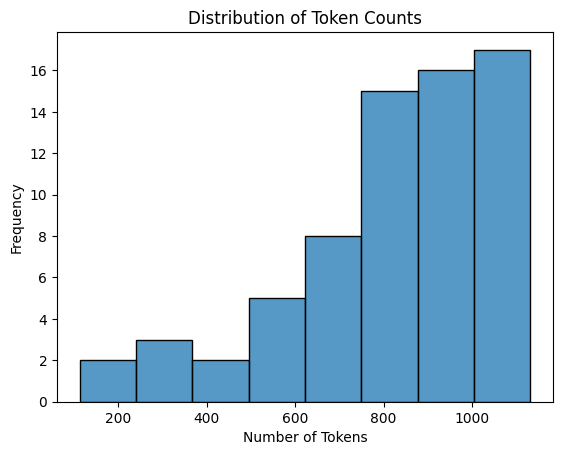

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-70B")

import seaborn as sns
import matplotlib.pyplot as plt

token_counts = []
for text in text_elements:
    tokens = tokenizer.tokenize(text.text)
    num_tokens = len(tokens)
    token_counts.append(num_tokens)    
sns.histplot(token_counts, kde=False)
plt.title("Distribution of Token Counts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [11]:
from llama_index.core import Document, VectorStoreIndex

# Convert in llama index document format
documents = [Document(text=t.text) for t in text_elements]

from llama_index.core.node_parser import SentenceSplitter

node_parser = SentenceSplitter(chunk_size=30000)

nodes = node_parser.get_nodes_from_documents(documents)

# by default, the node ids are set to random uuids. To ensure same id's per run, we manually set them.
for idx, node in enumerate(nodes):
    node.id_ = f"node_{idx}"

In [12]:
index = VectorStoreIndex(nodes)

In [13]:
retriever = index.as_retriever()
query_engine = index.as_query_engine()

In [14]:
import pandas as pd
from datasets import Dataset

# Read test set
testset = pd.read_parquet("../../data/parquet/dataset.parquet")

questions = testset["question"].tolist()
answers = []
contexts = []

# Inference
for query in questions:
  answers.append(query_engine.query(query).response)
  contexts.append([retriever.retrieve(query)[0].node.text])

INFO:httpx:HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://adb-7215147325717155.15.azuredatabricks.net/serving-endpoints

In [15]:
# To dict
data = {
    "question": testset["question"].tolist(),
    "answer": answers,
    "contexts": contexts,
    "ground_truth": testset["ground_truth"].tolist()
}

# Convert dict to dataset
dataset = Dataset.from_dict(data)
print(dataset)

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 215
})


In [16]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)

df = result.to_pandas()

Evaluating:   0%|          | 0/860 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   0%|          | 1/860 [00:39<9:19:22, 39.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   0%|          | 2/860 [00:49<5:15:45, 22.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.235000 seconds
Retrying request to /chat/completions in 0.235000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.020000 seconds
Retrying request to /chat/completions in 0.020000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.386000 seconds
Retrying request to /chat/comple

Evaluating:   0%|          | 3/860 [01:22<6:26:07, 27.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   0%|          | 4/860 [01:39<5:31:18, 23.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.220000 seconds
Retrying request to /chat/completions in 0.220000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   1%|          | 5/860 [01:57<5:01:33, 21.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   1%|          | 6/860 [02:45<7:14:31, 30.53s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.353000 seconds
Retrying request to /chat/completions in 0.353000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.201000 seconds
Retrying request to /chat/completions in 0.201000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.439000 seconds
Retrying request to /chat/comple

Evaluating:   1%|          | 7/860 [03:00<5:58:18, 25.20s/it]

ERROR:ragas.executor:Exception raised in Job[744]: TimeoutError()
Exception raised in Job[744]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[742]: TimeoutError()
Exception raised in Job[742]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[743]: TimeoutError()
Exception raised in Job[743]: TimeoutError()
ERROR:ragas.executor:Exception raised in Job[455]: TimeoutError()
Exception raised in Job[455]: TimeoutError()


Evaluating:   2%|▏         | 17/860 [03:00<1:02:36,  4.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.358000 seconds
Retrying request to /chat/completions in 0.358000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.346000 seconds
Retrying request to /chat/completions in 0.346000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.299000 seconds
Retrying request to /chat/comple

Evaluating:   2%|▏         | 17/860 [03:16<1:02:36,  4.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.267000 seconds
Retrying request to /chat/completions in 0.267000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.290000 seconds
Retrying request to /chat/completions in 0.290000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   2%|▏         | 19/860 [03:23<1:22:08,  5.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.119000 seconds
Retrying request to /chat/completions in 0.119000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.045000 seconds
Retrying request to /chat/completions in 0.045000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.221000 seconds
Retrying request to /chat/comple

Evaluating:   2%|▏         | 20/860 [03:39<1:37:50,  6.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   2%|▏         | 21/860 [03:49<1:44:11,  7.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.258000 seconds
Retrying request to /chat/completions in 0.258000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.061000 seconds
Retrying request to /chat/comple

Evaluating:   3%|▎         | 22/860 [04:14<2:26:59, 10.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   3%|▎         | 23/860 [04:39<3:06:57, 13.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.555000 seconds
Retrying request to /chat/completions in 0.555000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.412000 seconds
Retrying request to /chat/completions in 0.412000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.189000 seconds
Retrying request to /chat/comple

Evaluating:   3%|▎         | 24/860 [04:57<3:19:20, 14.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.268000 seconds
Retrying request to /chat/completions in 0.268000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   3%|▎         | 25/860 [05:01<2:47:48, 12.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.170000 seconds
Retrying request to /chat/completions in 0.170000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[169]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-NvMsxiPNvoM0PxQK5EvoccbM on tokens per min (TPM): Limit 200000, Used 198402, Requested 2420. Please try again in 246ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}})
Exception raised in Job[169]: RateLimi

Evaluating:   3%|▎         | 25/860 [05:16<2:47:48, 12.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.033000 seconds
Retrying request to /chat/completions in 0.033000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   3%|▎         | 29/860 [05:20<1:48:14,  7.82s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.467000 seconds
Retrying request to /chat/completions in 0.467000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:   3%|▎         | 30/860 [05:24<1:37:48,  7.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.143000 seconds
Retrying request to /chat/completions in 0.143000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   3%|▎         | 30/860 [05:36<1:37:48,  7.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   4%|▎         | 32/860 [05:39<1:39:07,  7.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.499000 seconds
Retrying request to /chat/completions in 0.499000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.124000 seconds
Retrying request to /chat/completions in 0.124000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   4%|▍         | 33/860 [06:00<2:14:53,  9.79s/it]

ERROR:ragas.executor:Exception raised in Job[749]: TimeoutError()
Exception raised in Job[749]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.302000 seconds
Retrying request to /chat/completions in 0.302000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:   4%|▍         | 35/860 [06:15<2:03:30,  8.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.385000 seconds
Retrying request to /chat/completions in 0.385000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   4%|▍         | 36/860 [06:23<2:02:53,  8.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.360000 seconds
Retrying request to /chat/completions in 0.360000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.142000 seconds
Retrying request to /chat/comple

Evaluating:   4%|▍         | 36/860 [06:36<2:02:53,  8.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[750]: TimeoutError()
Exception raised in Job[750]: TimeoutError()


Evaluating:   4%|▍         | 37/860 [06:39<2:22:03, 10.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.347000 seconds
Retrying request to /chat/comple

Evaluating:   4%|▍         | 38/860 [06:48<2:20:03, 10.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.367000 seconds
Retrying request to /chat/completions in 0.367000 seconds
ERROR:ragas.executor:Exception raised in Job[26]: TimeoutError()
Exception raised in Job[26]: TimeoutError()


Evaluating:   5%|▍         | 39/860 [06:49<1:45:17,  7.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.057000 seconds
Retrying request to /chat/completions in 0.057000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[461]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate lim

Evaluating:   5%|▍         | 40/860 [06:49<1:18:24,  5.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.303000 seconds
Retrying request to /chat/completions in 0.303000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.321000 seconds
Retrying request to /chat/completions in 0.321000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.166000 seconds
Retrying request to /chat/comple

Evaluating:   5%|▍         | 41/860 [07:06<2:00:57,  8.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:   5%|▍         | 42/860 [07:10<1:39:29,  7.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.220000 seconds
Retrying request to /chat/completions in 0.220000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.119000 seconds
Retrying request to /chat/completions in 0.119000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.078000 seconds
Retrying request to /chat/comple

Evaluating:   5%|▌         | 43/860 [07:18<1:44:14,  7.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.032000 seconds
Retrying request to /chat/completions in 0.032000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   5%|▌         | 44/860 [07:41<2:46:39, 12.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.413000 seconds
Retrying request to /chat/completions in 0.413000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.287000 seconds
Retrying request to /chat/completions in 0.287000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.293000 seconds
Retrying request to /chat/comple

Evaluating:   5%|▌         | 45/860 [07:47<2:20:55, 10.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.371000 seconds
Retrying request to /chat/completions in 0.371000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   5%|▌         | 46/860 [07:52<1:55:52,  8.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.150000 seconds
Retrying request to /chat/completions in 0.150000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.030000 seconds
Retrying request to /chat/completions in 0.030000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:   5%|▌         | 47/860 [07:53<1:27:57,  6.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.335000 seconds
Retrying request to /chat/completions in 0.335000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.280000 seconds
Retrying request to /chat/completions in 0.280000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   6%|▌         | 48/860 [07:57<1:15:49,  5.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.224000 seconds
Retrying request to /chat/completions in 0.224000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.175000 seconds
Retrying request to /chat/completions in 0.175000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   6%|▌         | 49/860 [08:03<1:16:40,  5.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.075000 seconds
Retrying request to /chat/completions in 0.075000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.016000 seconds
Retrying request to /chat/completions in 0.016000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   6%|▌         | 50/860 [08:05<1:01:57,  4.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.202000 seconds
Retrying request to /chat/completions in 0.202000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.356000 seconds
Retrying request to /chat/completions in 0.356000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   6%|▌         | 51/860 [08:17<1:32:48,  6.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.161000 seconds
Retrying request to /chat/completions in 0.161000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.287000 seconds
Retrying request to /chat/completions in 0.287000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   6%|▌         | 52/860 [08:41<2:44:18, 12.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.066000 seconds
Retrying request to /chat/completions in 0.066000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.363000 seconds
Retrying request to /chat/completions in 0.363000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.077000 seconds
Retrying request to /chat/comple

Evaluating:   6%|▌         | 53/860 [09:00<3:10:24, 14.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.021000 seconds
Retrying request to /chat/completions in 0.021000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   6%|▋         | 54/860 [09:15<3:10:55, 14.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   6%|▋         | 55/860 [09:23<2:48:55, 12.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.304000 seconds
Retrying request to /chat/completions in 0.304000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.014000 seconds
Retrying request to /chat/completions in 0.014000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   7%|▋         | 56/860 [09:36<2:47:16, 12.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.432000 seconds
Retrying request to /chat/completions in 0.432000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.168000 seconds
Retrying request to /chat/completions in 0.168000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   7%|▋         | 57/860 [09:39<2:09:07,  9.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.150000 seconds
Retrying request to /chat/completions in 0.150000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   7%|▋         | 58/860 [09:49<2:11:08,  9.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.206000 seconds
Retrying request to /chat/completions in 0.206000 seconds
ERROR:ragas.executor:Exception raised in Job[755]: TimeoutError()
Exception raised in Job[755]: TimeoutError()


Evaluating:   7%|▋         | 59/860 [09:49<1:33:14,  6.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.054000 seconds
Retrying request to /chat/completions in 0.054000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.699000 seconds
Retrying request to /chat/completions in 0.699000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.047000 seconds
Retrying request to /chat/comple

Evaluating:   7%|▋         | 60/860 [10:03<1:58:28,  8.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.137000 seconds
Retrying request to /chat/completions in 0.137000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.235000 seconds
Retrying request to /chat/completions in 0.235000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.215000 seconds
Retrying request to /chat/comple

Evaluating:   7%|▋         | 61/860 [10:04<1:29:32,  6.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.454000 seconds
Retrying request to /chat/completions in 0.454000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.186000 seconds
Retrying request to /chat/completions in 0.186000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.210000 seconds
Retrying request to /chat/comple

Evaluating:   7%|▋         | 62/860 [10:10<1:24:00,  6.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.570000 seconds
Retrying request to /chat/completions in 0.570000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.466000 seconds
Retrying request to /chat/completions in 0.466000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   7%|▋         | 63/860 [10:18<1:32:44,  6.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.116000 seconds
Retrying request to /chat/completions in 0.116000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:   7%|▋         | 64/860 [10:35<2:13:29, 10.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.381000 seconds
Retrying request to /chat/completions in 0.381000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.363000 seconds
Retrying request to /chat/completions in 0.363000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.115000 seconds
Retrying request to /chat/comple

Evaluating:   8%|▊         | 65/860 [10:44<2:08:29,  9.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.172000 seconds
Retrying request to /chat/completions in 0.172000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.171000 seconds
Retrying request to /chat/completions in 0.171000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.141000 seconds
Retrying request to /chat/comple

Evaluating:   8%|▊         | 66/860 [10:46<1:35:18,  7.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.055000 seconds
Retrying request to /chat/completions in 0.055000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.208000 seconds
Retrying request to /chat/completions in 0.208000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   8%|▊         | 67/860 [10:53<1:36:52,  7.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.293000 seconds
Retrying request to /chat/completions in 0.293000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.389000 seconds
Retrying request to /chat/completions in 0.389000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.462000 seconds
Retrying request to /chat/comple

Evaluating:   8%|▊         | 68/860 [10:54<1:12:32,  5.50s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:   8%|▊         | 69/860 [11:00<1:13:35,  5.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.072000 seconds
Retrying request to /chat/completions in 0.072000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   8%|▊         | 70/860 [11:05<1:08:48,  5.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.129000 seconds
Retrying request to /chat/completions in 0.129000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.030000 seconds
Retrying request to /chat/completions in 0.030000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   8%|▊         | 71/860 [11:14<1:25:37,  6.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.342000 seconds
Retrying request to /chat/completions in 0.342000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.244000 seconds
Retrying request to /chat/completions in 0.244000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.091000 seconds
Retrying request to /chat/comple

Evaluating:   8%|▊         | 72/860 [11:27<1:48:46,  8.28s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   8%|▊         | 73/860 [11:41<2:14:56, 10.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.368000 seconds
Retrying request to /chat/completions in 0.368000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.097000 seconds
Retrying request to /chat/completions in 0.097000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.120000 seconds
Retrying request to /chat/comple

Evaluating:   9%|▊         | 74/860 [11:45<1:46:48,  8.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.071000 seconds
Retrying request to /chat/completions in 0.071000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.599000 seconds
Retrying request to /chat/completions in 0.599000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   9%|▊         | 75/860 [12:00<2:15:41, 10.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.288000 seconds
Retrying request to /chat/completions in 0.288000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.560000 seconds
Retrying request to /chat/completions in 0.560000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:   9%|▉         | 76/860 [12:06<1:59:00,  9.11s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.273000 seconds
Retrying request to /chat/completions in 0.273000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   9%|▉         | 77/860 [12:10<1:37:48,  7.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.145000 seconds
Retrying request to /chat/completions in 0.145000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   9%|▉         | 78/860 [12:15<1:25:49,  6.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.152000 seconds
Retrying request to /chat/completions in 0.152000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.635000 seconds
Retrying request to /chat/comple

Evaluating:   9%|▉         | 79/860 [12:20<1:20:10,  6.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.188000 seconds
Retrying request to /chat/completions in 0.188000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.255000 seconds
Retrying request to /chat/completions in 0.255000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   9%|▉         | 80/860 [12:22<1:03:39,  4.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.291000 seconds
Retrying request to /chat/completions in 0.291000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.304000 seconds
Retrying request to /chat/completions in 0.304000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:   9%|▉         | 81/860 [12:22<45:51,  3.53s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.367000 seconds
Retrying request to /chat/completions in 0.367000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.295000 seconds
Retrying request to /chat/completions in 0.295000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.166000 seconds
Retrying request to /chat/comple

Evaluating:  10%|▉         | 82/860 [12:23<35:50,  2.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.232000 seconds
Retrying request to /chat/completions in 0.232000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  10%|▉         | 83/860 [12:49<2:06:51,  9.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.619000 seconds
Retrying request to /chat/completions in 0.619000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.317000 seconds
Retrying request to /chat/completions in 0.317000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  10%|▉         | 84/860 [13:04<2:26:54, 11.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  10%|▉         | 85/860 [13:15<2:26:01, 11.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.370000 seconds
Retrying request to /chat/completions in 0.370000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  10%|█         | 86/860 [13:26<2:23:38, 11.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  10%|█         | 87/860 [13:37<2:21:03, 10.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.385000 seconds
Retrying request to /chat/completions in 0.385000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.468000 seconds
Retrying request to /chat/completions in 0.468000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  10%|█         | 88/860 [13:46<2:13:07, 10.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.256000 seconds
Retrying request to /chat/comple

Evaluating:  10%|█         | 89/860 [13:54<2:07:13,  9.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  10%|█         | 90/860 [14:00<1:51:08,  8.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.042000 seconds
Retrying request to /chat/completions in 0.042000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█         | 91/860 [14:27<2:58:56, 13.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.212000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█         | 92/860 [14:38<2:48:54, 13.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.347000 seconds
Retrying request to /chat/completions in 0.347000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.464000 seconds
Retrying request to /chat/completions in 0.464000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.343000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█         | 93/860 [14:41<2:11:42, 10.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.040000 seconds
Retrying request to /chat/completions in 0.040000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.234000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█         | 94/860 [14:48<1:56:07,  9.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.115000 seconds
Retrying request to /chat/completions in 0.115000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.254000 seconds
Retrying request to /chat/completions in 0.254000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  11%|█         | 95/860 [14:54<1:46:11,  8.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.136000 seconds
Retrying request to /chat/completions in 0.136000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.034000 seconds
Retrying request to /chat/completions in 0.034000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█         | 96/860 [15:06<2:00:20,  9.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.399000 seconds
Retrying request to /chat/completions in 0.399000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  11%|█▏        | 97/860 [15:10<1:38:23,  7.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.374000 seconds
Retrying request to /chat/completions in 0.374000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.152000 seconds
Retrying request to /chat/completions in 0.152000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.173000 seconds
Retrying request to /chat/comple

Evaluating:  11%|█▏        | 98/860 [15:11<1:13:44,  5.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.474000 seconds
Retrying request to /chat/completions in 0.474000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  12%|█▏        | 99/860 [15:13<58:25,  4.61s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.171000 seconds
Retrying request to /chat/completions in 0.171000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.611000 seconds
Retrying request to /chat/comple

Evaluating:  12%|█▏        | 100/860 [15:23<1:18:00,  6.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  12%|█▏        | 101/860 [15:29<1:18:10,  6.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.287000 seconds
Retrying request to /chat/completions in 0.287000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  12%|█▏        | 102/860 [16:04<3:07:08, 14.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.341000 seconds
Retrying request to /chat/completions in 0.341000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.088000 seconds
Retrying request to /chat/comple

Evaluating:  12%|█▏        | 103/860 [16:11<2:37:20, 12.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.281000 seconds
Retrying request to /chat/completions in 0.281000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.172000 seconds
Retrying request to /chat/completions in 0.172000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  12%|█▏        | 104/860 [16:15<2:05:51,  9.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.055000 seconds
Retrying request to /chat/completions in 0.055000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.110000 seconds
Retrying request to /chat/comple

Evaluating:  12%|█▏        | 105/860 [16:17<1:32:55,  7.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.331000 seconds
Retrying request to /chat/completions in 0.331000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  12%|█▏        | 106/860 [16:38<2:25:46, 11.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.414000 seconds
Retrying request to /chat/completions in 0.414000 seconds
INFO:openai._base_client:Retrying request to /chat/completions in 0.448000 seconds
Retrying request to /chat/comple

Evaluating:  12%|█▏        | 107/860 [16:46<2:09:59, 10.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.113000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 108/860 [16:50<1:46:38,  8.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.219000 seconds
Retrying request to /chat/completions in 0.219000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.299000 seconds
Retrying request to /chat/completions in 0.299000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 109/860 [16:55<1:34:38,  7.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.215000 seconds
Retrying request to /chat/completions in 0.215000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.271000 seconds
Retrying request to /chat/completions in 0.271000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.487000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 110/860 [17:01<1:27:45,  7.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.486000 seconds
Retrying request to /chat/completions in 0.486000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.437000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 111/860 [17:06<1:20:26,  6.44s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.585000 seconds
Retrying request to /chat/completions in 0.585000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.396000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 112/860 [17:11<1:16:43,  6.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.197000 seconds
Retrying request to /chat/completions in 0.197000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  13%|█▎        | 113/860 [17:12<56:16,  4.52s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.091000 seconds
Retrying request to /chat/completions in 0.091000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  13%|█▎        | 114/860 [17:13<43:13,  3.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.275000 seconds
Retrying request to /chat/completions in 0.275000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.001000 seconds
Retrying request to /chat/comple

Evaluating:  13%|█▎        | 115/860 [17:19<51:24,  4.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.280000 seconds
Retrying request to /chat/completions in 0.280000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  13%|█▎        | 116/860 [17:30<1:17:01,  6.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  14%|█▎        | 117/860 [17:50<2:06:39, 10.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.206000 seconds
Retrying request to /chat/completions in 0.206000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  14%|█▎        | 118/860 [18:06<2:30:58, 12.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  14%|█▍        | 119/860 [18:10<1:59:17,  9.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  14%|█▍        | 120/860 [18:11<1:28:18,  7.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  14%|█▍        | 121/860 [18:13<1:07:55,  5.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  14%|█▍        | 122/860 [18:23<1:23:59,  6.83s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  14%|█▍        | 123/860 [18:24<1:02:26,  5.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  14%|█▍        | 124/860 [18:29<1:02:52,  5.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.477000 seconds
Retrying request to /chat/completions in 0.477000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.040000 seconds
Retrying request to /chat/completions in 0.040000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.343000 seconds
Retrying request to /chat/comple

Evaluating:  15%|█▍        | 125/860 [18:30<46:30,  3.80s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.359000 seconds
Retrying request to /chat/completions in 0.359000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.210000 seconds
Retrying request to /chat/completions in 0.210000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  15%|█▍        | 126/860 [18:38<1:01:27,  5.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.350000 seconds
Retrying request to /chat/completions in 0.350000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  15%|█▍        | 127/860 [18:48<1:19:57,  6.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.100000 seconds
Retrying request to /chat/completions in 0.100000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  15%|█▍        | 128/860 [19:04<1:55:32,  9.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  15%|█▌        | 129/860 [19:15<2:01:57, 10.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[47]: TimeoutError()
Exception raised in Job[47]: TimeoutError()


Evaluating:  15%|█▌        | 130/860 [19:17<1:29:42,  7.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.078000 seconds
Retrying request to /chat/completions in 0.078000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  15%|█▌        | 131/860 [19:31<1:55:02,  9.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  15%|█▌        | 132/860 [19:44<2:07:17, 10.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  15%|█▌        | 133/860 [19:49<1:48:02,  8.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[772]: TimeoutError()
Exception raised in Job[772]: TimeoutError()


Evaluating:  16%|█▌        | 134/860 [19:50<1:17:47,  6.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.075000 seconds
Retrying request to /chat/completions in 0.075000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  16%|█▌        | 135/860 [19:57<1:21:54,  6.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  16%|█▌        | 136/860 [20:12<1:50:50,  9.19s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  16%|█▌        | 137/860 [20:14<1:25:25,  7.09s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  16%|█▌        | 138/860 [20:19<1:16:03,  6.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.098000 seconds
Retrying request to /chat/completions in 0.098000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  16%|█▌        | 139/860 [20:30<1:32:57,  7.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.042000 seconds
Retrying request to /chat/completions in 0.042000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  16%|█▋        | 140/860 [20:32<1:10:47,  5.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.627000 seconds
Retrying request to /chat/completions in 0.627000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  16%|█▋        | 141/860 [20:43<1:28:47,  7.41s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.457000 seconds
Retrying request to /chat/completions in 0.457000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.137000 seconds
Retrying request to /chat/completions in 0.137000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 142/860 [20:50<1:27:25,  7.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.156000 seconds
Retrying request to /chat/completions in 0.156000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 143/860 [20:52<1:08:54,  5.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.053000 seconds
Retrying request to /chat/completions in 0.053000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  17%|█▋        | 144/860 [20:58<1:10:59,  5.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.232000 seconds
Retrying request to /chat/completions in 0.232000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 145/860 [21:06<1:19:10,  6.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 146/860 [21:13<1:19:23,  6.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  17%|█▋        | 147/860 [21:23<1:30:44,  7.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.431000 seconds
Retrying request to /chat/completions in 0.431000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 148/860 [21:24<1:05:10,  5.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.137000 seconds
Retrying request to /chat/completions in 0.137000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.054000 seconds
Retrying request to /chat/comple

Evaluating:  17%|█▋        | 149/860 [21:31<1:12:24,  6.11s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.021000 seconds
Retrying request to /chat/completions in 0.021000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  17%|█▋        | 150/860 [21:44<1:36:46,  8.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  18%|█▊        | 151/860 [22:01<2:07:23, 10.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  18%|█▊        | 152/860 [22:10<2:02:11, 10.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  18%|█▊        | 153/860 [22:18<1:51:48,  9.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  18%|█▊        | 154/860 [22:31<2:05:14, 10.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  18%|█▊        | 155/860 [22:32<1:31:35,  7.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  18%|█▊        | 156/860 [22:41<1:34:30,  8.05s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  18%|█▊        | 157/860 [22:49<1:35:17,  8.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  18%|█▊        | 158/860 [22:51<1:12:02,  6.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  18%|█▊        | 159/860 [22:57<1:13:41,  6.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  19%|█▊        | 160/860 [22:58<52:25,  4.49s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  19%|█▊        | 161/860 [23:17<1:44:04,  8.93s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  19%|█▉        | 162/860 [23:19<1:19:40,  6.85s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  19%|█▉        | 163/860 [23:25<1:16:59,  6.63s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  19%|█▉        | 164/860 [23:30<1:10:53,  6.11s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.346000 seconds
Retrying request to /chat/completions in 0.346000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.267000 seconds
Retrying request to /chat/comple

Evaluating:  19%|█▉        | 165/860 [23:33<1:01:37,  5.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  19%|█▉        | 166/860 [23:42<1:11:52,  6.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.014000 seconds
Retrying request to /chat/completions in 0.014000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  19%|█▉        | 167/860 [23:51<1:20:58,  7.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|█▉        | 168/860 [23:52<1:00:35,  5.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.045000 seconds
Retrying request to /chat/comple

Evaluating:  20%|█▉        | 169/860 [24:08<1:37:43,  8.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  20%|█▉        | 170/860 [24:16<1:37:33,  8.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|█▉        | 171/860 [24:23<1:31:28,  7.97s/it]

ERROR:ragas.executor:Exception raised in Job[782]: TimeoutError()
Exception raised in Job[782]: TimeoutError()


Evaluating:  20%|██        | 172/860 [24:24<1:05:34,  5.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|██        | 173/860 [24:43<1:53:02,  9.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|██        | 174/860 [24:53<1:51:57,  9.79s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|██        | 175/860 [24:59<1:41:01,  8.85s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  20%|██        | 176/860 [25:08<1:39:14,  8.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  21%|██        | 177/860 [25:18<1:43:33,  9.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.173000 seconds
Retrying request to /chat/completions in 0.173000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.053000 seconds
Retrying request to /chat/comple

Evaluating:  21%|██        | 178/860 [25:31<1:57:10, 10.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[204]: TimeoutError()
Exception raised in Job[204]: TimeoutError()


Evaluating:  21%|██        | 179/860 [25:31<1:22:44,  7.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[494]: TimeoutError()
Exception raised in Job[494]: TimeoutError()


Evaluating:  21%|██        | 180/860 [25:32<1:01:44,  5.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  21%|██        | 181/860 [25:49<1:40:49,  8.91s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[205]: TimeoutError()
Exception raised in Job[205]: TimeoutError()


Evaluating:  21%|██        | 182/860 [25:51<1:15:41,  6.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.153000 seconds
Retrying request to /chat/completions in 0.153000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  21%|██▏       | 183/860 [26:08<1:51:49,  9.91s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  21%|██▏       | 184/860 [26:19<1:54:38, 10.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  22%|██▏       | 185/860 [26:20<1:24:52,  7.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.440000 seconds
Retrying request to /chat/completions in 0.440000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  22%|██▏       | 186/860 [26:26<1:17:13,  6.87s/it]

ERROR:ragas.executor:Exception raised in Job[496]: TimeoutError()
Exception raised in Job[496]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  22%|██▏       | 188/860 [26:33<1:01:32,  5.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  22%|██▏       | 189/860 [26:52<1:37:02,  8.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  22%|██▏       | 190/860 [27:00<1:36:03,  8.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  22%|██▏       | 191/860 [27:09<1:36:37,  8.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.441000 seconds
Retrying request to /chat/completions in 0.441000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  22%|██▏       | 192/860 [27:16<1:32:05,  8.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.279000 seconds
Retrying request to /chat/completions in 0.279000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  22%|██▏       | 193/860 [27:17<1:07:59,  6.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.105000 seconds
Retrying request to /chat/completions in 0.105000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 194/860 [27:24<1:09:11,  6.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  23%|██▎       | 195/860 [27:35<1:25:46,  7.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 196/860 [27:55<2:07:16, 11.50s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.437000 seconds
Retrying request to /chat/completions in 0.437000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 197/860 [28:08<2:09:49, 11.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  23%|██▎       | 198/860 [28:18<2:04:13, 11.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 199/860 [28:21<1:37:45,  8.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.333000 seconds
Retrying request to /chat/completions in 0.333000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.192000 seconds
Retrying request to /chat/completions in 0.192000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 200/860 [28:27<1:27:53,  7.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.208000 seconds
Retrying request to /chat/comple

Evaluating:  23%|██▎       | 201/860 [28:32<1:18:43,  7.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  23%|██▎       | 202/860 [28:38<1:14:51,  6.83s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  24%|██▎       | 203/860 [28:49<1:28:17,  8.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  24%|██▎       | 204/860 [28:53<1:13:32,  6.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  24%|██▍       | 205/860 [29:09<1:45:04,  9.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  24%|██▍       | 206/860 [29:18<1:43:13,  9.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.239000 seconds
Retrying request to /chat/completions in 0.239000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  24%|██▍       | 207/860 [29:20<1:18:46,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.096000 seconds
Retrying request to /chat/completions in 0.096000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.531000 seconds
Retrying request to /chat/comple

Evaluating:  24%|██▍       | 208/860 [29:26<1:12:26,  6.67s/it]

ERROR:ragas.executor:Exception raised in Job[502]: TimeoutError()
Exception raised in Job[502]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.651000 seconds
Retrying request to /chat/completions in 0.651000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http

Evaluating:  24%|██▍       | 210/860 [29:32<53:41,  4.96s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.258000 seconds
Retrying request to /chat/completions in 0.258000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  25%|██▍       | 211/860 [29:33<45:13,  4.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  25%|██▍       | 212/860 [29:36<39:55,  3.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  25%|██▍       | 213/860 [29:44<54:00,  5.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  25%|██▍       | 214/860 [30:01<1:30:03,  8.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.058000 seconds
Retrying request to /chat/completions in 0.058000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.343000 seconds
Retrying request to /chat/completions in 0.343000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.113000 seconds
Retrying request to /chat/comple

Evaluating:  25%|██▌       | 215/860 [30:23<2:12:26, 12.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds


Evaluating:  25%|██▌       | 216/860 [30:24<1:34:43,  8.82s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  25%|██▌       | 217/860 [30:30<1:25:48,  8.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  25%|██▌       | 218/860 [30:35<1:16:32,  7.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  25%|██▌       | 219/860 [30:37<1:01:56,  5.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  26%|██▌       | 220/860 [30:45<1:08:39,  6.44s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  26%|██▌       | 221/860 [30:55<1:18:00,  7.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  26%|██▌       | 222/860 [31:12<1:50:36, 10.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  26%|██▌       | 223/860 [31:18<1:34:23,  8.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  26%|██▌       | 224/860 [31:20<1:11:54,  6.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  26%|██▌       | 225/860 [31:30<1:23:29,  7.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.380000 seconds
Retrying request to /chat/completions in 0.380000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  26%|██▋       | 226/860 [31:38<1:24:06,  7.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.333000 seconds
Retrying request to /chat/completions in 0.333000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.378000 seconds
Retrying request to /chat/comple

Evaluating:  26%|██▋       | 227/860 [31:46<1:24:08,  7.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.303000 seconds
Retrying request to /chat/completions in 0.303000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.183000 seconds
Retrying request to /chat/completions in 0.183000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  27%|██▋       | 228/860 [31:53<1:19:31,  7.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  27%|██▋       | 229/860 [31:53<57:30,  5.47s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  27%|██▋       | 230/860 [32:02<1:07:01,  6.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.011000 seconds
Retrying request to /chat/completions in 0.011000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  27%|██▋       | 231/860 [32:09<1:09:39,  6.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.470000 seconds
Retrying request to /chat/completions in 0.470000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  27%|██▋       | 232/860 [32:11<54:00,  5.16s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.478000 seconds
Retrying request to /chat/completions in 0.478000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.464000 seconds
Retrying request to /chat/completions in 0.464000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  27%|██▋       | 233/860 [32:20<1:06:00,  6.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.337000 seconds
Retrying request to /chat/completions in 0.337000 seconds
ERROR:ragas.executor:Exception raised in Job[507]: TimeoutError()
Exception raised in Job[507]: TimeoutError()


Evaluating:  27%|██▋       | 234/860 [32:20<47:28,  4.55s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.062000 seconds
Retrying request to /chat/completions in 0.062000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.128000 seconds
Retrying request to /chat/comple

Evaluating:  27%|██▋       | 235/860 [32:29<1:01:13,  5.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  27%|██▋       | 236/860 [32:32<49:47,  4.79s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.041000 seconds
Retrying request to /chat/completions in 0.041000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  28%|██▊       | 237/860 [32:36<47:54,  4.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  28%|██▊       | 238/860 [32:37<36:49,  3.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.359000 seconds
Retrying request to /chat/completions in 0.359000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.348000 seconds
Retrying request to /chat/completions in 0.348000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  28%|██▊       | 239/860 [33:04<1:50:07, 10.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.096000 seconds
Retrying request to /chat/completions in 0.096000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  28%|██▊       | 240/860 [33:18<1:58:58, 11.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  28%|██▊       | 241/860 [33:20<1:31:39,  8.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  28%|██▊       | 242/860 [33:24<1:14:41,  7.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  28%|██▊       | 243/860 [33:29<1:08:49,  6.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[75]: TimeoutError()
Exception raised in Job[75]: TimeoutError()


Evaluating:  28%|██▊       | 244/860 [33:30<50:04,  4.88s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  28%|██▊       | 245/860 [33:38<58:40,  5.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  29%|██▊       | 246/860 [33:38<43:25,  4.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  29%|██▊       | 247/860 [33:56<1:24:22,  8.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  29%|██▉       | 248/860 [34:05<1:27:41,  8.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  29%|██▉       | 249/860 [34:12<1:23:11,  8.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  29%|██▉       | 250/860 [34:13<58:28,  5.75s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  29%|██▉       | 251/860 [34:20<1:02:24,  6.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  29%|██▉       | 252/860 [34:38<1:40:11,  9.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  29%|██▉       | 253/860 [34:53<1:54:15, 11.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[78]: TimeoutError()
Exception raised in Job[78]: TimeoutError()


Evaluating:  30%|██▉       | 254/860 [34:53<1:21:37,  8.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTT

Evaluating:  30%|██▉       | 255/860 [35:00<1:17:10,  7.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  30%|██▉       | 256/860 [35:13<1:33:30,  9.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.169000 seconds
Retrying request to /chat/completions in 0.169000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.402000 seconds
Retrying request to /chat/completions in 0.402000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  30%|██▉       | 257/860 [35:20<1:25:38,  8.52s/it]

ERROR:ragas.executor:Exception raised in Job[224]: TimeoutError()
Exception raised in Job[224]: TimeoutError()


Evaluating:  30%|███       | 258/860 [35:20<1:01:11,  6.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.033000 seconds
Retrying request to /chat/completions in 0.033000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.401000 seconds
Retrying request to /chat/comple

Evaluating:  30%|███       | 259/860 [35:22<46:22,  4.63s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.328000 seconds
Retrying request to /chat/completions in 0.328000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.154000 seconds
Retrying request to /chat/completions in 0.154000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  30%|███       | 260/860 [35:29<55:41,  5.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  30%|███       | 261/860 [35:30<42:18,  4.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  30%|███       | 262/860 [35:48<1:23:08,  8.34s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.269000 seconds
Retrying request to /chat/completions in 0.269000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.179000 seconds
Retrying request to /chat/comple

Evaluating:  31%|███       | 263/860 [35:57<1:23:31,  8.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  31%|███       | 264/860 [36:15<1:53:31, 11.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  31%|███       | 265/860 [36:20<1:33:59,  9.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  31%|███       | 266/860 [36:22<1:09:38,  7.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[226]: TimeoutError()
Exception raised in Job[226]: TimeoutError()


Evaluating:  31%|███       | 267/860 [36:24<54:57,  5.56s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  31%|███       | 268/860 [36:29<54:20,  5.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.126000 seconds
Retrying request to /chat/completions in 0.126000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.537000 seconds
Retrying request to /chat/completions in 0.537000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  31%|███▏      | 269/860 [36:30<39:48,  4.04s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTT

Evaluating:  31%|███▏      | 270/860 [36:31<30:55,  3.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.400000 seconds
Retrying request to /chat/completions in 0.400000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.422000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 271/860 [36:38<41:11,  4.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  32%|███▏      | 272/860 [36:39<33:33,  3.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 273/860 [36:49<52:23,  5.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 274/860 [36:56<58:07,  5.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.300000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 275/860 [37:08<1:13:56,  7.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  32%|███▏      | 276/860 [37:33<2:06:12, 12.97s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.087000 seconds
Retrying request to /chat/completions in 0.087000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  32%|███▏      | 277/860 [37:38<1:42:52, 10.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 278/860 [37:41<1:19:12,  8.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  32%|███▏      | 279/860 [37:47<1:14:20,  7.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  33%|███▎      | 280/860 [37:53<1:09:42,  7.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  33%|███▎      | 281/860 [38:07<1:26:31,  8.97s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  33%|███▎      | 282/860 [38:13<1:19:46,  8.28s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds


Evaluating:  33%|███▎      | 283/860 [38:14<58:15,  6.06s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  33%|███▎      | 284/860 [38:19<54:17,  5.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  33%|███▎      | 285/860 [38:22<45:59,  4.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  33%|███▎      | 286/860 [38:23<35:27,  3.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  33%|███▎      | 287/860 [38:29<43:41,  4.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[86]: TimeoutError()
Exception raised in Job[86]: TimeoutError()


Evaluating:  33%|███▎      | 288/860 [38:30<33:42,  3.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  34%|███▎      | 289/860 [38:32<29:12,  3.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  34%|███▎      | 290/860 [38:40<41:16,  4.34s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  34%|███▍      | 291/860 [38:57<1:16:45,  8.09s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  34%|███▍      | 292/860 [39:07<1:22:47,  8.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  34%|███▍      | 293/860 [39:20<1:36:05, 10.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[232]: TimeoutError()
Exception raised in Job[232]: TimeoutError()


Evaluating:  34%|███▍      | 294/860 [39:22<1:10:52,  7.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  34%|███▍      | 295/860 [39:23<54:05,  5.74s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[522]: TimeoutError()
Exception raised in Job[522]: TimeoutError()


Evaluating:  34%|███▍      | 296/860 [39:24<39:11,  4.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  35%|███▍      | 297/860 [39:30<44:20,  4.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  35%|███▍      | 298/860 [39:36<48:16,  5.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  35%|███▍      | 299/860 [39:42<49:44,  5.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  35%|███▍      | 300/860 [39:49<55:14,  5.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  35%|███▌      | 301/860 [39:58<1:05:08,  6.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  35%|███▌      | 302/860 [40:06<1:06:26,  7.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.159000 seconds
Retrying request to /chat/completions in 0.159000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.335000 seconds
Retrying request to /chat/comple

Evaluating:  35%|███▌      | 303/860 [40:24<1:37:36, 10.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.170000 seconds
Retrying request to /chat/completions in 0.170000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  35%|███▌      | 304/860 [40:33<1:31:25,  9.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[814]: TimeoutError()
Exception raised in Job[814]: TimeoutError()


Evaluating:  35%|███▌      | 305/860 [40:33<1:05:23,  7.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.513000 seconds
Retrying request to /chat/completions in 0.513000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  36%|███▌      | 306/860 [40:41<1:06:34,  7.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  36%|███▌      | 307/860 [40:42<50:04,  5.43s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  36%|███▌      | 308/860 [40:47<49:33,  5.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  36%|███▌      | 309/860 [41:07<1:27:28,  9.53s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  36%|███▌      | 310/860 [41:13<1:19:30,  8.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[526]: TimeoutError()
Exception raised in Job[526]: TimeoutError()


Evaluating:  36%|███▌      | 311/860 [41:14<57:52,  6.32s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  36%|███▋      | 312/860 [41:17<48:29,  5.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  36%|███▋      | 313/860 [41:24<54:06,  5.93s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  37%|███▋      | 314/860 [41:28<47:50,  5.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.057000 seconds
Retrying request to /chat/completions in 0.057000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.117000 seconds
Retrying request to /chat/comple

Evaluating:  37%|███▋      | 315/860 [41:35<52:25,  5.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  37%|███▋      | 316/860 [41:40<49:27,  5.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.089000 seconds
Retrying request to /chat/completions in 0.089000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  37%|███▋      | 317/860 [41:41<37:23,  4.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.545000 seconds
Retrying request to /chat/completions in 0.545000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  37%|███▋      | 318/860 [41:50<51:54,  5.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  37%|███▋      | 319/860 [42:02<1:08:44,  7.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  37%|███▋      | 320/860 [42:08<1:04:08,  7.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  37%|███▋      | 321/860 [42:24<1:26:35,  9.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  37%|███▋      | 322/860 [42:25<1:04:54,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  38%|███▊      | 323/860 [42:36<1:13:37,  8.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  38%|███▊      | 324/860 [42:41<1:05:26,  7.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[530]: TimeoutError()
Exception raised in Job[530]: TimeoutError()


Evaluating:  38%|███▊      | 325/860 [42:42<46:59,  5.27s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  38%|███▊      | 326/860 [42:51<57:38,  6.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  38%|███▊      | 327/860 [42:58<1:00:20,  6.79s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  38%|███▊      | 328/860 [43:00<46:24,  5.23s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  38%|███▊      | 329/860 [43:08<53:02,  5.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  38%|███▊      | 330/860 [43:19<1:05:36,  7.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  38%|███▊      | 331/860 [43:33<1:23:06,  9.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[97]: TimeoutError()
Exception raised in Job[97]: TimeoutError()


Evaluating:  39%|███▊      | 332/860 [43:33<59:31,  6.76s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  39%|███▊      | 333/860 [43:41<1:01:25,  6.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  39%|███▉      | 334/860 [43:42<45:35,  5.20s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[532]: TimeoutError()
Exception raised in Job[532]: TimeoutError()


Evaluating:  39%|███▉      | 335/860 [43:42<32:32,  3.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  39%|███▉      | 336/860 [43:47<36:35,  4.19s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  39%|███▉      | 337/860 [43:52<37:40,  4.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.505000 seconds
Retrying request to /chat/completions in 0.505000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.066000 seconds
Retrying request to /chat/completions in 0.066000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  39%|███▉      | 338/860 [44:07<1:04:20,  7.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.768000 seconds
Retrying request to /chat/completions in 0.768000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  39%|███▉      | 339/860 [44:35<1:59:11, 13.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  40%|███▉      | 340/860 [44:43<1:43:31, 11.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  40%|███▉      | 341/860 [44:50<1:31:46, 10.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Re

Evaluating:  40%|███▉      | 342/860 [45:01<1:31:55, 10.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  40%|███▉      | 343/860 [45:13<1:35:00, 11.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  40%|████      | 344/860 [45:18<1:19:26,  9.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  40%|████      | 345/860 [45:25<1:14:29,  8.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  40%|████      | 346/860 [45:27<56:24,  6.58s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  40%|████      | 347/860 [45:36<1:02:07,  7.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  40%|████      | 348/860 [45:37<46:18,  5.43s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  41%|████      | 349/860 [45:41<42:45,  5.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[102]: TimeoutError()
Exception raised in Job[102]: TimeoutError()


Evaluating:  41%|████      | 350/860 [45:42<31:03,  3.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.030000 seconds
Retrying request to /chat/completions in 0.030000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  41%|████      | 351/860 [45:51<45:23,  5.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  41%|████      | 352/860 [45:53<36:17,  4.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  41%|████      | 353/860 [46:00<43:56,  5.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  41%|████      | 354/860 [46:00<31:12,  3.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.174000 seconds
Retrying request to /chat/comple

Evaluating:  41%|████▏     | 355/860 [46:11<47:52,  5.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  41%|████▏     | 356/860 [46:19<55:22,  6.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  42%|████▏     | 357/860 [46:33<1:12:23,  8.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[828]: TimeoutError()
Exception raised in Job[828]: TimeoutError()


Evaluating:  42%|████▏     | 358/860 [46:33<51:56,  6.21s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  42%|████▏     | 359/860 [46:47<1:11:36,  8.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  42%|████▏     | 360/860 [46:52<1:01:37,  7.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.267000 seconds
Retrying request to /chat/completions in 0.267000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  42%|████▏     | 361/860 [47:01<1:06:15,  7.97s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  42%|████▏     | 362/860 [47:07<59:21,  7.15s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.362000 seconds
Retrying request to /chat/completions in 0.362000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.224000 seconds
Retrying request to /chat/completions in 0.224000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  42%|████▏     | 363/860 [47:09<47:11,  5.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.030000 seconds
Retrying request to /chat/completions in 0.030000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.353000 seconds
Retrying request to /chat/completions in 0.353000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  42%|████▏     | 364/860 [47:27<1:18:13,  9.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  42%|████▏     | 365/860 [47:38<1:22:26,  9.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.373000 seconds
Retrying request to /chat/completions in 0.373000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  43%|████▎     | 366/860 [47:43<1:08:45,  8.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  43%|████▎     | 367/860 [47:44<50:23,  6.13s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  43%|████▎     | 368/860 [47:56<1:05:27,  7.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  43%|████▎     | 369/860 [48:01<57:56,  7.08s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  43%|████▎     | 370/860 [48:02<41:29,  5.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  43%|████▎     | 371/860 [48:18<1:09:27,  8.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.261000 seconds
Retrying request to /chat/completions in 0.261000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  43%|████▎     | 372/860 [48:27<1:11:21,  8.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  43%|████▎     | 373/860 [48:37<1:12:35,  8.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  43%|████▎     | 374/860 [48:42<1:02:36,  7.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  44%|████▎     | 375/860 [48:51<1:06:19,  8.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  44%|████▎     | 376/860 [48:52<49:45,  6.17s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTT

Evaluating:  44%|████▍     | 377/860 [48:54<39:07,  4.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  44%|████▍     | 378/860 [49:19<1:27:54, 10.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.111000 seconds
Retrying request to /chat/completions in 0.111000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  44%|████▍     | 379/860 [49:22<1:07:12,  8.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  44%|████▍     | 380/860 [49:29<1:03:37,  7.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  44%|████▍     | 381/860 [49:33<55:24,  6.94s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  44%|████▍     | 382/860 [49:47<1:12:26,  9.09s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.318000 seconds
Retrying request to /chat/completions in 0.318000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  45%|████▍     | 383/860 [49:52<1:01:39,  7.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.330000 seconds
Retrying request to /chat/completions in 0.330000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.012000 seconds
Retrying request to /chat/completions in 0.012000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  45%|████▍     | 384/860 [49:54<47:33,  6.00s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  45%|████▍     | 385/860 [50:04<57:52,  7.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.411000 seconds
Retrying request to /chat/completions in 0.411000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  45%|████▍     | 386/860 [50:09<51:17,  6.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTT

Evaluating:  45%|████▌     | 387/860 [50:11<41:19,  5.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  45%|████▌     | 388/860 [50:25<1:01:26,  7.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  45%|████▌     | 389/860 [50:29<53:08,  6.77s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  45%|████▌     | 390/860 [50:45<1:15:04,  9.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  45%|████▌     | 391/860 [50:56<1:17:23,  9.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  46%|████▌     | 392/860 [50:58<57:45,  7.40s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  46%|████▌     | 393/860 [51:01<48:14,  6.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[258]: TimeoutError()
Exception raised in Job[258]: TimeoutError()


Evaluating:  46%|████▌     | 394/860 [51:02<34:40,  4.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  46%|████▌     | 395/860 [51:02<26:15,  3.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  46%|████▌     | 396/860 [51:12<39:43,  5.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  46%|████▌     | 397/860 [51:21<49:38,  6.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  46%|████▋     | 398/860 [51:30<56:13,  7.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  46%|████▋     | 399/860 [51:38<56:34,  7.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  47%|████▋     | 400/860 [51:42<48:10,  6.28s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  47%|████▋     | 401/860 [51:46<43:49,  5.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  47%|████▋     | 402/860 [51:51<41:47,  5.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  47%|████▋     | 403/860 [51:54<36:33,  4.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  47%|████▋     | 404/860 [51:56<29:16,  3.85s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  47%|████▋     | 405/860 [52:04<39:33,  5.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  47%|████▋     | 406/860 [52:21<1:04:44,  8.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.326000 seconds
Retrying request to /chat/completions in 0.326000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  47%|████▋     | 407/860 [52:22<47:50,  6.34s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.022000 seconds
Retrying request to /chat/completions in 0.022000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  47%|████▋     | 408/860 [52:39<1:12:38,  9.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  48%|████▊     | 409/860 [53:09<1:57:54, 15.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  48%|████▊     | 410/860 [53:13<1:32:38, 12.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  48%|████▊     | 411/860 [53:24<1:27:54, 11.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.229000 seconds
Retrying request to /chat/completions in 0.229000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  48%|████▊     | 412/860 [53:25<1:04:05,  8.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.312000 seconds
Retrying request to /chat/completions in 0.312000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.128000 seconds
Retrying request to /chat/comple

Evaluating:  48%|████▊     | 413/860 [53:29<54:30,  7.32s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.088000 seconds
Retrying request to /chat/completions in 0.088000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  48%|████▊     | 414/860 [53:31<41:03,  5.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.239000 seconds
Retrying request to /chat/completions in 0.239000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.070000 seconds
Retrying request to /chat/comple

Evaluating:  48%|████▊     | 415/860 [53:39<46:36,  6.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.181000 seconds
Retrying request to /chat/completions in 0.181000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.360000 seconds
Retrying request to /chat/comple

Evaluating:  48%|████▊     | 416/860 [53:47<51:28,  6.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.151000 seconds
Retrying request to /chat/completions in 0.151000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  48%|████▊     | 417/860 [53:56<56:09,  7.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.171000 seconds
Retrying request to /chat/completions in 0.171000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.001000 seconds
Retrying request to /chat/completions in 0.001000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  49%|████▊     | 418/860 [54:02<51:57,  7.05s/it]

ERROR:ragas.executor:Exception raised in Job[554]: TimeoutError()
Exception raised in Job[554]: TimeoutError()


Evaluating:  49%|████▊     | 419/860 [54:02<36:46,  5.00s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  49%|████▉     | 420/860 [54:09<40:42,  5.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.429000 seconds
Retrying request to /chat/completions in 0.429000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  49%|████▉     | 421/860 [54:13<35:44,  4.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  49%|████▉     | 422/860 [54:30<1:04:06,  8.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  49%|████▉     | 423/860 [54:32<47:22,  6.51s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  49%|████▉     | 424/860 [54:41<52:36,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  49%|████▉     | 425/860 [54:49<54:53,  7.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  50%|████▉     | 426/860 [54:51<42:48,  5.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  50%|████▉     | 427/860 [55:04<58:37,  8.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  50%|████▉     | 428/860 [55:14<1:03:03,  8.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  50%|████▉     | 429/860 [55:21<57:14,  7.97s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  50%|█████     | 430/860 [55:22<42:53,  5.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  50%|█████     | 431/860 [55:30<47:45,  6.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  50%|█████     | 432/860 [55:43<1:01:37,  8.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.283000 seconds
Retrying request to /chat/completions in 0.283000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.256000 seconds
Retrying request to /chat/completions in 0.256000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  50%|█████     | 433/860 [55:49<53:50,  7.57s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  50%|█████     | 434/860 [55:57<54:45,  7.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  51%|█████     | 435/860 [56:06<58:04,  8.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  51%|█████     | 436/860 [56:14<57:45,  8.17s/it]

ERROR:ragas.executor:Exception raised in Job[268]: TimeoutError()
Exception raised in Job[268]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  51%|█████     | 438/860 [56:23<46:00,  6.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[558]: TimeoutError()
Exception raised in Job[558]: TimeoutError()


Evaluating:  51%|█████     | 439/860 [56:24<35:23,  5.04s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  51%|█████     | 440/860 [56:32<40:38,  5.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  51%|█████▏    | 441/860 [56:39<42:46,  6.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  51%|█████▏    | 442/860 [56:40<34:06,  4.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  52%|█████▏    | 443/860 [56:51<44:21,  6.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  52%|█████▏    | 444/860 [57:00<50:43,  7.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  52%|█████▏    | 445/860 [57:07<50:06,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  52%|█████▏    | 446/860 [57:09<39:12,  5.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  52%|█████▏    | 447/860 [57:13<34:19,  4.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  52%|█████▏    | 448/860 [57:15<28:11,  4.11s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  52%|█████▏    | 449/860 [57:24<38:25,  5.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  52%|█████▏    | 450/860 [57:32<43:16,  6.33s/it]

ERROR:ragas.executor:Exception raised in Job[561]: TimeoutError()
Exception raised in Job[561]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO

Evaluating:  53%|█████▎    | 452/860 [57:42<38:37,  5.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  53%|█████▎    | 453/860 [57:58<57:08,  8.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  53%|█████▎    | 454/860 [58:09<1:01:00,  9.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  53%|█████▎    | 455/860 [58:17<58:39,  8.69s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  53%|█████▎    | 456/860 [58:22<51:48,  7.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  53%|█████▎    | 457/860 [58:24<40:06,  5.97s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  53%|█████▎    | 458/860 [58:42<1:03:07,  9.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  53%|█████▎    | 459/860 [58:51<1:03:43,  9.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  53%|█████▎    | 460/860 [58:57<55:10,  8.28s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  54%|█████▎    | 461/860 [58:58<40:40,  6.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  54%|█████▎    | 462/860 [59:06<44:57,  6.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds


Evaluating:  54%|█████▍    | 463/860 [59:07<34:31,  5.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  54%|█████▍    | 464/860 [59:14<37:06,  5.62s/it]

ERROR:ragas.executor:Exception raised in Job[130]: TimeoutError()
Exception raised in Job[130]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http

Evaluating:  54%|█████▍    | 466/860 [59:23<34:00,  5.18s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  54%|█████▍    | 467/860 [59:24<26:12,  4.00s/it]

ERROR:ragas.executor:Exception raised in Job[565]: TimeoutError()
Exception raised in Job[565]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  55%|█████▍    | 469/860 [59:42<40:05,  6.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.311000 seconds
Retrying request to /chat/completions in 0.311000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  55%|█████▍    | 470/860 [59:50<42:59,  6.61s/it]

ERROR:ragas.executor:Exception raised in Job[566]: TimeoutError()
Exception raised in Job[566]: TimeoutError()


Evaluating:  55%|█████▍    | 471/860 [59:51<32:43,  5.05s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  55%|█████▍    | 472/860 [59:59<37:35,  5.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  55%|█████▌    | 473/860 [1:00:00<30:10,  4.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.065000 seconds
Retrying request to /chat/completions in 0.065000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  55%|█████▌    | 474/860 [1:00:09<37:20,  5.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.162000 seconds
Retrying request to /chat/completions in 0.162000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.121000 seconds
Retrying request to /chat/comple

Evaluating:  55%|█████▌    | 475/860 [1:00:15<36:58,  5.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.465000 seconds
Retrying request to /chat/completions in 0.465000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.447000 seconds
Retrying request to /chat/completions in 0.447000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.294000 seconds
Retrying request to /chat/comple

Evaluating:  55%|█████▌    | 476/860 [1:00:16<28:39,  4.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.025000 seconds
Retrying request to /chat/completions in 0.025000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  55%|█████▌    | 477/860 [1:00:24<36:06,  5.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  56%|█████▌    | 478/860 [1:00:32<39:11,  6.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  56%|█████▌    | 479/860 [1:00:42<45:58,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.156000 seconds
Retrying request to /chat/comple

Evaluating:  56%|█████▌    | 480/860 [1:00:42<33:22,  5.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.485000 seconds
Retrying request to /chat/completions in 0.485000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  56%|█████▌    | 481/860 [1:00:51<39:14,  6.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  56%|█████▌    | 482/860 [1:00:58<41:58,  6.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  56%|█████▌    | 483/860 [1:01:03<37:49,  6.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.063000 seconds
Retrying request to /chat/completions in 0.063000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  56%|█████▋    | 484/860 [1:01:08<35:51,  5.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  56%|█████▋    | 485/860 [1:01:16<41:00,  6.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  57%|█████▋    | 486/860 [1:01:24<42:10,  6.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  57%|█████▋    | 487/860 [1:01:25<32:38,  5.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  57%|█████▋    | 488/860 [1:01:36<42:12,  6.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.569000 seconds
Retrying request to /chat/completions in 0.569000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[137]: RateLimitError(Error code: 429 - {'error': {'message': 'Rate lim

Evaluating:  57%|█████▋    | 489/860 [1:01:36<30:32,  4.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.067000 seconds
Retrying request to /chat/completions in 0.067000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.444000 seconds
Retrying request to /chat/comple

Evaluating:  57%|█████▋    | 490/860 [1:01:42<32:25,  5.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  57%|█████▋    | 491/860 [1:01:51<39:05,  6.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  57%|█████▋    | 492/860 [1:02:01<45:00,  7.34s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  57%|█████▋    | 493/860 [1:02:13<54:02,  8.84s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  57%|█████▋    | 494/860 [1:02:23<56:13,  9.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.135000 seconds
Retrying request to /chat/completions in 0.135000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.137000 seconds
Retrying request to /chat/completions in 0.137000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  58%|█████▊    | 495/860 [1:02:25<43:02,  7.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.168000 seconds
Retrying request to /chat/completions in 0.168000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.409000 seconds
Retrying request to /chat/comple

Evaluating:  58%|█████▊    | 496/860 [1:02:50<1:15:21, 12.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  58%|█████▊    | 497/860 [1:02:51<53:36,  8.86s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.167000 seconds
Retrying request to /chat/completions in 0.167000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  58%|█████▊    | 498/860 [1:03:00<54:19,  9.00s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.462000 seconds
Retrying request to /chat/completions in 0.462000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.415000 seconds
Retrying request to /chat/completions in 0.415000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  58%|█████▊    | 499/860 [1:03:09<53:48,  8.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.376000 seconds
Retrying request to /chat/completions in 0.376000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  58%|█████▊    | 500/860 [1:03:12<42:58,  7.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  58%|█████▊    | 501/860 [1:03:16<36:55,  6.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  58%|█████▊    | 502/860 [1:03:17<27:23,  4.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  58%|█████▊    | 503/860 [1:03:24<32:40,  5.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTT

Evaluating:  59%|█████▊    | 504/860 [1:03:27<26:38,  4.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  59%|█████▊    | 505/860 [1:03:35<33:32,  5.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  59%|█████▉    | 506/860 [1:03:42<36:11,  6.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  59%|█████▉    | 507/860 [1:03:46<31:10,  5.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  59%|█████▉    | 508/860 [1:03:51<32:06,  5.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  59%|█████▉    | 509/860 [1:04:03<42:28,  7.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  59%|█████▉    | 510/860 [1:04:10<42:46,  7.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  59%|█████▉    | 511/860 [1:04:21<48:13,  8.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  60%|█████▉    | 512/860 [1:04:25<41:27,  7.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 42

Evaluating:  60%|█████▉    | 513/860 [1:04:36<47:03,  8.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  60%|█████▉    | 514/860 [1:04:44<47:02,  8.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  60%|█████▉    | 515/860 [1:04:51<45:26,  7.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  60%|██████    | 516/860 [1:04:53<34:26,  6.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  60%|██████    | 517/860 [1:05:01<38:16,  6.69s/it]

ERROR:ragas.executor:Exception raised in Job[581]: TimeoutError()
Exception raised in Job[581]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  60%|██████    | 519/860 [1:05:20<45:00,  7.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  60%|██████    | 520/860 [1:05:25<41:32,  7.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  61%|██████    | 521/860 [1:05:26<32:04,  5.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  61%|██████    | 522/860 [1:05:36<37:44,  6.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  61%|██████    | 523/860 [1:05:51<50:41,  9.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.054000 seconds
Retrying request to /chat/completions in 0.054000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.036000 seconds
Retrying request to /chat/completions in 0.036000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  61%|██████    | 524/860 [1:06:00<51:05,  9.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.308000 seconds
Retrying request to /chat/completions in 0.308000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  61%|██████    | 525/860 [1:06:07<46:49,  8.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.379000 seconds
Retrying request to /chat/completions in 0.379000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  61%|██████    | 526/860 [1:06:09<36:37,  6.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.091000 seconds
Retrying request to /chat/completions in 0.091000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  61%|██████▏   | 527/860 [1:06:19<42:46,  7.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.289000 seconds
Retrying request to /chat/completions in 0.289000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.217000 seconds
Retrying request to /chat/completions in 0.217000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  61%|██████▏   | 528/860 [1:06:27<41:37,  7.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.345000 seconds
Retrying request to /chat/completions in 0.345000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.133000 seconds
Retrying request to /chat/comple

Evaluating:  62%|██████▏   | 529/860 [1:06:31<36:48,  6.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.016000 seconds
Retrying request to /chat/completions in 0.016000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.312000 seconds
Retrying request to /chat/comple

Evaluating:  62%|██████▏   | 530/860 [1:06:36<33:02,  6.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  62%|██████▏   | 531/860 [1:07:02<1:06:21, 12.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
ERROR:ragas.executor:Exception raised in Job[297]: TimeoutError()
Exception raised in Job[297]: TimeoutError()


Evaluating:  62%|██████▏   | 532/860 [1:07:03<47:39,  8.72s/it]  

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  62%|██████▏   | 533/860 [1:07:09<42:46,  7.85s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  62%|██████▏   | 534/860 [1:07:11<33:39,  6.19s/it]

ERROR:ragas.executor:Exception raised in Job[587]: TimeoutError()
Exception raised in Job[587]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  62%|██████▏   | 536/860 [1:07:21<30:43,  5.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  62%|██████▏   | 537/860 [1:07:25<28:35,  5.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  63%|██████▎   | 538/860 [1:07:30<27:00,  5.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  63%|██████▎   | 539/860 [1:07:36<28:46,  5.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  63%|██████▎   | 540/860 [1:07:44<32:45,  6.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  63%|██████▎   | 541/860 [1:07:45<24:55,  4.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  63%|██████▎   | 542/860 [1:07:53<29:41,  5.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  63%|██████▎   | 543/860 [1:07:54<22:34,  4.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  63%|██████▎   | 544/860 [1:08:01<27:07,  5.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  63%|██████▎   | 546/860 [1:08:20<36:56,  7.06s/it]

ERROR:ragas.executor:Exception raised in Job[590]: TimeoutError()
Exception raised in Job[590]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  64%|██████▎   | 548/860 [1:08:29<31:38,  6.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  64%|██████▍   | 549/860 [1:08:39<36:22,  7.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  64%|██████▍   | 550/860 [1:08:51<41:50,  8.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.292000 seconds
Retrying request to /chat/completions in 0.292000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  64%|██████▍   | 551/860 [1:09:03<46:46,  9.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.245000 seconds
Retrying request to /chat/completions in 0.245000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.276000 seconds
Retrying request to /chat/comple

Evaluating:  64%|██████▍   | 552/860 [1:09:13<47:47,  9.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  64%|██████▍   | 553/860 [1:09:23<49:28,  9.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  64%|██████▍   | 554/860 [1:09:27<39:54,  7.83s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  65%|██████▍   | 555/860 [1:09:46<56:28, 11.11s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  65%|██████▍   | 556/860 [1:09:55<53:07, 10.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  65%|██████▍   | 557/860 [1:10:02<48:12,  9.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 42

Evaluating:  65%|██████▍   | 558/860 [1:10:11<47:08,  9.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "

Evaluating:  65%|██████▌   | 559/860 [1:10:13<36:26,  7.26s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  65%|██████▌   | 560/860 [1:10:25<43:28,  8.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  65%|██████▌   | 561/860 [1:10:29<35:30,  7.13s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.336000 seconds
Retrying request to /chat/completions in 0.336000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.374000 seconds
Retrying request to /chat/comple

Evaluating:  65%|██████▌   | 562/860 [1:10:30<26:02,  5.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.357000 seconds
Retrying request to /chat/completions in 0.357000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.036000 seconds
Retrying request to /chat/completions in 0.036000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  65%|██████▌   | 563/860 [1:10:38<30:17,  6.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.096000 seconds
Retrying request to /chat/completions in 0.096000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.015000 seconds
Retrying request to /chat/comple

Evaluating:  66%|██████▌   | 564/860 [1:10:45<31:54,  6.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.380000 seconds
Retrying request to /chat/completions in 0.380000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.196000 seconds
Retrying request to /chat/completions in 0.196000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.172000 seconds
Retrying request to /chat/comple

Evaluating:  66%|██████▌   | 565/860 [1:10:54<35:23,  7.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  66%|██████▌   | 566/860 [1:10:55<26:23,  5.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  66%|██████▌   | 567/860 [1:11:01<27:20,  5.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  66%|██████▌   | 569/860 [1:11:05<18:29,  3.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.310000 seconds
Retrying request to /chat/comple

Evaluating:  66%|██████▋   | 570/860 [1:11:21<33:28,  6.93s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.294000 seconds
Retrying request to /chat/completions in 0.294000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  66%|██████▋   | 571/860 [1:11:29<34:43,  7.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  67%|██████▋   | 572/860 [1:11:30<26:41,  5.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  67%|██████▋   | 573/860 [1:11:39<30:51,  6.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  67%|██████▋   | 574/860 [1:12:06<59:00, 12.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  67%|██████▋   | 575/860 [1:12:13<50:54, 10.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  67%|██████▋   | 576/860 [1:12:13<36:29,  7.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  67%|██████▋   | 577/860 [1:12:27<44:10,  9.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  67%|██████▋   | 578/860 [1:12:31<37:18,  7.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  67%|██████▋   | 579/860 [1:12:38<36:00,  7.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  67%|██████▋   | 580/860 [1:12:39<26:37,  5.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  68%|██████▊   | 581/860 [1:12:46<27:42,  5.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  68%|██████▊   | 582/860 [1:12:47<21:25,  4.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  68%|██████▊   | 583/860 [1:13:02<35:21,  7.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  68%|██████▊   | 584/860 [1:13:05<28:33,  6.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  68%|██████▊   | 585/860 [1:13:23<44:27,  9.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.106000 seconds
Retrying request to /chat/completions in 0.106000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  68%|██████▊   | 586/860 [1:13:25<34:35,  7.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.134000 seconds
Retrying request to /chat/completions in 0.134000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  68%|██████▊   | 587/860 [1:13:29<28:49,  6.34s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.468000 seconds
Retrying request to /chat/completions in 0.468000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  68%|██████▊   | 588/860 [1:13:44<40:59,  9.04s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  68%|██████▊   | 589/860 [1:13:45<29:51,  6.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  69%|██████▊   | 590/860 [1:13:48<24:43,  5.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  69%|██████▊   | 591/860 [1:13:54<25:17,  5.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.004000 seconds
Retrying request to /chat/completions in 0.004000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.097000 seconds
Retrying request to /chat/completions in 0.097000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  69%|██████▉   | 592/860 [1:13:55<19:13,  4.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.257000 seconds
Retrying request to /chat/completions in 0.257000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  69%|██████▉   | 593/860 [1:14:23<51:04, 11.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  69%|██████▉   | 594/860 [1:14:31<46:18, 10.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  69%|██████▉   | 595/860 [1:14:39<42:18,  9.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  69%|██████▉   | 596/860 [1:14:41<31:43,  7.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.270000 seconds
Retrying request to /chat/completions in 0.270000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  69%|██████▉   | 597/860 [1:14:50<33:52,  7.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  70%|██████▉   | 598/860 [1:15:02<40:28,  9.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  70%|██████▉   | 599/860 [1:15:06<33:05,  7.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  70%|██████▉   | 600/860 [1:15:09<27:16,  6.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  70%|██████▉   | 601/860 [1:15:13<23:27,  5.44s/it]

ERROR:ragas.executor:Exception raised in Job[326]: TimeoutError()
Exception raised in Job[326]: TimeoutError()


Evaluating:  70%|███████   | 602/860 [1:15:13<16:52,  3.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  70%|███████   | 603/860 [1:15:14<12:33,  2.93s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.016000 seconds
Retrying request to /chat/comple

Evaluating:  70%|███████   | 604/860 [1:15:23<20:30,  4.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  70%|███████   | 605/860 [1:15:31<24:39,  5.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "

Evaluating:  70%|███████   | 606/860 [1:15:33<19:06,  4.51s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  71%|███████   | 607/860 [1:15:39<21:41,  5.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds


Evaluating:  71%|███████   | 608/860 [1:15:41<17:12,  4.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  71%|███████   | 609/860 [1:15:58<32:55,  7.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  71%|███████   | 610/860 [1:16:05<32:03,  7.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.316000 seconds
Retrying request to /chat/completions in 0.316000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "

Evaluating:  71%|███████   | 611/860 [1:16:06<24:18,  5.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.571000 seconds
Retrying request to /chat/completions in 0.571000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  71%|███████   | 612/860 [1:16:16<28:40,  6.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  71%|███████▏  | 613/860 [1:16:24<29:50,  7.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  71%|███████▏  | 614/860 [1:16:29<26:52,  6.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  72%|███████▏  | 615/860 [1:16:33<24:24,  5.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  72%|███████▏  | 616/860 [1:16:44<30:05,  7.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.046000 seconds
Retrying request to /chat/completions in 0.046000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.159000 seconds
Retrying request to /chat/completions in 0.159000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  72%|███████▏  | 617/860 [1:16:48<25:37,  6.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.022000 seconds
Retrying request to /chat/completions in 0.022000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  72%|███████▏  | 618/860 [1:16:51<21:06,  5.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  72%|███████▏  | 619/860 [1:16:54<18:41,  4.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.243000 seconds
Retrying request to /chat/completions in 0.243000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  72%|███████▏  | 620/860 [1:16:59<18:57,  4.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.214000 seconds
Retrying request to /chat/completions in 0.214000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  72%|███████▏  | 621/860 [1:17:07<22:45,  5.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  72%|███████▏  | 622/860 [1:17:16<27:04,  6.82s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  72%|███████▏  | 623/860 [1:17:42<48:59, 12.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  73%|███████▎  | 624/860 [1:17:50<43:25, 11.04s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  73%|███████▎  | 625/860 [1:17:50<30:30,  7.79s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  73%|███████▎  | 626/860 [1:17:58<31:00,  7.95s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  73%|███████▎  | 627/860 [1:18:06<30:59,  7.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  73%|███████▎  | 628/860 [1:18:09<25:19,  6.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  73%|███████▎  | 629/860 [1:18:11<19:42,  5.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  73%|███████▎  | 630/860 [1:18:16<18:56,  4.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  73%|███████▎  | 631/860 [1:18:25<24:01,  6.29s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  73%|███████▎  | 632/860 [1:18:31<23:34,  6.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  74%|███████▎  | 633/860 [1:18:34<20:02,  5.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  74%|███████▎  | 634/860 [1:18:41<21:25,  5.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  74%|███████▍  | 635/860 [1:18:43<16:43,  4.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  74%|███████▍  | 636/860 [1:18:58<28:34,  7.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  74%|███████▍  | 637/860 [1:18:59<21:06,  5.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.144000 seconds
Retrying request to /chat/completions in 0.144000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  74%|███████▍  | 638/860 [1:19:06<23:20,  6.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.450000 seconds
Retrying request to /chat/comple

Evaluating:  74%|███████▍  | 639/860 [1:19:09<18:38,  5.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  74%|███████▍  | 640/860 [1:19:17<21:43,  5.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  75%|███████▍  | 641/860 [1:19:24<23:09,  6.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  75%|███████▍  | 642/860 [1:19:25<17:39,  4.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  75%|███████▍  | 643/860 [1:19:34<21:14,  5.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  75%|███████▍  | 644/860 [1:19:43<25:04,  6.97s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  75%|███████▌  | 645/860 [1:19:54<29:14,  8.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  75%|███████▌  | 646/860 [1:19:54<20:32,  5.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  75%|███████▌  | 647/860 [1:20:05<25:22,  7.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  75%|███████▌  | 648/860 [1:20:07<20:12,  5.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  75%|███████▌  | 649/860 [1:20:25<33:05,  9.41s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  76%|███████▌  | 650/860 [1:20:35<33:54,  9.69s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  76%|███████▌  | 651/860 [1:20:42<30:22,  8.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTT

Evaluating:  76%|███████▌  | 652/860 [1:20:43<22:56,  6.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  76%|███████▌  | 653/860 [1:20:50<22:21,  6.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  76%|███████▌  | 654/860 [1:20:58<24:21,  7.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.369000 seconds
Retrying request to /chat/comple

Evaluating:  76%|███████▌  | 655/860 [1:21:09<28:14,  8.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  76%|███████▋  | 656/860 [1:21:11<21:44,  6.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  76%|███████▋  | 657/860 [1:21:16<19:45,  5.84s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  77%|███████▋  | 658/860 [1:21:17<15:25,  4.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  77%|███████▋  | 659/860 [1:21:26<19:04,  5.70s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.062000 seconds
Retrying request to /chat/completions in 0.062000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.201000 seconds
Retrying request to /chat/comple

Evaluating:  77%|███████▋  | 660/860 [1:21:35<22:16,  6.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.014000 seconds
Retrying request to /chat/completions in 0.014000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.340000 seconds
Retrying request to /chat/completions in 0.340000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  77%|███████▋  | 661/860 [1:21:44<24:21,  7.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  77%|███████▋  | 662/860 [1:21:52<25:31,  7.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  77%|███████▋  | 663/860 [1:22:02<27:08,  8.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  77%|███████▋  | 664/860 [1:22:09<25:43,  7.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Re

Evaluating:  77%|███████▋  | 665/860 [1:22:17<25:37,  7.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  77%|███████▋  | 666/860 [1:22:35<35:40, 11.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  78%|███████▊  | 667/860 [1:22:46<35:27, 11.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  78%|███████▊  | 668/860 [1:22:52<30:18,  9.47s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  78%|███████▊  | 669/860 [1:22:54<23:14,  7.30s/it]

ERROR:ragas.executor:Exception raised in Job[361]: TimeoutError()
Exception raised in Job[361]: TimeoutError()


Evaluating:  78%|███████▊  | 670/860 [1:22:54<16:18,  5.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  78%|███████▊  | 671/860 [1:23:01<17:50,  5.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  78%|███████▊  | 672/860 [1:23:11<21:44,  6.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  78%|███████▊  | 673/860 [1:23:21<24:04,  7.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Reque

Evaluating:  78%|███████▊  | 674/860 [1:23:27<23:03,  7.44s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  78%|███████▊  | 675/860 [1:23:38<25:46,  8.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  79%|███████▊  | 676/860 [1:23:42<21:36,  7.04s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
ERROR:ragas.executor:Exception raised in Job[364]: TimeoutError()
Exception raised in Job[364]: TimeoutError()


Evaluating:  79%|███████▊  | 677/860 [1:23:43<16:37,  5.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  79%|███████▉  | 678/860 [1:23:50<17:11,  5.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  79%|███████▉  | 679/860 [1:23:56<17:21,  5.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  79%|███████▉  | 680/860 [1:24:01<16:52,  5.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  79%|███████▉  | 681/860 [1:24:09<19:06,  6.41s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  79%|███████▉  | 682/860 [1:24:10<13:37,  4.59s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  79%|███████▉  | 683/860 [1:24:17<16:26,  5.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  80%|███████▉  | 684/860 [1:24:19<12:39,  4.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  80%|███████▉  | 685/860 [1:24:27<16:25,  5.63s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  80%|███████▉  | 686/860 [1:24:38<20:39,  7.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.005000 seconds
Retrying request to /chat/completions in 0.005000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  80%|███████▉  | 687/860 [1:24:44<19:06,  6.63s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  80%|████████  | 688/860 [1:24:48<16:43,  5.83s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  80%|████████  | 689/860 [1:24:55<18:23,  6.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  80%|████████  | 690/860 [1:25:06<21:43,  7.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  80%|████████  | 691/860 [1:25:12<20:03,  7.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  80%|████████  | 692/860 [1:25:20<20:41,  7.39s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  81%|████████  | 693/860 [1:25:52<41:07, 14.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  81%|████████  | 694/860 [1:25:54<30:28, 11.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds


Evaluating:  81%|████████  | 695/860 [1:25:55<21:49,  7.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  81%|████████  | 696/860 [1:26:03<21:49,  7.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  81%|████████  | 697/860 [1:26:11<21:45,  8.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  81%|████████  | 698/860 [1:26:19<21:58,  8.14s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  81%|████████▏ | 699/860 [1:26:30<23:49,  8.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  81%|████████▏ | 700/860 [1:26:38<22:48,  8.55s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  82%|████████▏ | 702/860 [1:26:44<15:35,  5.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  82%|████████▏ | 703/860 [1:26:47<13:47,  5.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  82%|████████▏ | 704/860 [1:26:50<12:04,  4.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.073000 seconds
Retrying request to /chat/completions in 0.073000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.059000 seconds
Retrying request to /chat/comple

Evaluating:  82%|████████▏ | 705/860 [1:26:57<13:31,  5.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.076000 seconds
Retrying request to /chat/completions in 0.076000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  82%|████████▏ | 706/860 [1:27:09<18:47,  7.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.610000 seconds
Retrying request to /chat/completions in 0.610000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.248000 seconds
Retrying request to /chat/completions in 0.248000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  82%|████████▏ | 707/860 [1:27:12<15:05,  5.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.296000 seconds
Retrying request to /chat/completions in 0.296000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  82%|████████▏ | 708/860 [1:27:27<22:18,  8.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  82%|████████▏ | 709/860 [1:27:29<16:54,  6.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  83%|████████▎ | 710/860 [1:27:38<18:06,  7.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  83%|████████▎ | 711/860 [1:27:55<25:44, 10.37s/it]

ERROR:ragas.executor:Exception raised in Job[672]: TimeoutError()
Exception raised in Job[672]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  83%|████████▎ | 713/860 [1:28:04<18:22,  7.50s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  83%|████████▎ | 714/860 [1:28:16<21:16,  8.74s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  83%|████████▎ | 715/860 [1:28:20<17:53,  7.40s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  83%|████████▎ | 716/860 [1:28:22<14:06,  5.88s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  83%|████████▎ | 717/860 [1:28:30<15:43,  6.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  83%|████████▎ | 718/860 [1:28:38<16:31,  6.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  84%|████████▎ | 719/860 [1:28:52<21:03,  8.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  84%|████████▎ | 720/860 [1:28:54<16:19,  7.00s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 42

Evaluating:  84%|████████▍ | 721/860 [1:29:03<17:28,  7.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  84%|████████▍ | 722/860 [1:29:13<19:09,  8.33s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  84%|████████▍ | 723/860 [1:29:25<21:21,  9.35s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.638000 seconds
Retrying request to /chat/completions in 0.638000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  84%|████████▍ | 724/860 [1:29:30<18:21,  8.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  84%|████████▍ | 725/860 [1:29:38<18:02,  8.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  84%|████████▍ | 726/860 [1:29:44<16:19,  7.31s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  85%|████████▍ | 727/860 [1:29:51<16:06,  7.27s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.256000 seconds
Retrying request to /chat/completions in 0.256000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.319000 seconds
Retrying request to /chat/comple

Evaluating:  85%|████████▍ | 728/860 [1:29:55<14:17,  6.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.128000 seconds
Retrying request to /chat/completions in 0.128000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  85%|████████▍ | 729/860 [1:29:57<10:41,  4.89s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.583000 seconds
Retrying request to /chat/completions in 0.583000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.554000 seconds
Retrying request to /chat/completions in 0.554000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  85%|████████▍ | 730/860 [1:30:07<14:32,  6.71s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  85%|████████▌ | 731/860 [1:30:12<12:45,  5.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.039000 seconds
Retrying request to /chat/completions in 0.039000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.089000 seconds
Retrying request to /chat/completions in 0.089000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  85%|████████▌ | 732/860 [1:30:21<15:08,  7.09s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.284000 seconds
Retrying request to /chat/comple

Evaluating:  85%|████████▌ | 733/860 [1:30:29<15:26,  7.30s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.c

Evaluating:  85%|████████▌ | 734/860 [1:30:39<17:01,  8.10s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  85%|████████▌ | 735/860 [1:30:48<17:20,  8.32s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  86%|████████▌ | 736/860 [1:31:05<22:47, 11.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  86%|████████▌ | 737/860 [1:31:14<21:00, 10.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  86%|████████▌ | 738/860 [1:31:22<19:21,  9.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  86%|████████▌ | 739/860 [1:31:23<14:25,  7.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  86%|████████▌ | 740/860 [1:31:30<14:06,  7.05s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  86%|████████▌ | 741/860 [1:31:31<10:28,  5.28s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  86%|████████▋ | 742/860 [1:31:39<12:07,  6.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  86%|████████▋ | 743/860 [1:31:50<14:35,  7.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 744/860 [1:31:52<11:11,  5.79s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 745/860 [1:31:58<11:28,  5.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 746/860 [1:32:03<10:36,  5.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 747/860 [1:32:13<13:08,  6.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  87%|████████▋ | 748/860 [1:32:14<09:28,  5.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.426000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 749/860 [1:32:23<11:32,  6.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.273000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 750/860 [1:32:38<16:19,  8.91s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  87%|████████▋ | 751/860 [1:32:49<17:27,  9.61s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  87%|████████▋ | 752/860 [1:32:51<12:57,  7.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.250000 seconds
Retrying request to /chat/completions in 0.250000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.082000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 753/860 [1:32:55<11:29,  6.45s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.385000 seconds
Retrying request to /chat/completions in 0.385000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.171000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 754/860 [1:33:05<13:14,  7.49s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.016000 seconds
Retrying request to /chat/completions in 0.016000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  88%|████████▊ | 755/860 [1:33:14<13:58,  7.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.320000 seconds
Retrying request to /chat/completions in 0.320000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 756/860 [1:33:19<12:01,  6.94s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 757/860 [1:33:21<09:36,  5.60s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 758/860 [1:33:36<13:57,  8.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  88%|████████▊ | 759/860 [1:33:49<16:11,  9.62s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  88%|████████▊ | 760/860 [1:34:05<19:34, 11.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Re

Evaluating:  88%|████████▊ | 761/860 [1:34:15<18:27, 11.19s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  89%|████████▊ | 762/860 [1:34:23<16:43, 10.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating:  89%|████████▊ | 763/860 [1:34:25<12:22,  7.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  89%|████████▉ | 764/860 [1:34:32<12:00,  7.50s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  89%|████████▉ | 765/860 [1:34:42<13:15,  8.38s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  89%|████████▉ | 766/860 [1:34:50<12:52,  8.22s/it]

ERROR:ragas.executor:Exception raised in Job[699]: TimeoutError()
Exception raised in Job[699]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  89%|████████▉ | 768/860 [1:34:52<07:19,  4.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  89%|████████▉ | 769/860 [1:34:58<07:55,  5.23s/it]

ERROR:ragas.executor:Exception raised in Job[700]: TimeoutError()
Exception raised in Job[700]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO

Evaluating:  90%|████████▉ | 771/860 [1:35:03<05:55,  3.99s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.196000 seconds
Retrying request to /chat/completions in 0.196000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.007000 seconds
Retrying request to /chat/completions in 0.007000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  90%|████████▉ | 772/860 [1:35:08<06:10,  4.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  90%|████████▉ | 773/860 [1:35:13<06:29,  4.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.052000 seconds
Retrying request to /chat/completions in 0.052000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.374000 seconds
Retrying request to /chat/comple

Evaluating:  90%|█████████ | 774/860 [1:35:23<08:19,  5.81s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.057000 seconds
Retrying request to /chat/completions in 0.057000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  90%|█████████ | 775/860 [1:35:42<13:23,  9.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.009000 seconds
Retrying request to /chat/completions in 0.009000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  90%|█████████ | 776/860 [1:35:49<12:19,  8.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.286000 seconds
Retrying request to /chat/completions in 0.286000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.029000 seconds
Retrying request to /chat/comple

Evaluating:  90%|█████████ | 777/860 [1:35:51<09:18,  6.73s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.198000 seconds
Retrying request to /chat/completions in 0.198000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  90%|█████████ | 778/860 [1:35:58<09:32,  6.98s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.007000 seconds
Retrying request to /chat/completions in 0.007000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  91%|█████████ | 779/860 [1:36:13<12:24,  9.19s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  91%|█████████ | 780/860 [1:36:16<10:03,  7.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.061000 seconds
Retrying request to /chat/comple

Evaluating:  91%|█████████ | 781/860 [1:36:21<08:56,  6.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  91%|█████████ | 782/860 [1:36:26<07:48,  6.00s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  91%|█████████ | 783/860 [1:36:43<12:00,  9.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  91%|█████████ | 784/860 [1:37:01<15:01, 11.87s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  91%|█████████▏| 785/860 [1:37:05<12:11,  9.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  91%|█████████▏| 786/860 [1:37:08<09:20,  7.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  92%|█████████▏| 787/860 [1:37:15<09:08,  7.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  92%|█████████▏| 788/860 [1:37:17<06:48,  5.67s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  92%|█████████▏| 789/860 [1:37:25<07:46,  6.57s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  92%|█████████▏| 790/860 [1:37:35<08:56,  7.66s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  92%|█████████▏| 791/860 [1:37:43<08:41,  7.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  92%|█████████▏| 792/860 [1:37:50<08:33,  7.55s/it]

ERROR:ragas.executor:Exception raised in Job[711]: TimeoutError()
Exception raised in Job[711]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
ERROR:ragas.executor:Exception raised in Job[422]: TimeoutError()
Exception raised in Job[422]: TimeoutError()


Evaluating:  92%|█████████▏| 794/860 [1:37:52<04:51,  4.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  92%|█████████▏| 795/860 [1:38:03<06:34,  6.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  93%|█████████▎| 796/860 [1:38:08<06:10,  5.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/

Evaluating:  93%|█████████▎| 797/860 [1:38:09<04:48,  4.58s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  93%|█████████▎| 798/860 [1:38:19<06:16,  6.07s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  93%|█████████▎| 799/860 [1:38:23<05:27,  5.36s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.032000 seconds
Retrying request to /chat/comple

Evaluating:  93%|█████████▎| 800/860 [1:38:49<11:27, 11.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.124000 seconds
Retrying request to /chat/completions in 0.124000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.171000 seconds
Retrying request to /chat/comple

Evaluating:  93%|█████████▎| 801/860 [1:38:58<10:35, 10.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.025000 seconds
Retrying request to /chat/completions in 0.025000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  93%|█████████▎| 802/860 [1:39:01<08:14,  8.53s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  93%|█████████▎| 803/860 [1:39:13<08:54,  9.37s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Re

Evaluating:  93%|█████████▎| 804/860 [1:39:21<08:32,  9.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.080000 seconds
Retrying request to /chat/comple

Evaluating:  94%|█████████▎| 805/860 [1:39:23<06:17,  6.86s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.032000 seconds
Retrying request to /chat/completions in 0.032000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.048000 seconds
Retrying request to /chat/completions in 0.048000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  94%|█████████▎| 806/860 [1:39:28<05:36,  6.22s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  94%|█████████▍| 807/860 [1:39:43<07:51,  8.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  94%|█████████▍| 808/860 [1:39:53<07:57,  9.19s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  94%|█████████▍| 809/860 [1:40:10<10:00, 11.77s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  94%|█████████▍| 810/860 [1:40:17<08:24, 10.08s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https

Evaluating:  94%|█████████▍| 811/860 [1:40:18<06:13,  7.63s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  94%|█████████▍| 812/860 [1:40:27<06:14,  7.80s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  95%|█████████▍| 813/860 [1:40:36<06:27,  8.25s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  95%|█████████▍| 814/860 [1:40:43<06:09,  8.02s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  95%|█████████▍| 815/860 [1:40:50<05:45,  7.68s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  95%|█████████▍| 816/860 [1:40:52<04:16,  5.82s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.236000 seconds
Retrying request to /chat/completions in 0.236000 seconds


Evaluating:  95%|█████████▌| 817/860 [1:40:52<02:59,  4.17s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.503000 seconds
Retrying request to /chat/completions in 0.503000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.305000 seconds
Retrying request to /chat/comple

Evaluating:  95%|█████████▌| 818/860 [1:41:02<04:01,  5.75s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.421000 seconds
Retrying request to /chat/completions in 0.421000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.283000 seconds
Retrying request to /chat/comple

Evaluating:  95%|█████████▌| 819/860 [1:41:03<03:01,  4.42s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.244000 seconds
Retrying request to /chat/completions in 0.244000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  95%|█████████▌| 820/860 [1:41:10<03:26,  5.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.480000 seconds
Retrying request to /chat/completions in 0.480000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  95%|█████████▌| 821/860 [1:41:19<04:07,  6.35s/it]

ERROR:ragas.executor:Exception raised in Job[436]: TimeoutError()
Exception raised in Job[436]: TimeoutError()


Evaluating:  96%|█████████▌| 822/860 [1:41:19<02:51,  4.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  96%|█████████▌| 823/860 [1:41:23<02:36,  4.24s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  96%|█████████▌| 824/860 [1:41:32<03:25,  5.72s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.320000 seconds
Retrying request to /chat/completions in 0.320000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  96%|█████████▌| 825/860 [1:41:37<03:17,  5.65s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.475000 seconds
Retrying request to /chat/completions in 0.475000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.481000 seconds
Retrying request to /chat/comple

Evaluating:  96%|█████████▌| 826/860 [1:42:01<06:18, 11.12s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.465000 seconds
Retrying request to /chat/completions in 0.465000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  96%|█████████▌| 827/860 [1:42:27<08:32, 15.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  96%|█████████▋| 828/860 [1:42:39<07:44, 14.52s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.403000 seconds
Retrying request to /chat/comple

Evaluating:  96%|█████████▋| 829/860 [1:42:43<05:47, 11.21s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.618000 seconds
Retrying request to /chat/comple

Evaluating:  97%|█████████▋| 830/860 [1:42:45<04:12,  8.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.561000 seconds
Retrying request to /chat/completions in 0.561000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  97%|█████████▋| 831/860 [1:42:54<04:07,  8.54s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  97%|█████████▋| 832/860 [1:43:04<04:15,  9.14s/it]

INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1

Evaluating:  97%|█████████▋| 833/860 [1:43:11<03:47,  8.41s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.169000 seconds
Retrying request to /chat/completions in 0.169000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.344000 seconds
Retrying request to /chat/comple

Evaluating:  97%|█████████▋| 834/860 [1:43:18<03:33,  8.20s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.235000 seconds
Retrying request to /chat/completions in 0.235000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.108000 seconds
Retrying request to /chat/completions in 0.108000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  97%|█████████▋| 835/860 [1:43:19<02:29,  5.96s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.524000 seconds
Retrying request to /chat/completions in 0.524000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.488000 seconds
Retrying request to /chat/comple

Evaluating:  97%|█████████▋| 836/860 [1:43:37<03:46,  9.44s/it]

ERROR:ragas.executor:Exception raised in Job[441]: TimeoutError()
Exception raised in Job[441]: TimeoutError()
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.576000 seconds
Retrying request to /chat/completions in 0.576000 seconds
INFO

Evaluating:  97%|█████████▋| 838/860 [1:43:43<02:25,  6.63s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.396000 seconds
Retrying request to /chat/comple

Evaluating:  98%|█████████▊| 839/860 [1:43:52<02:28,  7.05s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  98%|█████████▊| 840/860 [1:43:57<02:09,  6.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  98%|█████████▊| 841/860 [1:44:02<01:55,  6.06s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.025000 seconds
Retrying request to /chat/completions in 0.025000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  98%|█████████▊| 842/860 [1:44:02<01:20,  4.48s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.418000 seconds
Retrying request to /chat/completions in 0.418000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  98%|█████████▊| 843/860 [1:44:19<02:16,  8.03s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.408000 seconds
Retrying request to /chat/completions in 0.408000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.104000 seconds
Retrying request to /chat/comple

Evaluating:  98%|█████████▊| 844/860 [1:44:20<01:38,  6.15s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  98%|█████████▊| 845/860 [1:44:23<01:15,  5.01s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 0.182000 seconds
Retrying request to /chat/completions in 0.182000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  98%|█████████▊| 846/860 [1:44:29<01:16,  5.43s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  98%|█████████▊| 847/860 [1:44:32<01:00,  4.64s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  99%|█████████▊| 848/860 [1:44:37<00:58,  4.90s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Re

Evaluating:  99%|█████████▊| 849/860 [1:44:50<01:18,  7.16s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating:  99%|█████████▉| 850/860 [1:44:54<01:03,  6.34s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1

Evaluating:  99%|█████████▉| 851/860 [1:45:01<00:58,  6.53s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  99%|█████████▉| 852/860 [1:45:03<00:39,  4.93s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/comple

Evaluating:  99%|█████████▉| 853/860 [1:45:20<01:01,  8.78s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating:  99%|█████████▉| 854/860 [1:45:23<00:41,  6.92s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/comp

Evaluating:  99%|█████████▉| 855/860 [1:45:49<01:03, 12.76s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Requ

Evaluating: 100%|█████████▉| 856/860 [1:46:00<00:48, 12.05s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating: 100%|█████████▉| 857/860 [1:46:03<00:28,  9.46s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 8.640000 seconds
Retrying request to /chat/completions in 8.640000 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Evaluating: 100%|█████████▉| 858/860 [1:46:23<00:25, 12.56s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating: 100%|█████████▉| 859/860 [1:46:28<00:10, 10.23s/it]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Evaluating: 100%|██████████| 860/860 [1:46:43<00:00,  7.45s/it]


In [17]:
# Compute the average of each column
averages = df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]].mean()

print(averages)

context_precision    0.821705
context_recall       0.314382
faithfulness         0.627556
answer_relevancy     0.673031
dtype: float64


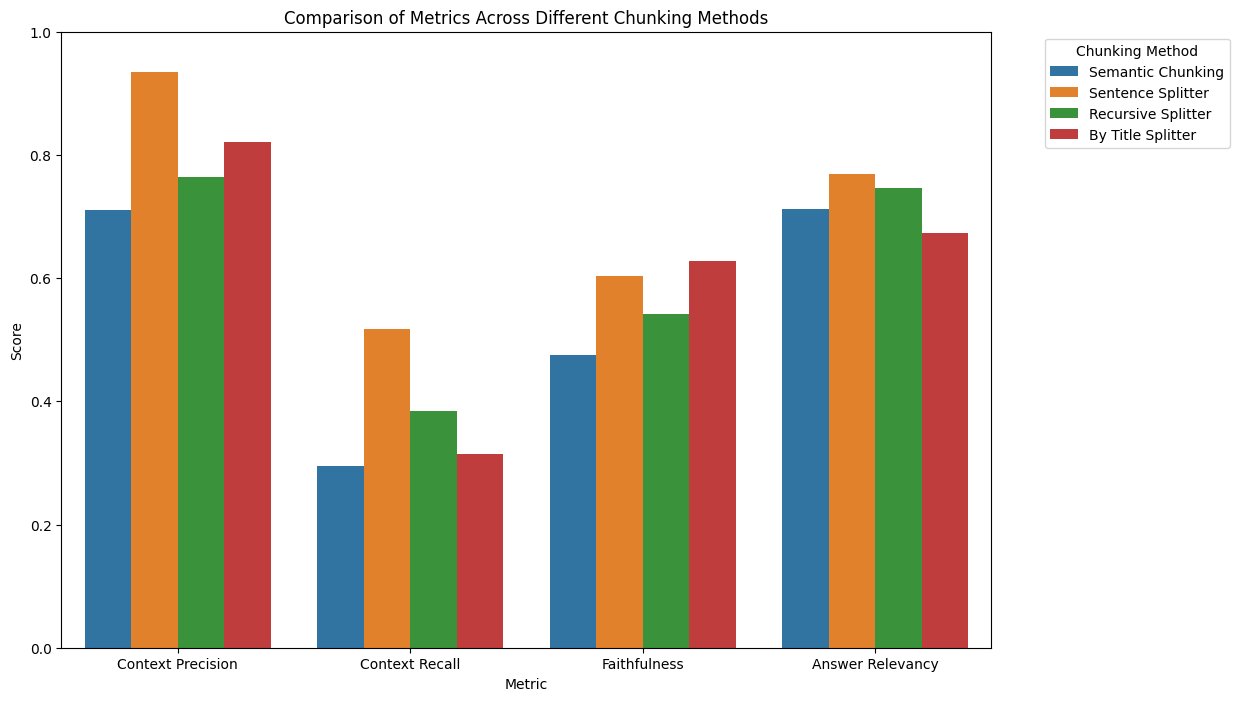

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation
data = {
    'Chunking Method': ['Semantic Chunking', 'Semantic Chunking', 'Semantic Chunking', 'Semantic Chunking',
                        'Sentence Splitter', 'Sentence Splitter', 'Sentence Splitter', 'Sentence Splitter',
                        'Recursive Splitter', 'Recursive Splitter', 'Recursive Splitter', 'Recursive Splitter',
                        'By Title Splitter', 'By Title Splitter', 'By Title Splitter', 'By Title Splitter'],
    'Metric': ['Context Precision', 'Context Recall', 'Faithfulness', 'Answer Relevancy',
               'Context Precision', 'Context Recall', 'Faithfulness', 'Answer Relevancy',
               'Context Precision', 'Context Recall', 'Faithfulness', 'Answer Relevancy',
               'Context Precision', 'Context Recall', 'Faithfulness', 'Answer Relevancy'],
    'Score': [0.710280, 0.295345, 0.475851, 0.711467,
              0.934579, 0.516736, 0.604091, 0.768225,
              0.764706, 0.383645, 0.541101, 0.746425,
              0.821705, 0.314382, 0.627556, 0.673031]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Chunking Method', data=df)
plt.title('Comparison of Metrics Across Different Chunking Methods')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1)
plt.legend(title='Chunking Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()